In [1]:
import numpy as np
import pandas as pd
from textwrap import wrap
from matplotlib import pyplot as plt
from sklearn import metrics
import matplotlib.ticker as mticker
import sys, os
from hsbmpy import plot_topic_size, get_max_available_L
from hypergeom import parameters_for_hypergeometric, build_map, plot_map

In [2]:
directory="/home/jovyan/work/phd/datasets/paper/gtex10seed"
os.chdir(directory)
sys.path.append('/home/jovyan/work/phd/')

In [3]:
L = get_max_available_L(directory)

In [79]:
df = pd.read_csv("mainTable.csv", index_col=[0])

# topic size

In [ ]:
for l in range(0,L+1):
    plot_topic_size(directory,l)

## Topic O

In [ ]:
df = pd.read_csv("mainTable.csv", index_col=0,header=0)

In [ ]:
df_mv=pd.DataFrame(data=[df.mean(1), df.var(1),df.apply(lambda x: len([x[x>0]])/float(len(x)), 1)], index=['average', 'var', 'O']).transpose()
df_mv.head()

In [ ]:
for l in range(0,L+1):
    fig = plt.figure(figsize=(15,8))
    ax = fig.subplots(1,2)
    candles = get_candles(directory,l,df_mv,ax[0])
    candlestick2_ohlc(ax[0], candles['open'],candles['high'],candles['low'],candles['close'],width=0.6,colordown='b')
    ax[1].hist((np.array(candles['open'])+np.array(candles['close']))/2, weights=candles['size'], range=(-0.05,1.05), bins=10, histtype='step')
    ax[1].set_xlabel("$O_i", fontsize=18)
    plt.show()
    fig.savefig("%s/topic_Ocandles_level_%d.pdf"%(directory,l))

# Geneontology

In [4]:
from geneontology import get_ontology_df, ensg_to_symbol
from tableanalyser import get_symbol
import gseapy as gs

In [ ]:
import importlib, geneontology,tableanalyser
importlib.reload(geneontology)
importlib.reload(tableanalyser)
from geneontology import get_ontology_df, ensg_to_symbol
from tableanalyser import get_symbol

In [40]:
l=L-0
print(f"level {l}")
algorithm = "topsbm"
df_topics = pd.read_csv(f"{directory}/{algorithm}/{algorithm}_level_{l}_topics.csv")
df_topics_smooth = pd.read_csv(f"{directory}/{algorithm}/{algorithm}_level_{l}_word-dist.csv",index_col=0)
df_topics_smooth.index = [g[:15] for g in df_topics_smooth.index]

level 3


In [15]:
def get_topic_over_thr(topic_name, q=0.75):
    topic = df_topics_smooth[topic_name]
    topic = topic[topic>0]
    topic = topic[topic>topic.quantile(q=q)]
    return topic.sort_values(ascending=False)

In [9]:
df_symbols= pd.read_csv("https://www.genenames.org/cgi-bin/download/custom?col=gd_hgnc_id&col=gd_app_sym&col=gd_pub_ensembl_id&col=md_ensembl_id&col=md_eg_id&status=Approved&status=Entry%20Withdrawn&hgnc_dbtag=on&order_by=gd_app_sym_sort&format=text&submit=submit", index_col=[0], sep='\t')

In [10]:
def get_sea():
    for g in df_topics.values.ravel()[[str(s)!='nan' for s in df_topics.values.ravel()]]:
        yield get_symbol(g)

In [11]:
with open("gback.txt",'w') as f:
    list(map(lambda x: f.writelines(x+'\n')if len(x)>1 else None, get_sea()))
    
with open("gback_ensg.txt",'w') as f:
    list(map(lambda x: f.writelines(x[:15]+'\n')if len(x)>1 else None, df_topics.values.ravel()[[str(s)!='nan' for s in df_topics.values.ravel()]]))

In [ ]:
gs.get_library_name()

In [12]:
#https://www.gsea-msigdb.org/gsea/downloads.jsp
gene_sets = ['GO_Molecular_Function_2018',
             'GO_Biological_Process_2018',
             'GO_Cellular_Component_2018',
             'Human_Phenotype_Ontology',
             'WikiPathways_2019_Human',
             '/home/jovyan/work/phd/MSigDB/c1.all.v7.1.symbols.gmt',
             '/home/jovyan/work/phd/MSigDB/c2.all.v7.1.symbols.gmt',
             '/home/jovyan/work/phd/MSigDB/c3.all.v7.1.symbols.gmt',
             '/home/jovyan/work/phd/MSigDB/c4.all.v7.1.symbols.gmt',
             '/home/jovyan/work/phd/MSigDB/c5.all.v7.1.symbols.gmt',
             '/home/jovyan/work/phd/MSigDB/c6.all.v7.1.symbols.gmt',
             '/home/jovyan/work/phd/MSigDB/c7.all.v7.1.symbols.gmt',
            ]

In [29]:
threshhold = 5e-1
cutoff = 5e-1
background = len([g for g in get_sea()])
os.system("mkdir -p gsea")
for itopic,topic in enumerate(df_topics.columns):
    try:
        enriched_topic = pd.read_csv("gsea/gsea_level_%d_topic_%d.csv"%(l,itopic+1), index_col=[0])
        print(topic)
    except:
        try:
            gene_list = ensg_to_symbol(df_topics.loc[:,topic].dropna().values)
            #gene_list = ensg_to_symbol(get_topic_over_thr(topic).index)
            print(topic)
            enriched_topic = get_ontology_df(gene_list, cutoff=cutoff, threshhold = threshhold, gene_sets = gene_sets, background=background)
            enriched_topic = enriched_topic.sort_values(by=['Adjusted P-value'], ascending=True)[:20]
            enriched_topic.to_csv("gsea/gsea_level_%d_topic_%d.csv"%(l,itopic+1))
        except:
            print(*sys.exc_info())
            continue
    print(enriched_topic)

Topic 1
                                                   Term  Adjusted P-value  \
3634                                           GNF2_HCK      5.103525e-08   
3650                                      GNF2_TNFRSF1B      5.073929e-05   
3651                                       GNF2_TNFSF10      1.084637e-04   
3645                                        GNF2_S100A4      1.783746e-04   
3623                                        GNF2_CARD15      3.275139e-04   
3624                                         GNF2_CASP1      3.275139e-04   
3635                                         GNF2_ICAM3      3.275139e-04   
3638                                          GNF2_MCL1      3.541184e-04   
3636                                         GNF2_ITGB2      3.541184e-04   
889      Resistin as a regulator of inflammation WP4481      4.124303e-04   
887                        TYROBP Causal Network WP3945      4.649072e-04   
888   Non-genomic actions of 1,25 dihydroxyvitamin D...      4.97418

2020-05-13 12:36:26,336 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:36:30,841 Warning: No enrich terms using library CUSTOM140156529695472 when cutoff = 0.5
2020-05-13 12:36:32,561 Warning: No enrich terms using library CUSTOM140156193685168 when cutoff = 0.5
2020-05-13 12:36:34,118 Warning: No enrich terms using library CUSTOM140156193684928 when cutoff = 0.5
2020-05-13 12:36:35,088 Warning: No enrich terms using library CUSTOM140156193682448 when cutoff = 0.5


                                                   Term  Adjusted P-value  \
257                     Glomerulonephritis (HP:0000099)          0.000053   
258                  Complement deficiency (HP:0004431)          0.000073   
256           Systemic lupus erythematosus (HP:0002725)          0.000080   
259       Abnormality of complement system (HP:0005339)          0.000137   
260                              Nephritis (HP:0000123)          0.000195   
291                         Complement Activation WP545          0.000197   
293      Microglia Pathogen Phagocytosis Pathway WP3937          0.000418   
292                             Oxidative Damage WP3941          0.000627   
294           Complement and Coagulation Cascades WP558          0.000972   
295                          Allograft Rejection WP2328          0.002825   
2477                                 GO_SYNAPSE_PRUNING          0.012321   
1704                                 GO_COLLAGEN_TRIMER          0.014067   

2020-05-13 12:36:39,392 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:36:41,112 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 12:36:43,532 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:36:45,373 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:36:47,059 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 12:36:47,200 Warning: No enrich terms using library CUSTOM140156671296768 when cutoff = 0.5
2020-05-13 12:36:47,518 Warning: No enrich terms using library CUSTOM140156571617712 when cutoff = 0.5
2020-05-13 12:36:47,877 Warning: No enrich terms using library CUSTOM140156671296288 when cutoff = 0.5
2020-05-13 12:36:47,960 Warning: No enrich terms using library CUSTOM140156192809360 when cutoff = 0.5
2020-05-13 12:36:48,388 Warning: No enrich terms usin

                             Term  Adjusted P-value               Gene_set
1014         ESC_J1_UP_LATE.V1_DN          0.188297  CUSTOM140156192809840
1016       ESC_V6.5_UP_LATE.V1_DN          0.188297  CUSTOM140156192809840
1008                 AKT_UP.V1_DN          0.492067  CUSTOM140156192809840
1026                 WNT_UP.V1_UP          0.492067  CUSTOM140156192809840
1024                SNF5_DN.V1_DN          0.492067  CUSTOM140156192809840
1023                  RB_DN.V1_DN          0.492067  CUSTOM140156192809840
1022                PDGF_UP.V1_UP          0.492067  CUSTOM140156192809840
1021                 MYC_UP.V1_UP          0.492067  CUSTOM140156192809840
1020                MTOR_UP.V1_DN          0.492067  CUSTOM140156192809840
1019             MTOR_UP.N4.V1_UP          0.492067  CUSTOM140156192809840
1025                 SRC_UP.V1_UP          0.492067  CUSTOM140156192809840
1017       ESC_V6.5_UP_LATE.V1_UP          0.492067  CUSTOM140156192809840
1015         ESC_J1_UP_LA

2020-05-13 12:36:54,510 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:36:56,729 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 12:36:58,695 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:37:00,420 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:37:02,144 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 12:37:02,191 Warning: No enrich terms using library CUSTOM140156131519936 when cutoff = 0.5
2020-05-13 12:37:02,473 Warning: No enrich terms using library CUSTOM140156131519696 when cutoff = 0.5
2020-05-13 12:37:02,904 Warning: No enrich terms using library CUSTOM140156131520256 when cutoff = 0.5
2020-05-13 12:37:03,002 Warning: No enrich terms using library CUSTOM140156132520736 when cutoff = 0.5
2020-05-13 12:37:03,394 Warning: No enrich terms usin

Empty DataFrame
Columns: [Term, Adjusted P-value, Gene_set]
Index: []
Topic 62


2020-05-13 12:37:08,267 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:37:10,118 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 12:37:11,966 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:37:13,737 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:37:15,956 Warning: No enrich terms using library CUSTOM140156473998224 when cutoff = 0.5
2020-05-13 12:37:17,662 Warning: No enrich terms using library CUSTOM140156473997024 when cutoff = 0.5
2020-05-13 12:37:19,203 Warning: No enrich terms using library CUSTOM140156473995584 when cutoff = 0.5
2020-05-13 12:37:19,281 Warning: No enrich terms using library CUSTOM140156473997104 when cutoff = 0.5
2020-05-13 12:37:20,840 Warning: No enrich terms using library CUSTOM140156473995744 when cutoff = 0.5


                                                   Term  Adjusted P-value  \
2192                                         GNF2_ESPL1          0.004372   
2194                                         GNF2_H2AFX          0.008947   
2182                                         GNF2_CCNB2          0.008947   
2178                                          GNF2_BUB1          0.008947   
2189                                         GNF2_CENPF          0.008947   
2187                                         GNF2_CDC20          0.008947   
2186                                          GNF2_CDC2          0.008947   
2216                                        GNF2_SMC2L1          0.008947   
2205                                          GNF2_PCNA          0.010778   
2181                                         GNF2_CCNA2          0.010778   
2219                                           GNF2_TTK          0.010778   
2214                                          GNF2_RRM2          0.010899   

2020-05-13 12:37:25,610 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:37:27,584 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 12:37:29,541 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:37:31,609 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:37:33,607 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 12:37:33,663 Warning: No enrich terms using library CUSTOM140156523477744 when cutoff = 0.5
2020-05-13 12:37:33,888 Warning: No enrich terms using library CUSTOM140156523478704 when cutoff = 0.5
2020-05-13 12:37:34,190 Warning: No enrich terms using library CUSTOM140156523475824 when cutoff = 0.5
2020-05-13 12:37:34,257 Warning: No enrich terms using library CUSTOM140156523476224 when cutoff = 0.5
2020-05-13 12:37:34,585 Warning: No enrich terms usin

Empty DataFrame
Columns: [Term, Adjusted P-value, Gene_set]
Index: []
Topic 64


2020-05-13 12:37:38,776 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:37:50,509 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:37:52,741 Warning: No enrich terms using library CUSTOM140156524012640 when cutoff = 0.5
2020-05-13 12:37:53,937 Warning: No enrich terms using library CUSTOM140156524012880 when cutoff = 0.5
2020-05-13 12:37:55,274 Warning: No enrich terms using library CUSTOM140156524012240 when cutoff = 0.5
2020-05-13 12:37:55,345 Warning: No enrich terms using library CUSTOM140156524011920 when cutoff = 0.5


                                                   Term  Adjusted P-value  \
605   Cells and Molecules involved in local acute in...          0.033483   
1877                                          MODULE_54          0.048389   
1819                                         GNF2_ESPL1          0.051760   
1809                                         GNF2_BUB1B          0.086560   
1822                                          GNF2_MCM4          0.086560   
1815                                         GNF2_CENPF          0.090059   
1812                                          GNF2_CDC2          0.090059   
970                                   KONG_E2F3_TARGETS          0.094399   
969                    KOBAYASHI_EGFR_SIGNALING_24HR_DN          0.094399   
1284                      SMIRNOV_RESPONSE_TO_IR_6HR_DN          0.094399   
1810                                         GNF2_CCNA2          0.100006   
53    leukocyte adhesion to vascular endothelial cel...          0.106515   

2020-05-13 12:38:00,806 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:38:02,730 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 12:38:04,773 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:38:06,641 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:38:08,390 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5


                                                  Term  Adjusted P-value  \
86                                         GNF2_MAP2K3          0.053332   
91                                           GNF2_TAL1          0.053332   
90                                           GNF2_SPTB          0.053332   
89                                          GNF2_SPTA1          0.053332   
88                                         GNF2_RAD23A          0.053332   
87                                           GNF2_PCAF          0.053332   
85                                          GNF2_CDC27          0.053332   
84                                         GNF2_BNIP3L          0.053332   
83                                           GNF2_ANK1          0.053332   
18               FIGUEROA_AML_METHYLATION_CLUSTER_5_UP          0.068171   
29                                  VALK_AML_CLUSTER_8          0.068171   
28                                  VALK_AML_CLUSTER_7          0.068171   
27          

2020-05-13 12:38:25,495 Warning: No enrich terms using library CUSTOM140156610685680 when cutoff = 0.5
2020-05-13 12:38:26,260 Warning: No enrich terms using library CUSTOM140156610686000 when cutoff = 0.5
2020-05-13 12:38:27,421 Warning: No enrich terms using library CUSTOM140156612383920 when cutoff = 0.5
2020-05-13 12:38:27,770 Warning: No enrich terms using library CUSTOM140156612601968 when cutoff = 0.5


                                           Term  Adjusted P-value  \
25         muscle filament sliding (GO:0030049)          0.000009   
24   actin-myosin filament sliding (GO:0033275)          0.000018   
102                      myofibril (GO:0030016)          0.000160   
121   Striated Muscle Contraction Pathway WP383          0.000488   
27      cardiac muscle contraction (GO:0060048)          0.001116   
26              muscle contraction (GO:0006936)          0.001139   
28   regulation of ATPase activity (GO:0043462)          0.001234   
29               heart contraction (GO:0060047)          0.001377   
734                  GO_MUSCLE_FILAMENT_SLIDING          0.002780   
30     striated muscle contraction (GO:0006941)          0.003191   
520                                   GNF2_MYL3          0.003617   
519                                   GNF2_MYL2          0.003617   
0       myosin heavy chain binding (GO:0032036)          0.006637   
748                          GO_MY

2020-05-13 12:38:32,290 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:38:34,488 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 12:38:36,292 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:38:38,287 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:38:40,159 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 12:38:40,308 Warning: No enrich terms using library CUSTOM140156525148272 when cutoff = 0.5
2020-05-13 12:38:40,750 Warning: No enrich terms using library CUSTOM140156521860944 when cutoff = 0.5
2020-05-13 12:38:41,313 Warning: No enrich terms using library CUSTOM140156525148192 when cutoff = 0.5
2020-05-13 12:38:41,408 Warning: No enrich terms using library CUSTOM140156521859024 when cutoff = 0.5
2020-05-13 12:38:42,335 Warning: No enrich terms usin

Empty DataFrame
Columns: [Term, Adjusted P-value, Gene_set]
Index: []
Topic 68


2020-05-13 12:38:47,545 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:38:57,285 Warning: No enrich terms using library CUSTOM140156564075936 when cutoff = 0.5
2020-05-13 12:38:57,986 Warning: No enrich terms using library CUSTOM140156564077216 when cutoff = 0.5
2020-05-13 12:38:58,665 Warning: No enrich terms using library CUSTOM140156564075616 when cutoff = 0.5
2020-05-13 12:38:58,809 Warning: No enrich terms using library CUSTOM140156564077376 when cutoff = 0.5
2020-05-13 12:39:00,294 Warning: No enrich terms using library CUSTOM140156564075456 when cutoff = 0.5
2020-05-13 12:39:00,437 Warning: No enrich terms using library CUSTOM140156564074656 when cutoff = 0.5
2020-05-13 12:39:01,801 Warning: No enrich terms using library CUSTOM140156564074576 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
565                     azurophil granule (GO:0042582)          0.000022   
124          neutrophil mediated immunity (GO:0002446)          0.000169   
123  neutrophil activation involved in immune respo...          0.000235   
122              neutrophil degranulation (GO:0043312)          0.000434   
126  regulation of mast cell activation involved in...          0.000904   
125  regulation of leukocyte degranulation (GO:0043...          0.001130   
127  regulation of myeloid leukocyte mediated immun...          0.001475   
128  regulation of mast cell degranulation (GO:0043...          0.003464   
566               azurophil granule lumen (GO:0035578)          0.011063   
129  regulation of intracellular transport (GO:0032...          0.063282   
568                     secretory vesicle (GO:0099503)          0.064917   
567                        vacuolar lumen (GO:0005775)          0.069294   
131     regu

2020-05-13 12:39:08,663 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 12:39:10,681 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:39:12,980 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:39:14,791 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 12:39:14,926 Warning: No enrich terms using library CUSTOM140156536958800 when cutoff = 0.5
2020-05-13 12:39:15,745 Warning: No enrich terms using library CUSTOM140156536958560 when cutoff = 0.5
2020-05-13 12:39:16,609 Warning: No enrich terms using library CUSTOM140156536957520 when cutoff = 0.5
2020-05-13 12:39:16,669 Warning: No enrich terms using library CUSTOM140156536957200 when cutoff = 0.5
2020-05-13 12:39:17,241 Warning: No enrich terms using library CUSTOM140156519820416 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
290                               JAEGER_METASTASIS_DN          0.013200   
281                   HUPER_BREAST_BASAL_VS_LUMINAL_UP          0.034839   
1    protein binding involved in cell-cell adhesion...          0.081405   
0    cadherin binding involved in cell-cell adhesio...          0.132707   
292             JI_CARCINOGENESIS_BY_KRAS_AND_STK11_UP          0.181294   
348                        MCBRYAN_TERMINAL_END_BUD_UP          0.181294   
472                              RICKMAN_METASTASIS_DN          0.181294   
874                                          GNF2_CDH3          0.482956   
876                                      GNF2_SERPINB5          0.482956   

                       Gene_set  
290       CUSTOM140156536958480  
281       CUSTOM140156536958480  
1    GO_Molecular_Function_2018  
0    GO_Molecular_Function_2018  
292       CUSTOM140156536958480  
348       CUSTOM140156536958480  
4

2020-05-13 12:39:21,237 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:39:23,118 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 12:39:24,907 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:39:26,638 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:39:28,559 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 12:39:28,681 Warning: No enrich terms using library CUSTOM140156612814400 when cutoff = 0.5
2020-05-13 12:39:28,915 Warning: No enrich terms using library CUSTOM140156612814000 when cutoff = 0.5
2020-05-13 12:39:29,219 Warning: No enrich terms using library CUSTOM140156612813760 when cutoff = 0.5
2020-05-13 12:39:29,301 Warning: No enrich terms using library CUSTOM140156572109792 when cutoff = 0.5
2020-05-13 12:39:29,738 Warning: No enrich terms usin

                  Term  Adjusted P-value               Gene_set
1261    BCAT_GDS748_UP          0.418875  CUSTOM140156612608800
1265  CRX_NRL_DN.V1_UP          0.418875  CUSTOM140156612608800
Topic 71


2020-05-13 12:39:34,565 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:39:36,525 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 12:39:38,380 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:39:40,123 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:39:41,951 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 12:39:42,091 Warning: No enrich terms using library CUSTOM140156134695872 when cutoff = 0.5
2020-05-13 12:39:42,550 Warning: No enrich terms using library CUSTOM140156134695632 when cutoff = 0.5
2020-05-13 12:39:42,866 Warning: No enrich terms using library CUSTOM140156134696192 when cutoff = 0.5
2020-05-13 12:39:44,052 Warning: No enrich terms using library CUSTOM140156134696352 when cutoff = 0.5
2020-05-13 12:39:44,124 Warning: No enrich terms usin

             Term  Adjusted P-value               Gene_set
1059  GNF2_ANP32B          0.344064  CUSTOM140156135259104
1109    MODULE_96          0.344064  CUSTOM140156135259104
1103   MODULE_537          0.344064  CUSTOM140156135259104
1102   MODULE_522          0.344064  CUSTOM140156135259104
1098   MODULE_403          0.344064  CUSTOM140156135259104
1097   MODULE_312          0.344064  CUSTOM140156135259104
1093   MODULE_244          0.344064  CUSTOM140156135259104
1085   MODULE_138          0.344064  CUSTOM140156135259104
1082     GNF2_TTK          0.344064  CUSTOM140156135259104
1080  GNF2_SMC2L1          0.344064  CUSTOM140156135259104
1078    GNF2_RFC4          0.344064  CUSTOM140156135259104
1077    GNF2_RFC3          0.344064  CUSTOM140156135259104
1075    GNF2_MSH2          0.344064  CUSTOM140156135259104
1074    GNF2_MCM5          0.344064  CUSTOM140156135259104
1095   MODULE_254          0.344064  CUSTOM140156135259104
1072    GNF2_HMMR          0.344064  CUSTOM1401561352591

2020-05-13 12:39:49,020 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:39:50,861 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 12:39:52,923 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:39:54,698 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:39:56,408 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 12:39:57,518 Warning: No enrich terms using library CUSTOM140156540120512 when cutoff = 0.5


            Term  Adjusted P-value               Gene_set
672   GNF2_MMP11          0.232226  CUSTOM140156500479184
665    GCM_MYCL1          0.232226  CUSTOM140156500479184
666   GCM_PRKAG1          0.232226  CUSTOM140156500479184
685   MODULE_320          0.232226  CUSTOM140156500479184
684   MODULE_315          0.232226  CUSTOM140156500479184
683   MODULE_253          0.232226  CUSTOM140156500479184
669  GNF2_IGFBP1          0.232226  CUSTOM140156500479184
675   MODULE_196          0.232226  CUSTOM140156500479184
670   GNF2_KISS1          0.232226  CUSTOM140156500479184
673   GNF2_TIMP2          0.232226  CUSTOM140156500479184
663   GCM_FCGR2B          0.232226  CUSTOM140156500479184
671    GNF2_MMP1          0.232226  CUSTOM140156500479184
687   MODULE_433          0.259140  CUSTOM140156500479184
688   MODULE_438          0.266686  CUSTOM140156500479184
678    MODULE_20          0.300050  CUSTOM140156500479184
668  GCM_SMARCD1          0.313959  CUSTOM140156500479184
667    GCM_RIN

2020-05-13 12:40:04,309 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:40:06,148 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 12:40:08,214 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:40:10,091 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:40:11,953 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5


                                                  Term  Adjusted P-value  \
109                         MODY_HIPPOCAMPUS_POSTNATAL          0.101670   
111                                         MOOTHA_PGC          0.134819   
247                                          GNF2_MYL2          0.162058   
248                                          GNF2_MYL3          0.162058   
249                                           GNF2_TTN          0.162058   
252                                         MODULE_115          0.162058   
256                                         MODULE_149          0.162058   
257                                         MODULE_150          0.162058   
268                                         MODULE_489          0.162058   
244                                          GCM_BNIP1          0.181075   
246                                          GCM_PTPRU          0.181075   
258                                         MODULE_159          0.181075   
262         

2020-05-13 12:40:23,938 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:40:26,020 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:40:29,939 Warning: No enrich terms using library CUSTOM140156667821024 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
15   positive regulation of lipid transport (GO:003...          0.008032   
18   regulation of cholesterol metabolic process (G...          0.078052   
19   negative regulation of neuron projection devel...          0.096960   
0                    amyloid-beta binding (GO:0001540)          0.100884   
17   negative regulation of cell projection organiz...          0.104069   
20   negative regulation of neuron differentiation ...          0.127538   
16   regulation of cholesterol biosynthetic process...          0.148509   
429             GALINDO_IMMUNE_RESPONSE_TO_ENTEROTOXIN          0.160813   
531                LI_WILMS_TUMOR_VS_FETAL_KIDNEY_1_UP          0.182327   
720                     STEARMAN_TUMOR_FIELD_EFFECT_UP          0.182327   
646        REACTOME_NR1H2_AND_NR1H3_MEDIATED_SIGNALING          0.182327   
683              RUTELLA_RESPONSE_TO_CSF2RB_AND_IL4_UP          0.182327   
445         

2020-05-13 12:40:37,243 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:40:39,026 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 12:40:40,796 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:40:42,808 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:40:44,670 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 12:40:45,918 Warning: No enrich terms using library CUSTOM140156506879152 when cutoff = 0.5


                                               Term  Adjusted P-value  \
475                                      MODULE_164          0.249400   
703                                  MEL18_DN.V1_DN          0.329502   
708                                 SIRNA_EIF4GI_UP          0.329502   
707                                RB_P130_DN.V1_DN          0.329502   
706                                    P53_DN.V1_UP          0.329502   
705                                    P53_DN.V1_DN          0.329502   
704                                    NRL_DN.V1_DN          0.329502   
702                                   LEF1_UP.V1_DN          0.329502   
701                          ESC_V6.5_UP_LATE.V1_UP          0.329502   
700                         ESC_V6.5_UP_EARLY.V1_DN          0.329502   
699                            ESC_J1_UP_LATE.V1_UP          0.329502   
698                              CSR_EARLY_UP.V1_UP          0.329502   
697                                CRX_NRL_DN.V1_DN

2020-05-13 12:40:52,610 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:40:54,500 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 12:40:59,503 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:41:01,523 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5


                                                  Term  Adjusted P-value  \
250                                      CTIP_DN.V1_DN          0.087438   
172                                         MODULE_331          0.098864   
301  GSE6259_FLT3L_INDUCED_VS_WT_SPLENIC_DC_33D1_PO...          0.129034   
268  GSE15930_STIM_VS_STIM_AND_TRICHOSTATINA_72H_CD...          0.129034   
269  GSE16385_UNTREATED_VS_12H_ROSIGLITAZONE_IFNG_T...          0.129034   
271  GSE1740_MCSF_VS_MCSF_AND_IFNG_DAY2_DERIVED_MAC...          0.129034   
272                   GSE17721_LPS_VS_CPG_0.5H_BMDC_DN          0.129034   
273  GSE1925_CTRL_VS_3H_IFNG_STIM_IFNG_PRIMED_MACRO...          0.129034   
274  GSE19888_CTRL_VS_T_CELL_MEMBRANES_ACT_MAST_CEL...          0.129034   
276                     GSE20715_WT_VS_TLR4_KO_LUNG_DN          0.129034   
267  GSE15930_STIM_VS_STIM_AND_TRICHOSTATINA_24H_CD...          0.129034   
277    GSE2124_CTRL_VS_LYMPHOTOXIN_BETA_TREATED_MLN_UP          0.129034   
278  GSE2154

2020-05-13 12:41:09,468 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:41:11,475 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 12:41:13,411 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:41:15,271 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:41:17,402 Warning: No enrich terms using library CUSTOM140156633126384 when cutoff = 0.5
2020-05-13 12:41:17,871 Warning: No enrich terms using library CUSTOM140156633126144 when cutoff = 0.5
2020-05-13 12:41:18,368 Warning: No enrich terms using library CUSTOM140156633126704 when cutoff = 0.5
2020-05-13 12:41:18,480 Warning: No enrich terms using library CUSTOM140156635075760 when cutoff = 0.5
2020-05-13 12:41:19,424 Warning: No enrich terms using library CUSTOM140156633126864 when cutoff = 0.5
2020-05-13 12:41:19,488 Warning: No enrich terms using 

                                       Term  Adjusted P-value  \
293  Cholesterol Biosynthesis Pathway WP197          0.022433   

                    Gene_set  
293  WikiPathways_2019_Human  
Topic 78


2020-05-13 12:41:24,061 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:41:25,854 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 12:41:27,626 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:41:29,480 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:41:31,315 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 12:41:32,340 Warning: No enrich terms using library CUSTOM140156401552192 when cutoff = 0.5
2020-05-13 12:41:32,421 Warning: No enrich terms using library CUSTOM140156552891520 when cutoff = 0.5
2020-05-13 12:41:32,734 Warning: No enrich terms using library CUSTOM140156401551312 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
91             REACTOME_SHC1_EVENTS_IN_ERBB4_SIGNALING          0.294510   
89             REACTOME_PI3K_EVENTS_IN_ERBB4_SIGNALING          0.294510   
64                            PID_ERBB_NETWORK_PATHWAY          0.294510   
75             REACTOME_ERBB2_ACTIVATES_PTK6_SIGNALING          0.294510   
76              REACTOME_ERBB2_REGULATES_CELL_MOTILITY          0.294510   
79             REACTOME_GRB2_EVENTS_IN_ERBB2_SIGNALING          0.294510   
88             REACTOME_PI3K_EVENTS_IN_ERBB2_SIGNALING          0.294510   
90             REACTOME_SHC1_EVENTS_IN_ERBB2_SIGNALING          0.352213   
93               REACTOME_SIGNALING_BY_ERBB2_IN_CANCER          0.368526   
74          REACTOME_DOWNREGULATION_OF_ERBB2_SIGNALING          0.368836   
86                 REACTOME_NUCLEAR_SIGNALING_BY_ERBB4          0.368886   
411                 GSE31082_DN_VS_CD8_SP_THYMOCYTE_DN          0.383657   
412         

2020-05-13 12:41:37,859 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:41:42,094 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:41:46,501 Warning: No enrich terms using library CUSTOM140156558914416 when cutoff = 0.5
2020-05-13 12:41:46,738 Warning: No enrich terms using library CUSTOM140156558917136 when cutoff = 0.5
2020-05-13 12:41:47,028 Warning: No enrich terms using library CUSTOM140156558914096 when cutoff = 0.5
2020-05-13 12:41:47,116 Warning: No enrich terms using library CUSTOM140156558917376 when cutoff = 0.5
2020-05-13 12:41:48,041 Warning: No enrich terms using library CUSTOM140156558914576 when cutoff = 0.5
2020-05-13 12:41:48,376 Warning: No enrich terms using library CUSTOM140156154540352 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
96       Thyroxine (Thyroid Hormone) Production WP1981          0.001945   
76                                 Goiter (HP:0000853)          0.002498   
77   Aplasia/Hypoplasia of the abdominal wall muscu...          0.002843   
79                 Coarse facial features (HP:0000280)          0.018523   
78                         Hypothyroidism (HP:0000821)          0.019899   
810               GO_THYROID_HORMONE_METABOLIC_PROCESS          0.020981   
80                       Umbilical hernia (HP:0001537)          0.023691   
81                           Constipation (HP:0002019)          0.028074   
13              thyroid gland development (GO:0030878)          0.062998   
14           endocrine system development (GO:0035270)          0.226406   
809                      GO_THYROID_HORMONE_GENERATION          0.331833   
808                       GO_THYROID_GLAND_DEVELOPMENT          0.331833   
660  GO_NEGA

2020-05-13 12:42:01,941 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:42:04,234 Warning: No enrich terms using library CUSTOM140156141674976 when cutoff = 0.5
2020-05-13 12:42:04,975 Warning: No enrich terms using library CUSTOM140156141676256 when cutoff = 0.5
2020-05-13 12:42:05,837 Warning: No enrich terms using library CUSTOM140156141676656 when cutoff = 0.5
2020-05-13 12:42:05,971 Warning: No enrich terms using library CUSTOM140156141674576 when cutoff = 0.5
2020-05-13 12:42:07,334 Warning: No enrich terms using library CUSTOM140156141678016 when cutoff = 0.5
2020-05-13 12:42:07,497 Warning: No enrich terms using library CUSTOM140156141677536 when cutoff = 0.5
2020-05-13 12:42:08,466 Warning: No enrich terms using library CUSTOM140156141677056 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
573  integral component of plasma membrane (GO:0005...          0.068239   
79   positive regulation of protein phosphorylation...          0.119515   
85               neuron apoptotic process (GO:0051402)          0.175364   
86                           axonogenesis (GO:0007409)          0.183113   
84   transmembrane receptor protein tyrosine kinase...          0.202523   
745  Regulation of Apoptosis by Parathyroid Hormone...          0.217392   
82                      gland development (GO:0048732)          0.220105   
83   positive regulation of phosphorylation (GO:004...          0.224666   
90       regulation of cell proliferation (GO:0042127)          0.244939   
91   regulation of pri-miRNA transcription from RNA...          0.253451   
87          urogenital system development (GO:0001655)          0.261147   
88   regulation of protein phosphorylation (GO:0001...          0.265684   
81   regulat

2020-05-13 12:42:19,245 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:42:21,591 Warning: No enrich terms using library CUSTOM140156561176128 when cutoff = 0.5
2020-05-13 12:42:21,928 Warning: No enrich terms using library CUSTOM140156561178448 when cutoff = 0.5
2020-05-13 12:42:22,193 Warning: No enrich terms using library CUSTOM140156561177888 when cutoff = 0.5


                                                   Term  Adjusted P-value  \
0     platelet-derived growth factor receptor bindin...          0.006723   
627                                          MODULE_412          0.167872   
626                                          MODULE_275          0.167872   
629                                          MODULE_522          0.174665   
623                                          MODULE_131          0.174665   
1           growth factor receptor binding (GO:0070851)          0.178524   
283                           Osteoclast Signaling WP12          0.282666   
282                          Osteoblast Signaling WP322          0.282736   
281                   PI3K-Akt Signaling Pathway WP4172          0.324991   
37    positive regulation of epithelial cell migrati...          0.341290   
280                        Osteopontin Signaling WP1434          0.367603   
628                                          MODULE_456          0.420672   

2020-05-13 12:42:29,655 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:42:31,560 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 12:42:33,571 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:42:35,373 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:42:37,196 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 12:42:37,269 Warning: No enrich terms using library CUSTOM140156560280624 when cutoff = 0.5
2020-05-13 12:42:37,716 Warning: No enrich terms using library CUSTOM140156560279904 when cutoff = 0.5
2020-05-13 12:42:38,185 Warning: No enrich terms using library CUSTOM140156298379584 when cutoff = 0.5
2020-05-13 12:42:38,301 Warning: No enrich terms using library CUSTOM140156590495296 when cutoff = 0.5
2020-05-13 12:42:38,852 Warning: No enrich terms usin

Empty DataFrame
Columns: [Term, Adjusted P-value, Gene_set]
Index: []
Topic 83


2020-05-13 12:42:43,923 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:42:45,653 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 12:42:47,526 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:42:49,453 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:42:51,249 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 12:42:52,782 Warning: No enrich terms using library CUSTOM140156591010192 when cutoff = 0.5
2020-05-13 12:42:52,974 Warning: No enrich terms using library CUSTOM140156591012272 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
19                                             chr3q11          0.195341   
174                     GSE18148_CBFB_KO_VS_WT_TREG_DN          0.241491   
177  GSE19888_ADENOSINE_A3R_INH_VS_INH_PRETREAT_AND...          0.241491   
178  GSE19941_IL10_KO_VS_IL10_KO_AND_NFKBP50_KO_UNS...          0.241491   
179    GSE2124_CTRL_VS_LYMPHOTOXIN_BETA_TREATED_MLN_DN          0.241491   
180   GSE21380_TFH_VS_GERMINAL_CENTER_TFH_CD4_TCELL_UP          0.241491   
181  GSE22443_NAIVE_VS_ACT_AND_IL12_TREATED_CD8_TCE...          0.241491   
182             GSE22589_HEALTHY_VS_SIV_INFECTED_DC_DN          0.241491   
183  GSE22601_IMMATURE_CD4_SINGLE_POSITIVE_VS_DOUBL...          0.241491   
184  GSE23321_CD8_STEM_CELL_MEMORY_VS_CENTRAL_MEMOR...          0.241491   
185                          GSE24210_TCONV_VS_TREG_DN          0.241491   
186                    GSE2706_2H_VS_8H_LPS_STIM_DC_UP          0.241491   
187         

2020-05-13 12:42:57,690 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:43:00,006 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 12:43:02,021 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:43:03,783 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:43:05,550 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 12:43:06,852 Warning: No enrich terms using library CUSTOM140156671423584 when cutoff = 0.5
2020-05-13 12:43:06,944 Warning: No enrich terms using library CUSTOM140156141413712 when cutoff = 0.5
2020-05-13 12:43:07,245 Warning: No enrich terms using library CUSTOM140156671424064 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
123  REACTOME_SYNTHESIS_OF_EPOXY_EET_AND_DIHYDROXYE...          0.362847   
63               BYSTRYKH_HEMATOPOIESIS_STEM_CELL_FGF3          0.362847   
111                  REACTOME_BIOSYNTHESIS_OF_MARESINS          0.362847   
112         REACTOME_BIOSYNTHESIS_OF_MARESIN_LIKE_SPMS          0.362847   
122  REACTOME_SYNTHESIS_OF_16_20_HYDROXYEICOSATETRA...          0.362847   
114                          REACTOME_CYP2E1_REACTIONS          0.368827   
597       GSE29618_LAIV_VS_TIV_FLU_VACCINE_DAY7_PDC_UP          0.383657   
598                  GSE29949_MICROGLIA_VS_DC_BRAIN_UP          0.383657   
599        GSE3039_ALPHAALPHA_CD8_TCELL_VS_B1_BCELL_DN          0.383657   
600                    GSE3039_NKT_CELL_VS_B1_BCELL_UP          0.383657   
601           GSE32533_WT_VS_MIR17_KO_ACT_CD4_TCELL_UP          0.383657   
602     GSE32986_UNSTIM_VS_CURDLAN_HIGHDOSE_STIM_DC_DN          0.383657   
603         

2020-05-13 12:43:12,150 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:43:14,040 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 12:43:16,005 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:43:18,242 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:43:20,165 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 12:43:20,654 Warning: No enrich terms using library CUSTOM140156621959488 when cutoff = 0.5
2020-05-13 12:43:20,858 Warning: No enrich terms using library CUSTOM140156622288768 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
220                                         MODULE_154          0.249936   
221                                         MODULE_297          0.249936   
223                                         MODULE_357          0.249936   
419  GSE22611_NOD2_TRANSD_VS_CTRL_TRANSD_HEK293_MDP...          0.339491   
445  GSE29617_CTRL_VS_DAY3_TIV_FLU_VACCINE_PBMC_200...          0.339491   
446      GSE29617_CTRL_VS_TIV_FLU_VACCINE_PBMC_2008_UP          0.339491   
447  GSE29617_DAY3_VS_DAY7_TIV_FLU_VACCINE_PBMC_200...          0.339491   
448        GSE3039_CD4_TCELL_VS_ALPHABETA_CD8_TCELL_DN          0.339491   
449                   GSE3039_CD4_TCELL_VS_B2_BCELL_DN          0.339491   
450              GSE32034_LY6C_HIGH_VS_LOW_MONOCYTE_DN          0.339491   
451        GSE33162_HDAC3_KO_VS_HDAC3_KO_MACROPHAGE_UP          0.339491   
452  GSE33292_DN3_THYMOCYTE_VS_TCF1_KO_TCELL_LYMPHO...          0.339491   
453  GSE3337

2020-05-13 12:43:26,513 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:43:28,553 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 12:43:30,311 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:43:32,190 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:43:34,111 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 12:43:35,264 Warning: No enrich terms using library CUSTOM140156030517152 when cutoff = 0.5
2020-05-13 12:43:35,351 Warning: No enrich terms using library CUSTOM140156629309792 when cutoff = 0.5
2020-05-13 12:43:35,667 Warning: No enrich terms using library CUSTOM140156627976352 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
623                  GSE22886_NAIVE_VS_MEMORY_TCELL_UP          0.339491   
652  GSE29164_UNTREATED_VS_CD8_TCELL_TREATED_MELANO...          0.339491   
653   GSE29949_MICROGLIA_BRAIN_VS_CD8_POS_DC_SPLEEN_UP          0.339491   
654                   GSE30083_SP2_VS_SP3_THYMOCYTE_UP          0.339491   
655              GSE32034_LY6C_HIGH_VS_LOW_MONOCYTE_DN          0.339491   
656              GSE32034_LY6C_HIGH_VS_LOW_MONOCYTE_UP          0.339491   
657  GSE32034_UNTREATED_VS_ROSIGLIZATONE_TREATED_LY...          0.339491   
658        GSE32423_IL7_VS_IL7_IL4_MEMORY_CD8_TCELL_UP          0.339491   
659              GSE32901_TH1_VS_TH17_NEG_CD4_TCELL_UP          0.339491   
660  GSE32986_GMCSF_AND_CURDLAN_LOWDOSE_VS_GMCSF_AN...          0.339491   
661  GSE32986_GMCSF_VS_GMCSF_AND_CURDLAN_LOWDOSE_ST...          0.339491   
662     GSE32986_UNSTIM_VS_CURDLAN_HIGHDOSE_STIM_DC_UP          0.339491   
663  GSE3298

2020-05-13 12:43:40,835 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:43:42,765 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 12:43:44,655 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:43:48,646 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 12:43:48,706 Warning: No enrich terms using library CUSTOM140156629088848 when cutoff = 0.5
2020-05-13 12:43:49,038 Warning: No enrich terms using library CUSTOM140156629088928 when cutoff = 0.5
2020-05-13 12:43:49,484 Warning: No enrich terms using library CUSTOM140156629088448 when cutoff = 0.5
2020-05-13 12:43:50,969 Warning: No enrich terms using library CUSTOM140156629088208 when cutoff = 0.5
2020-05-13 12:43:51,033 Warning: No enrich terms using library CUSTOM140156518556288 when cutoff = 0.5


                                                   Term  Adjusted P-value  \
148      Abnormality of the vitreous humor (HP:0004327)          0.196956   
150                            Retinopathy (HP:0000488)          0.325521   
149                     Retinal detachment (HP:0000541)          0.360540   
984                                          MODULE_248          0.441659   
2090  GSE35685_CD34POS_CD38NEG_VS_CD34POS_CD10POS_BO...          0.499286   
2091  GSE35685_CD34POS_CD38NEG_VS_CD34POS_CD10POS_BO...          0.499286   
2092           GSE35825_IFNA_VS_IFNG_STIM_MACROPHAGE_UP          0.499286   
2093      GSE35825_UNTREATED_VS_IFNA_STIM_MACROPHAGE_DN          0.499286   
2094                    GSE36095_WT_VS_HDAC9_KO_TREG_DN          0.499286   
2095            GSE360_CTRL_VS_B_MALAYI_LOW_DOSE_MAC_UP          0.499286   
2096                GSE360_CTRL_VS_M_TUBERCULOSIS_DC_UP          0.499286   
2097               GSE360_CTRL_VS_M_TUBERCULOSIS_MAC_DN          0.499286   

2020-05-13 12:44:02,995 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:44:04,798 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:44:06,622 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5


                                                  Term  Adjusted P-value  \
24   regulation of synaptic vesicle transport (GO:1...          0.002984   
23   regulation of synaptic vesicle cycle (GO:0098693)          0.004209   
25       positive regulation of signaling (GO:0023056)          0.016056   
481                                          GNF2_ANK1          0.149217   
482                                        GNF2_BNIP3L          0.149217   
483                                        GNF2_MAP2K3          0.149217   
484                                        GNF2_RAD23A          0.149217   
485                                         GNF2_SPTA1          0.149217   
486                                          GNF2_SPTB          0.149217   
487                                          GNF2_TAL1          0.149217   
490                                         MODULE_137          0.149217   
493                                         MODULE_234          0.149217   
488         

2020-05-13 12:44:19,655 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:44:21,533 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:44:23,378 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 12:44:24,717 Warning: No enrich terms using library CUSTOM140156574264688 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
2              potassium channel activity (GO:0005267)          0.094032   
1    voltage-gated cation channel activity (GO:0022...          0.141048   
0    voltage-gated potassium channel activity (GO:0...          0.203756   
776                                       ATM_DN.V1_DN          0.287097   
777                                       ATM_DN.V1_UP          0.287097   
778                                     ERBB2_UP.V1_UP          0.287097   
779                                      IL21_UP.V1_UP          0.287097   
780                                      LEF1_UP.V1_UP          0.287097   
781                                   MTOR_UP.N4.V1_UP          0.287097   
782                                       P53_DN.V1_DN          0.287097   
783                                      PDGF_UP.V1_UP          0.287097   
784                                      PIGF_UP.V1_DN          0.287097   
786         

2020-05-13 12:44:31,462 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:44:33,436 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 12:44:35,360 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:44:37,300 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:44:39,204 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 12:44:39,362 Warning: No enrich terms using library CUSTOM140156629010704 when cutoff = 0.5
2020-05-13 12:44:40,160 Warning: No enrich terms using library CUSTOM140156572334032 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
349  GO_REGULATION_OF_HIGH_DENSITY_LIPOPROTEIN_PART...          0.232865   
329                             GO_PHOSPHOLIPID_EFFLUX          0.232865   
309  GO_NEGATIVE_REGULATION_OF_LIPOPROTEIN_LIPASE_A...          0.232865   
391  GO_TRIGLYCERIDE_RICH_LIPOPROTEIN_PARTICLE_REMO...          0.232865   
395  GO_VERY_LOW_DENSITY_LIPOPROTEIN_PARTICLE_ASSEMBLY          0.232865   
240               GO_CDC42_PROTEIN_SIGNAL_TRANSDUCTION          0.232865   
396  GO_VERY_LOW_DENSITY_LIPOPROTEIN_PARTICLE_CLEAR...          0.232865   
247                                     GO_CHYLOMICRON          0.232865   
248                            GO_CHYLOMICRON_ASSEMBLY          0.232865   
343  GO_REGULATION_OF_CDC42_PROTEIN_SIGNAL_TRANSDUC...          0.232865   
390  GO_TRIGLYCERIDE_RICH_LIPOPROTEIN_PARTICLE_CLEA...          0.232865   
318  GO_NEGATIVE_REGULATION_OF_TRIGLYCERIDE_CATABOL...          0.232865   
249         

2020-05-13 12:44:46,879 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:44:53,968 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:44:55,795 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 12:44:55,950 Warning: No enrich terms using library CUSTOM140156155996272 when cutoff = 0.5
2020-05-13 12:44:57,503 Warning: No enrich terms using library CUSTOM140156155982704 when cutoff = 0.5
2020-05-13 12:44:58,843 Warning: No enrich terms using library CUSTOM140156639216496 when cutoff = 0.5


                                                   Term  Adjusted P-value  \
675               FLORIO_NEOCORTEX_BASAL_RADIAL_GLIA_DN      3.186704e-07   
1064        ROSTY_CERVICAL_CANCER_PROLIFERATION_CLUSTER      1.336166e-06   
658                 DUTERTRE_ESTRADIOL_RESPONSE_24HR_UP      7.206741e-06   
713       GRAHAM_NORMAL_QUIESCENT_VS_NORMAL_DIVIDING_DN      5.293816e-05   
626                       CROONQUIST_IL6_DEPRIVATION_DN      7.066210e-05   
627                        CROONQUIST_NRAS_SIGNALING_DN      1.077441e-04   
1963                                          MODULE_54      2.345067e-04   
1876                                         GNF2_CCNB2      2.345067e-04   
1878                                         GNF2_CDC20      2.345067e-04   
1880                                         GNF2_CENPF      2.898542e-04   
1900                                           GNF2_TTK      3.651937e-04   
1879                                         GNF2_CENPE      3.916904e-04   

2020-05-13 12:45:05,105 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:45:07,053 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 12:45:08,941 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:45:10,829 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:45:13,790 Warning: No enrich terms using library CUSTOM140156145595328 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
89                             Sleep regulation WP3591          0.024767   
112                                            chr8p11          0.086695   
337                                          MODULE_61          0.247120   
336                                         MODULE_557          0.247120   
334                                         MODULE_470          0.247120   
333                                         MODULE_367          0.247120   
332                                         MODULE_330          0.247120   
331                                         MODULE_288          0.247120   
330                                         MODULE_287          0.247120   
327                                         MODULE_201          0.247120   
324                                         MODULE_134          0.247120   
322                                         MODULE_120          0.309290   
329         

2020-05-13 12:45:20,416 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:45:22,237 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 12:45:23,939 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:45:25,854 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:45:27,751 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 12:45:27,797 Warning: No enrich terms using library CUSTOM140156549559472 when cutoff = 0.5
2020-05-13 12:45:28,019 Warning: No enrich terms using library CUSTOM140156549560352 when cutoff = 0.5
2020-05-13 12:45:28,339 Warning: No enrich terms using library CUSTOM140156549561632 when cutoff = 0.5
2020-05-13 12:45:28,399 Warning: No enrich terms using library CUSTOM140156576018096 when cutoff = 0.5
2020-05-13 12:45:28,760 Warning: No enrich terms usin

Empty DataFrame
Columns: [Term, Adjusted P-value, Gene_set]
Index: []
Topic 95


2020-05-13 12:45:33,283 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:45:35,158 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 12:45:37,005 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:45:38,824 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:45:40,577 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 12:45:41,166 Warning: No enrich terms using library CUSTOM140156591012592 when cutoff = 0.5
2020-05-13 12:45:41,303 Warning: No enrich terms using library CUSTOM140156591010112 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
74                                          MODULE_341          0.132585   
75                                          MODULE_411          0.132585   
110  GO_NATURAL_KILLER_CELL_MEDIATED_IMMUNE_RESPONS...          0.274963   
137   GO_POSITIVE_REGULATION_OF_RESPONSE_TO_TUMOR_CELL          0.274963   
139  GO_POSITIVE_REGULATION_OF_T_CELL_RECEPTOR_SIGN...          0.274963   
120  GO_POSITIVE_REGULATION_OF_FC_RECEPTOR_MEDIATED...          0.274963   
149  GO_REGULATION_OF_FC_RECEPTOR_MEDIATED_STIMULAT...          0.274963   
109         GO_NATURAL_KILLER_CELL_CYTOKINE_PRODUCTION          0.274963   
132  GO_POSITIVE_REGULATION_OF_NATURAL_KILLER_CELL_...          0.274963   
163            GO_REGULATION_OF_RESPONSE_TO_TUMOR_CELL          0.274963   
128     GO_POSITIVE_REGULATION_OF_MAST_CELL_ACTIVATION          0.288141   
96                    GO_IMMUNE_RESPONSE_TO_TUMOR_CELL          0.288141   
131  GO_POSI

2020-05-13 12:45:47,128 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:45:49,043 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 12:45:50,843 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:45:52,744 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:45:54,606 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5


Empty DataFrame
Columns: [Term, Adjusted P-value, Gene_set]
Index: []
Topic 97


2020-05-13 12:45:59,503 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:46:01,636 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 12:46:05,609 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:46:07,470 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 12:46:07,539 Warning: No enrich terms using library CUSTOM140156536235904 when cutoff = 0.5
2020-05-13 12:46:07,900 Warning: No enrich terms using library CUSTOM140156536234224 when cutoff = 0.5
2020-05-13 12:46:08,366 Warning: No enrich terms using library CUSTOM140156536235504 when cutoff = 0.5
2020-05-13 12:46:08,448 Warning: No enrich terms using library CUSTOM140156536234864 when cutoff = 0.5
2020-05-13 12:46:09,015 Warning: No enrich terms using library CUSTOM140156536237984 when cutoff = 0.5
2020-05-13 12:46:09,102 Warning: No enrich terms using lib

                                         Term  Adjusted P-value  \
169                      caveola (GO:0005901)          0.176131   
168  cortical actin cytoskeleton (GO:0030864)          0.303836   

                       Gene_set  
169  GO_Cellular_Component_2018  
168  GO_Cellular_Component_2018  
Topic 98


2020-05-13 12:46:13,812 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:46:20,332 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:46:22,319 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 12:46:22,464 Warning: No enrich terms using library CUSTOM140156549898800 when cutoff = 0.5
2020-05-13 12:46:22,904 Warning: No enrich terms using library CUSTOM140156541261056 when cutoff = 0.5
2020-05-13 12:46:23,386 Warning: No enrich terms using library CUSTOM140156549900800 when cutoff = 0.5
2020-05-13 12:46:23,506 Warning: No enrich terms using library CUSTOM140156515298352 when cutoff = 0.5
2020-05-13 12:46:24,160 Warning: No enrich terms using library CUSTOM140156549900080 when cutoff = 0.5
2020-05-13 12:46:24,256 Warning: No enrich terms using library CUSTOM140156515298032 when cutoff = 0.5
2020-05-13 12:46:25,080 Warning: No enrich terms using library 

                                                 Term  Adjusted P-value  \
261               platelet dense granule (GO:0042827)          0.018567   
260              secretory granule lumen (GO:0034774)          0.021620   
259         platelet dense granule lumen (GO:0031089)          0.024216   
43   positive regulation of angiogenesis (GO:0045766)          0.361028   

                       Gene_set  
261  GO_Cellular_Component_2018  
260  GO_Cellular_Component_2018  
259  GO_Cellular_Component_2018  
43   GO_Biological_Process_2018  
Topic 99


2020-05-13 12:46:29,688 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:46:31,807 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 12:46:33,624 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:46:35,565 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:46:38,000 Warning: No enrich terms using library CUSTOM140156611433008 when cutoff = 0.5
2020-05-13 12:46:38,758 Warning: No enrich terms using library CUSTOM140156611434048 when cutoff = 0.5
2020-05-13 12:46:39,321 Warning: No enrich terms using library CUSTOM140156611433248 when cutoff = 0.5
2020-05-13 12:46:39,435 Warning: No enrich terms using library CUSTOM140156611432688 when cutoff = 0.5
2020-05-13 12:46:40,035 Warning: No enrich terms using library CUSTOM140156613211472 when cutoff = 0.5
2020-05-13 12:46:40,113 Warning: No enrich terms using 

                                Term  Adjusted P-value  \
440  Gastric Cancer Network 2 WP2363          0.006946   

                    Gene_set  
440  WikiPathways_2019_Human  
Topic 100


2020-05-13 12:46:45,479 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:46:47,177 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 12:46:48,885 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:46:50,577 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:46:52,285 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 12:46:52,325 Warning: No enrich terms using library CUSTOM140156603282448 when cutoff = 0.5
2020-05-13 12:46:53,218 Warning: No enrich terms using library CUSTOM140156603285168 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
388                              GO_COENZYME_TRANSPORT          0.328439   
387     GO_COENZYME_TRANSMEMBRANE_TRANSPORTER_ACTIVITY          0.328439   
392  GO_DEHYDROASCORBIC_ACID_TRANSMEMBRANE_TRANSPOR...          0.328439   
393                  GO_DEHYDROASCORBIC_ACID_TRANSPORT          0.328439   
415   GO_NUCLEOBASE_TRANSMEMBRANE_TRANSPORTER_ACTIVITY          0.328439   
416                            GO_NUCLEOBASE_TRANSPORT          0.328439   
406             GO_MEIOTIC_CELL_CYCLE_PHASE_TRANSITION          0.328439   
434  GO_POSITIVE_REGULATION_OF_MEIOTIC_CELL_CYCLE_P...          0.328439   
403               GO_L_ASCORBIC_ACID_METABOLIC_PROCESS          0.356109   
352                                         MODULE_124          0.356923   
355                                          MODULE_57          0.356923   
354                                         MODULE_197          0.356923   
353         

2020-05-13 12:47:00,235 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:47:02,246 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 12:47:03,921 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:47:05,621 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:47:07,343 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 12:47:08,518 Warning: No enrich terms using library CUSTOM140156702083024 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
297                                         MODULE_106          0.164839   
299                                         MODULE_135          0.164839   
305                                         MODULE_327          0.164839   
453        GSE13887_RESTING_VS_NO_TREATED_CD4_TCELL_UP          0.241491   
487           GSE20715_0H_VS_24H_OZONE_TLR4_KO_LUNG_DN          0.241491   
488                     GSE20715_WT_VS_TLR4_KO_LUNG_UP          0.241491   
489               GSE21379_TFH_VS_NON_TFH_CD4_TCELL_DN          0.241491   
490  GSE21546_UNSTIM_VS_ANTI_CD3_STIM_SAP1A_KO_AND_...          0.241491   
491        GSE21927_BALBC_VS_C57BL6_MONOCYTE_SPLEEN_DN          0.241491   
492          GSE21927_EL4_VS_MCA203_TUMOR_MONOCYTES_UP          0.241491   
493  GSE22025_PROGESTERONE_VS_TGFB1_AND_PROGESTERON...          0.241491   
494  GSE22611_NOD2_TRANSD_VS_CTRL_TRANSD_HEK293_MDP...          0.241491   
495  GSE2405

2020-05-13 12:47:24,193 Warning: No enrich terms using library CUSTOM140156616487392 when cutoff = 0.5
2020-05-13 12:47:25,029 Warning: No enrich terms using library CUSTOM140156616409808 when cutoff = 0.5
2020-05-13 12:47:26,201 Warning: No enrich terms using library CUSTOM140156599078576 when cutoff = 0.5
2020-05-13 12:47:26,702 Warning: No enrich terms using library CUSTOM140156311183184 when cutoff = 0.5


                                               Term  Adjusted P-value  \
154       Striated Muscle Contraction Pathway WP383          0.000004   
18             muscle filament sliding (GO:0030049)          0.000020   
20                  myofibril assembly (GO:0030239)          0.000024   
250            REACTOME_STRIATED_MUSCLE_CONTRACTION          0.000025   
19                  muscle contraction (GO:0006936)          0.000029   
17       actin-myosin filament sliding (GO:0033275)          0.000040   
21         striated muscle contraction (GO:0006941)          0.000056   
95       striated muscle thin filament (GO:0005865)          0.000092   
252                  RICKMAN_HEAD_AND_NECK_CANCER_F          0.000112   
580                                        GNF2_TTN          0.000154   
22          cardiac muscle contraction (GO:0060048)          0.001287   
23                   heart contraction (GO:0060047)          0.002039   
24         striated muscle hypertrophy (GO:0014897)

2020-05-13 12:47:39,648 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 12:47:39,791 Warning: No enrich terms using library CUSTOM140156638086560 when cutoff = 0.5
2020-05-13 12:47:40,120 Warning: No enrich terms using library CUSTOM140156638086320 when cutoff = 0.5
2020-05-13 12:47:40,573 Warning: No enrich terms using library CUSTOM140156638086880 when cutoff = 0.5
2020-05-13 12:47:42,312 Warning: No enrich terms using library CUSTOM140156637961424 when cutoff = 0.5
2020-05-13 12:47:42,802 Warning: No enrich terms using library CUSTOM140156640535088 when cutoff = 0.5


                                                   Term  Adjusted P-value  \
0     ATP-dependent microtubule motor activity, plus...          0.002144   
240           polymeric cytoskeletal fiber (GO:0099513)          0.003537   
238                        kinesin complex (GO:0005871)          0.003589   
1     ATP-dependent microtubule motor activity (GO:1...          0.004090   
239                            microtubule (GO:0005874)          0.004342   
2               microtubule motor activity (GO:0003777)          0.005363   
37    cytoskeleton-dependent intracellular transport...          0.005511   
38    vesicle-mediated transport in synapse (GO:0099...          0.007530   
3                           motor activity (GO:0003774)          0.011470   
241               microtubule cytoskeleton (GO:0015630)          0.023525   
39    establishment of synaptic vesicle localization...          0.055898   
40           synaptic vesicle localization (GO:0097479)          0.059399   

2020-05-13 12:47:47,035 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:47:48,999 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 12:47:50,904 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:47:52,798 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:47:54,519 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 12:47:54,574 Warning: No enrich terms using library CUSTOM140156134233744 when cutoff = 0.5
2020-05-13 12:47:54,935 Warning: No enrich terms using library CUSTOM140156134233504 when cutoff = 0.5
2020-05-13 12:47:55,369 Warning: No enrich terms using library CUSTOM140156134234064 when cutoff = 0.5
2020-05-13 12:47:55,448 Warning: No enrich terms using library CUSTOM140156403794960 when cutoff = 0.5
2020-05-13 12:47:56,133 Warning: No enrich terms usin

Empty DataFrame
Columns: [Term, Adjusted P-value, Gene_set]
Index: []
Topic 105


2020-05-13 12:48:01,104 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:48:03,221 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 12:48:05,048 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:48:07,027 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:48:08,956 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 12:48:09,102 Warning: No enrich terms using library CUSTOM140156023483120 when cutoff = 0.5
2020-05-13 12:48:09,580 Warning: No enrich terms using library CUSTOM140156023483280 when cutoff = 0.5
2020-05-13 12:48:10,150 Warning: No enrich terms using library CUSTOM140156023482320 when cutoff = 0.5
2020-05-13 12:48:10,310 Warning: No enrich terms using library CUSTOM140156023482960 when cutoff = 0.5
2020-05-13 12:48:11,127 Warning: No enrich terms usin

Empty DataFrame
Columns: [Term, Adjusted P-value, Gene_set]
Index: []
Topic 106


2020-05-13 12:48:15,987 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:48:18,017 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 12:48:19,816 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:48:21,793 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:48:25,012 Warning: No enrich terms using library CUSTOM140156530743968 when cutoff = 0.5
2020-05-13 12:48:25,460 Warning: No enrich terms using library CUSTOM140156530744848 when cutoff = 0.5
2020-05-13 12:48:25,528 Warning: No enrich terms using library CUSTOM140156530744048 when cutoff = 0.5
2020-05-13 12:48:25,985 Warning: No enrich terms using library CUSTOM140156530742688 when cutoff = 0.5


                                                   Term  Adjusted P-value  \
167   Sterol Regulatory Element-Binding Proteins (SR...          0.114978   
1321                                       WNT_UP.V1_DN          0.414928   
1320                                    VEGF_A_UP.V1_DN          0.414928   
1319                                      SNF5_DN.V1_UP          0.414928   
1318                                       RAF_UP.V1_UP          0.414928   
1317                                       P53_DN.V1_UP          0.414928   
1316                                       MEK_UP.V1_UP          0.414928   
1315                                 CSR_EARLY_UP.V1_DN          0.414928   
1313                             CAHOY_OLIGODENDROCUTIC          0.414928   
1312                                   CAHOY_ASTROGLIAL          0.414928   
1314                                   CRX_NRL_DN.V1_UP          0.414928   
1311                                   CAHOY_ASTROCYTIC          0.414928   

2020-05-13 12:48:31,756 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:48:33,703 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 12:48:35,594 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:48:39,793 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 12:48:39,863 Warning: No enrich terms using library CUSTOM140156604577664 when cutoff = 0.5
2020-05-13 12:48:40,180 Warning: No enrich terms using library CUSTOM140156640921712 when cutoff = 0.5
2020-05-13 12:48:40,794 Warning: No enrich terms using library CUSTOM140156595524624 when cutoff = 0.5
2020-05-13 12:48:40,895 Warning: No enrich terms using library CUSTOM140156324908320 when cutoff = 0.5
2020-05-13 12:48:41,351 Warning: No enrich terms using library CUSTOM140156324906880 when cutoff = 0.5
2020-05-13 12:48:41,406 Warning: No enrich terms using l

                             Term  Adjusted P-value                  Gene_set
95  Blepharophimosis (HP:0000581)            0.1567  Human_Phenotype_Ontology
Topic 108


2020-05-13 12:48:49,932 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 12:48:54,192 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:48:57,059 Warning: No enrich terms using library CUSTOM140156150262672 when cutoff = 0.5
2020-05-13 12:48:57,796 Warning: No enrich terms using library CUSTOM140156150262432 when cutoff = 0.5
2020-05-13 12:48:59,120 Warning: No enrich terms using library CUSTOM140156150262992 when cutoff = 0.5
2020-05-13 12:48:59,553 Warning: No enrich terms using library CUSTOM140156150262512 when cutoff = 0.5
2020-05-13 12:49:01,341 Warning: No enrich terms using library CUSTOM140156150263152 when cutoff = 0.5
2020-05-13 12:49:01,435 Warning: No enrich terms using library CUSTOM140156150263392 when cutoff = 0.5
2020-05-13 12:49:03,235 Warning: No enrich terms using library CUSTOM140156150263472 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
1    phosphatidylinositol phosphate 4-phosphatase a...          0.140190   
676                  G Protein Signaling Pathways WP35          0.141879   
548          juxtaparanode region of axon (GO:0044224)          0.185418   
0    phosphatidylinositol phosphate phosphatase act...          0.200719   
2    phosphatidylinositol phosphate 5-phosphatase a...          0.342522   

                       Gene_set  
1    GO_Molecular_Function_2018  
676     WikiPathways_2019_Human  
548  GO_Cellular_Component_2018  
0    GO_Molecular_Function_2018  
2    GO_Molecular_Function_2018  
Topic 109


2020-05-13 12:49:07,036 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:49:08,963 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 12:49:10,818 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:49:15,634 Warning: No enrich terms using library CUSTOM140156151080352 when cutoff = 0.5
2020-05-13 12:49:16,297 Warning: No enrich terms using library CUSTOM140156151081152 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
108     REACTOME_PHENYLALANINE_AND_TYROSINE_METABOLISM          0.272714   
110                       REACTOME_TYROSINE_CATABOLISM          0.272714   
91                              KEGG_SULFUR_METABOLISM          0.272714   
82                      DOANE_BREAST_CANCER_CLASSES_UP          0.272714   
120         VECCHI_GASTRIC_CANCER_ADVANCED_VS_EARLY_DN          0.272714   
68                BOYAULT_LIVER_CANCER_SUBCLASS_G12_DN          0.272714   
189                                         MODULE_495          0.289538   
187                                         MODULE_373          0.289538   
344         GSE22886_NAIVE_CD4_TCELL_VS_12H_ACT_TH2_UP          0.292177   
346                     GSE22886_TH1_VS_TH2_12H_ACT_UP          0.292177   
347  GSE23114_PERITONEAL_CAVITY_B1A_BCELL_VS_SPLEEN...          0.292177   
348  GSE23308_CTRL_VS_CORTICOSTERONE_TREATED_MACROP...          0.292177   
342  GSE2261

2020-05-13 12:49:27,985 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:49:29,903 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:49:31,799 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 12:49:31,850 Warning: No enrich terms using library CUSTOM140156607287456 when cutoff = 0.5
2020-05-13 12:49:33,107 Warning: No enrich terms using library CUSTOM140156607288016 when cutoff = 0.5
2020-05-13 12:49:34,369 Warning: No enrich terms using library CUSTOM140156607663792 when cutoff = 0.5
2020-05-13 12:49:35,144 Warning: No enrich terms using library CUSTOM140156606704208 when cutoff = 0.5


                                                   Term  Adjusted P-value  \
25    UDP-N-acetylglucosamine metabolic process (GO:...          0.058685   
0     oxidoreductase activity, acting on the CH-NH2 ...          0.063093   
24        amino sugar biosynthetic process (GO:0046349)          0.088027   
26    nucleotide-sugar biosynthetic process (GO:0009...          0.113691   
23    UDP-N-acetylglucosamine biosynthetic process (...          0.146775   
27            leukocyte cell-cell adhesion (GO:0007159)          0.186047   
1397                                          GNF2_PTX3          0.249282   
1396                                          GNF2_MMP1          0.249282   
1395                                         GNF2_CDH11          0.249282   
2058       GO_UDP_N_ACETYLGLUCOSAMINE_METABOLIC_PROCESS          0.332029   
1463                GO_AMINO_SUGAR_BIOSYNTHETIC_PROCESS          0.332029   
1803  GO_OXIDOREDUCTASE_ACTIVITY_ACTING_ON_THE_CH_NH...          0.332029   

2020-05-13 12:49:39,384 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:49:41,433 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 12:49:43,225 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
289                                         MODULE_333          0.143793   
288                                         MODULE_256          0.149616   
290                                         MODULE_567          0.156698   
287                                         MODULE_111          0.181892   
405                                       RAF_UP.V1_DN          0.182827   
404                                      PTEN_DN.V1_UP          0.182827   
403                                       NRL_DN.V1_UP          0.182827   
402                            GCNP_SHH_UP_EARLY.V1_UP          0.182827   
401                                      EGFR_UP.V1_DN          0.182827   
461          GSE23925_LIGHT_ZONE_VS_DARK_ZONE_BCELL_DN          0.187196   
462  GSE2405_HEAT_KILLED_LYSATE_VS_LIVE_A_PHAGOCYTO...          0.187196   
463  GSE24142_EARLY_THYMIC_PROGENITOR_VS_DN2_THYMOC...          0.187196   
546         

2020-05-13 12:49:55,554 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:49:57,448 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 12:49:59,284 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:50:01,281 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:50:03,571 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 12:50:04,137 Warning: No enrich terms using library CUSTOM140156661868256 when cutoff = 0.5
2020-05-13 12:50:04,404 Warning: No enrich terms using library CUSTOM140156661868816 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
235                                         GNF2_ZAP70          0.152933   
236                                         MODULE_169          0.204445   
237                                         MODULE_456          0.204445   
27                                            chr19p12          0.212689   
28                                             chr2q35          0.212689   
29                                             chr8q13          0.212689   
338                            GSE3982_DC_VS_NKCELL_DN          0.339491   
337              GSE3982_DC_VS_EFF_MEMORY_CD4_TCELL_DN          0.339491   
336       GSE3982_BASOPHIL_VS_CENT_MEMORY_CD4_TCELL_DN          0.339491   
335   GSE3920_IFNB_VS_IFNG_TREATED_ENDOTHELIAL_CELL_UP          0.339491   
334  GSE39110_UNTREATED_VS_IL2_TREATED_CD8_TCELL_DA...          0.339491   
333  GSE37532_TREG_VS_TCONV_PPARG_KO_CD4_TCELL_FROM...          0.339491   
332  GSE3730

2020-05-13 12:50:10,117 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:50:11,871 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 12:50:13,609 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:50:15,479 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:50:17,378 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 12:50:19,213 Warning: No enrich terms using library CUSTOM140156171582432 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
295                                      TGFB_UP.V1_DN          0.281989   
288                                      E2F3_UP.V1_DN          0.281989   
289                                      PKCA_DN.V1_DN          0.281989   
290                                  PRC1_BMI_UP.V1_DN          0.281989   
291                                 PRC2_EZH2_UP.V1_UP          0.281989   
292                                PRC2_SUZ12_UP.V1_DN          0.281989   
293                                PRC2_SUZ12_UP.V1_UP          0.281989   
294                                      PTEN_DN.V2_UP          0.281989   
382       GSE3039_ALPHAALPHA_VS_ALPHABETA_CD8_TCELL_UP          0.292177   
381       GSE3039_ALPHAALPHA_VS_ALPHABETA_CD8_TCELL_DN          0.292177   
380       GSE29618_LAIV_VS_TIV_FLU_VACCINE_DAY7_PDC_UP          0.292177   
341  GSE21546_SAP1A_KO_VS_SAP1A_KO_AND_ELK1_KO_DP_T...          0.292177   
378  GSE2770

2020-05-13 12:50:25,685 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:50:27,637 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 12:50:29,557 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:50:31,587 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:50:33,464 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 12:50:33,570 Warning: No enrich terms using library CUSTOM140155776497616 when cutoff = 0.5
2020-05-13 12:50:33,908 Warning: No enrich terms using library CUSTOM140155776497456 when cutoff = 0.5
2020-05-13 12:50:34,194 Warning: No enrich terms using library CUSTOM140155776499136 when cutoff = 0.5
2020-05-13 12:50:34,287 Warning: No enrich terms using library CUSTOM140156150785200 when cutoff = 0.5
2020-05-13 12:50:35,012 Warning: No enrich terms usin

Empty DataFrame
Columns: [Term, Adjusted P-value, Gene_set]
Index: []
Topic 115


2020-05-13 12:50:40,900 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:50:42,752 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 12:50:44,598 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:50:46,624 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:50:48,516 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 12:50:48,561 Warning: No enrich terms using library CUSTOM140156171568944 when cutoff = 0.5
2020-05-13 12:50:48,683 Warning: No enrich terms using library CUSTOM140156171570784 when cutoff = 0.5
2020-05-13 12:50:48,908 Warning: No enrich terms using library CUSTOM140156171570144 when cutoff = 0.5
2020-05-13 12:50:49,129 Warning: No enrich terms using library CUSTOM140156171569584 when cutoff = 0.5
2020-05-13 12:50:49,756 Warning: No enrich terms usin

                       Term  Adjusted P-value               Gene_set
179  CAHOY_OLIGODENDROCUTIC          0.332253  CUSTOM140156171569824
Topic 116


2020-05-13 12:50:54,602 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:51:04,822 Warning: No enrich terms using library CUSTOM140156515896848 when cutoff = 0.5
2020-05-13 12:51:06,390 Warning: No enrich terms using library CUSTOM140156515894528 when cutoff = 0.5
2020-05-13 12:51:08,429 Warning: No enrich terms using library CUSTOM140156531757216 when cutoff = 0.5
2020-05-13 12:51:09,177 Warning: No enrich terms using library CUSTOM140156325012016 when cutoff = 0.5


                                                   Term  Adjusted P-value  \
32       extracellular matrix organization (GO:0030198)      9.043202e-08   
2094                                          GNF2_PTX3      4.763785e-06   
274                       Pectus carinatum (HP:0000768)      1.375385e-05   
33            collagen fibril organization (GO:0030199)      3.471328e-05   
1105  TURASHVILI_BREAST_LOBULAR_CARCINOMA_VS_DUCTAL_...      5.531103e-05   
1106  TURASHVILI_BREAST_LOBULAR_CARCINOMA_VS_LOBULAR...      5.531103e-05   
34    protein complex subunit organization (GO:0071822)      1.437916e-04   
975                         REACTOME_COLLAGEN_FORMATION      1.445645e-04   
970   REACTOME_ASSEMBLY_OF_COLLAGEN_FIBRILS_AND_OTHE...      2.025293e-04   
524      ANASTASSIOU_MULTICANCER_INVASIVENESS_SIGNATURE      2.163106e-04   
2477            GO_EXTRACELLULAR_STRUCTURE_ORGANIZATION      2.533659e-04   
2372                    GO_COLLAGEN_FIBRIL_ORGANIZATION      3.182761e-04   

2020-05-13 12:51:13,400 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:51:15,407 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 12:51:17,293 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:51:19,249 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:51:21,144 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 12:51:21,200 Warning: No enrich terms using library CUSTOM140156170738096 when cutoff = 0.5
2020-05-13 12:51:21,489 Warning: No enrich terms using library CUSTOM140156170737536 when cutoff = 0.5
2020-05-13 12:51:21,835 Warning: No enrich terms using library CUSTOM140156170738416 when cutoff = 0.5
2020-05-13 12:51:22,530 Warning: No enrich terms using library CUSTOM140156170739616 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
335                                         GNF2_CCNA1          0.316394   
336                                          GNF2_MLF1          0.316394   
337                                         MODULE_372          0.316394   
338                                         MODULE_489          0.316394   
339                                         MORF_EPHA7          0.316394   
340                                           MORF_FRK          0.316394   
341                                           MORF_IL9          0.316394   
342                                          MORF_LCAT          0.316394   
343                                          MORF_WNT1          0.316394   
525                                     RPS14_DN.V1_DN          0.397998   
524                                  PRC1_BMI_UP.V1_UP          0.397998   
522                                      PDGF_UP.V1_UP          0.397998   
521         

2020-05-13 12:51:27,648 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:51:36,952 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 12:51:37,045 Warning: No enrich terms using library CUSTOM140156619713024 when cutoff = 0.5
2020-05-13 12:51:37,705 Warning: No enrich terms using library CUSTOM140156619700656 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
450                                          GNF2_MYL3      8.055322e-08   
13                     muscle contraction (GO:0006936)      1.485150e-06   
449                                          GNF2_MYL2      8.436501e-06   
466                                         MODULE_512      1.028813e-05   
455                                         MODULE_201      1.924455e-05   
458                                         MODULE_329      1.924455e-05   
461                                         MODULE_387      1.924455e-05   
460                                         MODULE_330      1.639407e-04   
633                              GO_MYOFIBRIL_ASSEMBLY      1.286833e-03   
601                                          GO_I_BAND      1.286833e-03   
563                               GO_CONTRACTILE_FIBER      4.567918e-03   
535  GO_CELLULAR_COMPONENT_ASSEMBLY_INVOLVED_IN_MOR...      4.567918e-03   
631         

2020-05-13 12:51:43,759 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:51:45,693 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 12:51:47,422 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:51:49,165 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:51:50,869 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 12:51:51,344 Warning: No enrich terms using library CUSTOM140156140913840 when cutoff = 0.5
2020-05-13 12:51:51,539 Warning: No enrich terms using library CUSTOM140156140915920 when cutoff = 0.5
2020-05-13 12:51:52,474 Warning: No enrich terms using library CUSTOM140156140913920 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
235                                           GCM_DPF2          0.289778   
238                                          GCM_MYCL1          0.289778   
239                                         GCM_PRKAG1          0.289778   
240                                          GCM_PTPRU          0.289778   
243                                        GCM_SUPT4H1          0.289778   
234                                          GCM_BNIP1          0.291087   
236                                          GCM_FANCC          0.291087   
237                                          GCM_HMGA2          0.291087   
241                                          GCM_RING1          0.291087   
242                                        GCM_SMARCD1          0.291087   
58                                             chr4p11          0.347640   
472  GSE28783_CTRL_ANTI_MIR_VS_UNTREATED_ATHEROSCLE...          0.424884   
473      GSE

2020-05-13 12:51:57,713 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:51:59,531 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 12:52:01,328 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:52:03,308 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:52:05,248 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 12:52:05,297 Warning: No enrich terms using library CUSTOM140156610203888 when cutoff = 0.5
2020-05-13 12:52:05,633 Warning: No enrich terms using library CUSTOM140156610207248 when cutoff = 0.5
2020-05-13 12:52:06,041 Warning: No enrich terms using library CUSTOM140156610205248 when cutoff = 0.5
2020-05-13 12:52:06,247 Warning: No enrich terms using library CUSTOM140156439315792 when cutoff = 0.5
2020-05-13 12:52:06,764 Warning: No enrich terms usin

Empty DataFrame
Columns: [Term, Adjusted P-value, Gene_set]
Index: []
Topic 121


2020-05-13 12:52:13,167 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 12:52:15,017 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:52:16,830 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:52:18,705 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 12:52:18,765 Warning: No enrich terms using library CUSTOM140156521857104 when cutoff = 0.5
2020-05-13 12:52:20,427 Warning: No enrich terms using library CUSTOM140156521857504 when cutoff = 0.5
2020-05-13 12:52:21,197 Warning: No enrich terms using library CUSTOM140156521860304 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
1          endodeoxyribonuclease activity (GO:0004520)          0.025569   
0              deoxyribonuclease activity (GO:0004536)          0.037411   
2                   endonuclease activity (GO:0004519)          0.074909   
107                      KEGG_HOMOLOGOUS_RECOMBINATION          0.233224   
146           REACTOME_RESOLUTION_OF_D_LOOP_STRUCTURES          0.233224   
364                                          GNF2_CDC2          0.265696   
365                                         GNF2_CENPF          0.265696   
366                                          GNF2_PCNA          0.265696   
369                                         MORF_MYST2          0.265696   
370                                         MORF_ORC1L          0.265696   
371                                         MORF_PDPK1          0.265696   
368                                         MORF_CNTN1          0.319291   
92          

2020-05-13 12:52:28,696 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 12:52:32,724 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:52:34,474 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 12:52:34,530 Warning: No enrich terms using library CUSTOM140156612073184 when cutoff = 0.5
2020-05-13 12:52:34,881 Warning: No enrich terms using library CUSTOM140156612072304 when cutoff = 0.5
2020-05-13 12:52:35,355 Warning: No enrich terms using library CUSTOM140156612074064 when cutoff = 0.5
2020-05-13 12:52:35,452 Warning: No enrich terms using library CUSTOM140156633267168 when cutoff = 0.5
2020-05-13 12:52:36,041 Warning: No enrich terms using library CUSTOM140156612073424 when cutoff = 0.5
2020-05-13 12:52:36,126 Warning: No enrich terms using library CUSTOM140156633265648 when cutoff = 0.5
2020-05-13 12:52:36,622 Warning: No enrich terms using library 

                                Term  Adjusted P-value  \
153           myofibril (GO:0030016)          0.052565   
0         titin binding (GO:0031432)          0.070798   
152   contractile fiber (GO:0043292)          0.097392   
154  actin cytoskeleton (GO:0015629)          0.272816   

                       Gene_set  
153  GO_Cellular_Component_2018  
0    GO_Molecular_Function_2018  
152  GO_Cellular_Component_2018  
154  GO_Cellular_Component_2018  
Topic 123


2020-05-13 12:52:41,317 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:52:43,299 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 12:52:45,254 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:52:47,086 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:52:48,901 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 12:52:49,059 Warning: No enrich terms using library CUSTOM140156160788352 when cutoff = 0.5
2020-05-13 12:52:49,468 Warning: No enrich terms using library CUSTOM140156160788112 when cutoff = 0.5
2020-05-13 12:52:49,943 Warning: No enrich terms using library CUSTOM140156160788672 when cutoff = 0.5
2020-05-13 12:52:50,062 Warning: No enrich terms using library CUSTOM140156160812928 when cutoff = 0.5
2020-05-13 12:52:50,668 Warning: No enrich terms usin

Empty DataFrame
Columns: [Term, Adjusted P-value, Gene_set]
Index: []
Topic 124


2020-05-13 12:52:55,809 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:52:57,748 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 12:52:59,606 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:53:01,435 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:53:03,498 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 12:53:04,616 Warning: No enrich terms using library CUSTOM140156192835776 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
118              REACTOME_PROLACTIN_RECEPTOR_SIGNALING          0.152576   
115        REACTOME_PHASE_4_RESTING_MEMBRANE_POTENTIAL          0.152576   
120     REACTOME_TANDEM_PORE_DOMAIN_POTASSIUM_CHANNELS          0.152576   
69                                BIOCARTA_AKT_PATHWAY          0.152576   
70                            BIOCARTA_GHRELIN_PATHWAY          0.152576   
72                          BIOCARTA_LONGEVITY_PATHWAY          0.152576   
73                                BIOCARTA_TFF_PATHWAY          0.152576   
126                       WONG_ENDOMETRIAL_CANCER_LATE          0.152576   
105         REACTOME_GROWTH_HORMONE_RECEPTOR_SIGNALING          0.152576   
119  REACTOME_SYNTHESIS_SECRETION_AND_DEACYLATION_O...          0.152576   
71                                 BIOCARTA_GH_PATHWAY          0.155887   
349                                      PIGF_UP.V1_DN          0.183702   
348         

2020-05-13 12:53:10,883 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:53:12,829 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 12:53:14,805 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:53:16,636 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:53:18,637 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 12:53:20,070 Warning: No enrich terms using library CUSTOM140156636399008 when cutoff = 0.5


                                                   Term  Adjusted P-value  \
638                                          MODULE_222          0.130715   
636                                          MODULE_203          0.130715   
624                                          MODULE_127          0.130715   
644                                          MODULE_421          0.130715   
648                                          MODULE_534          0.130715   
650                                          MODULE_552          0.130715   
654                                           MODULE_89          0.130715   
655                                           MODULE_90          0.130715   
620                                         GNF2_SPRR1B          0.130715   
633                                          MODULE_189          0.130715   
630                                          MODULE_168          0.130715   
1036  GSE2770_TGFB_AND_IL4_VS_TGFB_AND_IL12_TREATED_...          0.241491   

2020-05-13 12:53:26,414 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:53:28,299 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 12:53:30,209 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:53:32,025 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:53:33,875 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 12:53:34,002 Warning: No enrich terms using library CUSTOM140156562409344 when cutoff = 0.5
2020-05-13 12:53:34,542 Warning: No enrich terms using library CUSTOM140156562409664 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
256                                          GNF2_CD33          0.173133   
257                                           GNF2_FOS          0.173133   
162                      REACTOME_METALLOPROTEASE_DUBS          0.326560   
483                              ESC_J1_UP_EARLY.V1_UP          0.348873   
567  GSE36476_CTRL_VS_TSST_ACT_40H_MEMORY_CD4_TCELL...          0.383657   
551  GSE27859_MACROPHAGE_VS_CD11C_INT_F480_HI_MACRO...          0.383657   
552    GSE27859_MACROPHAGE_VS_CD11C_INT_F480_INT_DC_DN          0.383657   
553                       GSE27859_MACROPHAGE_VS_DC_UP          0.383657   
554     GSE29618_BCELL_VS_MONOCYTE_DAY7_FLU_VACCINE_DN          0.383657   
555                      GSE29618_BCELL_VS_MONOCYTE_DN          0.383657   
556                        GSE29618_MONOCYTE_VS_MDC_UP          0.383657   
557       GSE29618_MONOCYTE_VS_PDC_DAY7_FLU_VACCINE_UP          0.383657   
568  GSE3647

2020-05-13 12:53:40,511 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:53:44,861 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:53:46,771 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:53:48,628 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 12:53:48,775 Warning: No enrich terms using library CUSTOM140156167453504 when cutoff = 0.5
2020-05-13 12:53:49,186 Warning: No enrich terms using library CUSTOM140156167453184 when cutoff = 0.5
2020-05-13 12:53:49,742 Warning: No enrich terms using library CUSTOM140156213836928 when cutoff = 0.5
2020-05-13 12:53:49,840 Warning: No enrich terms using library CUSTOM140156515811488 when cutoff = 0.5
2020-05-13 12:53:50,458 Warning: No enrich terms using library CUSTOM140156213834608 when cutoff = 0.5
2020-05-13 12:53:50,546 Warning: No enrich terms using lib

                                                 Term  Adjusted P-value  \
39  cellular response to nerve growth factor stimu...          0.396806   

                      Gene_set  
39  GO_Biological_Process_2018  
Topic 128


2020-05-13 12:53:55,671 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:54:00,455 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:54:02,526 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:54:04,671 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 12:54:04,732 Warning: No enrich terms using library CUSTOM140156150418640 when cutoff = 0.5
2020-05-13 12:54:05,238 Warning: No enrich terms using library CUSTOM140156150418400 when cutoff = 0.5
2020-05-13 12:54:05,865 Warning: No enrich terms using library CUSTOM140156150418960 when cutoff = 0.5
2020-05-13 12:54:07,467 Warning: No enrich terms using library CUSTOM140156150419120 when cutoff = 0.5
2020-05-13 12:54:07,542 Warning: No enrich terms using library CUSTOM140156150419360 when cutoff = 0.5
2020-05-13 12:54:08,438 Warning: No enrich terms using lib

                                                   Term  Adjusted P-value  \
48    positive regulation of smooth muscle contracti...          0.197175   
47    positive regulation of muscle contraction (GO:...          0.338206   
49    regulation of smooth muscle contraction (GO:00...          0.363605   
50             skeletal system development (GO:0001501)          0.432371   
1484                                      GNF2_SERPINI2          0.450047   
1485                                        GNF2_SPINK1          0.450047   
1517                                         MODULE_334          0.451212   

                        Gene_set  
48    GO_Biological_Process_2018  
47    GO_Biological_Process_2018  
49    GO_Biological_Process_2018  
50    GO_Biological_Process_2018  
1484       CUSTOM140156150418480  
1485       CUSTOM140156150418480  
1517       CUSTOM140156150418480  
Topic 129


2020-05-13 12:54:12,577 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:54:14,765 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 12:54:16,772 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:54:18,622 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:54:20,845 Warning: No enrich terms using library CUSTOM140156642583568 when cutoff = 0.5
2020-05-13 12:54:21,011 Warning: No enrich terms using library CUSTOM140156642584368 when cutoff = 0.5
2020-05-13 12:54:21,206 Warning: No enrich terms using library CUSTOM140156642582688 when cutoff = 0.5
2020-05-13 12:54:21,764 Warning: No enrich terms using library CUSTOM140156642583968 when cutoff = 0.5
2020-05-13 12:54:21,827 Warning: No enrich terms using library CUSTOM140156642583648 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
42   Regulation of toll-like receptor signaling pat...          0.333374   
176                                           GNF2_HCK          0.346125   
177                                         MODULE_171          0.346125   
178                                         MODULE_208          0.346125   
179                                         MODULE_292          0.346125   
180                                         MODULE_345          0.346125   
181                                         MODULE_436          0.346125   
350         GSE3039_NKT_CELL_VS_ALPHABETA_CD8_TCELL_UP          0.463367   
351                    GSE3039_NKT_CELL_VS_B2_BCELL_DN          0.463367   
352  GSE30971_CTRL_VS_LPS_STIM_MACROPHAGE_WBP7_HET_...          0.463367   
353  GSE30971_CTRL_VS_LPS_STIM_MACROPHAGE_WBP7_KO_4...          0.463367   
354  GSE30971_WBP7_HET_VS_KO_MACROPHAGE_4H_LPS_STIM_UP          0.463367   
355  GSE3298

2020-05-13 12:54:33,463 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:54:35,596 Warning: No enrich terms using library CUSTOM140156643856624 when cutoff = 0.5
2020-05-13 12:54:36,913 Warning: No enrich terms using library CUSTOM140156643856944 when cutoff = 0.5
2020-05-13 12:54:38,858 Warning: No enrich terms using library CUSTOM140156643856464 when cutoff = 0.5
2020-05-13 12:54:39,599 Warning: No enrich terms using library CUSTOM140156644404112 when cutoff = 0.5


                                                   Term  Adjusted P-value  \
0                         collagen binding (GO:0005518)      6.782067e-07   
50    antigen receptor-mediated signaling pathway (G...      3.126138e-03   
2323                                           MODULE_5      3.602767e-03   
2233                                           MODULE_1      3.640218e-03   
49                phagocytosis, engulfment (GO:0006911)      3.976688e-03   
48    positive regulation of lymphocyte activation (...      7.953376e-03   
404                    MHC protein complex (GO:0042611)      2.301624e-02   
1          immunoglobulin receptor binding (GO:0034987)      2.403893e-02   
403           MHC class II protein complex (GO:0042613)      2.743349e-02   
2498                                GO_COLLAGEN_BINDING      2.816684e-02   
543                      Human Complement System WP2806      3.378527e-02   
406   clathrin-coated endocytic vesicle membrane (GO...      3.941802e-02   

2020-05-13 12:54:43,756 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:54:45,667 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 12:54:47,512 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:54:49,598 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:54:51,511 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 12:54:51,664 Warning: No enrich terms using library CUSTOM140156372411808 when cutoff = 0.5
2020-05-13 12:54:52,059 Warning: No enrich terms using library CUSTOM140156372411568 when cutoff = 0.5
2020-05-13 12:54:52,310 Warning: No enrich terms using library CUSTOM140156372412128 when cutoff = 0.5
2020-05-13 12:54:52,555 Warning: No enrich terms using library CUSTOM140156665111888 when cutoff = 0.5
2020-05-13 12:54:52,947 Warning: No enrich terms usin

Empty DataFrame
Columns: [Term, Adjusted P-value, Gene_set]
Index: []
Topic 132


2020-05-13 12:54:57,280 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:55:06,429 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 12:55:07,896 Warning: No enrich terms using library CUSTOM140156713387344 when cutoff = 0.5
2020-05-13 12:55:10,151 Warning: No enrich terms using library CUSTOM140156214113936 when cutoff = 0.5


                                                Term  Adjusted P-value  \
12                epidermis development (GO:0008544)      1.450283e-16   
650                                      GNF2_SPRR1B      1.275461e-13   
13                peptide cross-linking (GO:0018149)      1.973462e-11   
808                                 GO_CORNIFICATION      7.249959e-10   
679                                       MODULE_298      1.702373e-09   
705                                        MODULE_68      1.702373e-09   
367     REACTOME_FORMATION_OF_THE_CORNIFIED_ENVELOPE      4.825112e-09   
67                     keratin filament (GO:0045095)      1.388707e-07   
66                intermediate filament (GO:0005882)      1.921633e-07   
809                            GO_CORNIFIED_ENVELOPE      3.148349e-07   
815                         GO_EPIDERMIS_DEVELOPMENT      3.540800e-07   
845                                GO_KERATINIZATION      3.540800e-07   
847                  GO_KERATINOCYTE_D

2020-05-13 12:55:13,950 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:55:15,805 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 12:55:22,065 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 12:55:22,202 Warning: No enrich terms using library CUSTOM140156215513248 when cutoff = 0.5
2020-05-13 12:55:23,125 Warning: No enrich terms using library CUSTOM140156215516288 when cutoff = 0.5
2020-05-13 12:55:23,267 Warning: No enrich terms using library CUSTOM140156215515168 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
553                             GO_HAPTOGLOBIN_BINDING          0.000091   
554                  GO_HAPTOGLOBIN_HEMOGLOBIN_COMPLEX          0.000091   
557                              GO_HEMOGLOBIN_COMPLEX          0.000091   
604                                GO_OXYGEN_TRANSPORT          0.000113   
603                         GO_OXYGEN_CARRIER_ACTIVITY          0.000113   
545                                   GO_GAS_TRANSPORT          0.000199   
560             GO_HYDROGEN_PEROXIDE_CATABOLIC_PROCESS          0.000952   
555                        GO_HEMOGLOBIN_ALPHA_BINDING          0.001037   
602                                  GO_OXYGEN_BINDING          0.001037   
601  GO_OXIDOREDUCTASE_ACTIVITY_ACTING_ON_PEROXIDE_...          0.003043   
556                              GO_HEMOGLOBIN_BINDING          0.003043   
561             GO_HYDROGEN_PEROXIDE_METABOLIC_PROCESS          0.003082   
476         

2020-05-13 12:55:29,812 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:55:31,725 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 12:55:33,720 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:55:35,657 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:55:37,619 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 12:55:38,286 Warning: No enrich terms using library CUSTOM140156144943824 when cutoff = 0.5
2020-05-13 12:55:38,632 Warning: No enrich terms using library CUSTOM140156144944384 when cutoff = 0.5
2020-05-13 12:55:39,195 Warning: No enrich terms using library CUSTOM140156144944544 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
636                                          MODULE_70          0.181080   
635                                         MODULE_562          0.181080   
616                                        GNF2_IGFBP1          0.181080   
617                                         GNF2_KISS1          0.181080   
618                                         GNF2_MMP11          0.181080   
619                                         GNF2_TIMP2          0.181080   
629                                         MODULE_280          0.181080   
624                                         MODULE_210          0.181080   
625                                         MODULE_211          0.181080   
620                                         MODULE_107          0.250271   
623                                          MODULE_20          0.250271   
622                                         MODULE_172          0.263055   
945         

2020-05-13 12:55:44,917 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:55:46,733 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 12:55:48,451 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:55:50,291 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:55:52,118 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 12:55:52,175 Warning: No enrich terms using library CUSTOM140156518014880 when cutoff = 0.5
2020-05-13 12:55:52,611 Warning: No enrich terms using library CUSTOM140156134233104 when cutoff = 0.5
2020-05-13 12:55:52,992 Warning: No enrich terms using library CUSTOM140156166458816 when cutoff = 0.5
2020-05-13 12:55:53,072 Warning: No enrich terms using library CUSTOM140156587883168 when cutoff = 0.5
2020-05-13 12:55:53,563 Warning: No enrich terms usin

Empty DataFrame
Columns: [Term, Adjusted P-value, Gene_set]
Index: []
Topic 136


2020-05-13 12:55:58,216 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:56:00,107 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 12:56:01,974 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:56:03,918 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:56:06,063 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 12:56:07,328 Warning: No enrich terms using library CUSTOM140156127197856 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
427                                          MODULE_65          0.225556   
423                                         MODULE_445          0.225556   
421                                         MODULE_372          0.225556   
419                                         MODULE_265          0.225556   
655                                      SNF5_DN.V1_DN          0.281989   
654                                       RAF_UP.V1_DN          0.281989   
653                               KRAS.BREAST_UP.V1_DN          0.281989   
652                                       JNK_DN.V1_DN          0.281989   
651                                      E2F1_UP.V1_DN          0.281989   
650                                     BRCA1_DN.V1_UP          0.281989   
649                               AKT_UP_MTOR_DN.V1_UP          0.281989   
648                                       AKT_UP.V1_UP          0.281989   
647         

2020-05-13 12:56:18,452 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:56:20,306 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:56:22,242 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 12:56:22,294 Warning: No enrich terms using library CUSTOM140156227554592 when cutoff = 0.5
2020-05-13 12:56:22,630 Warning: No enrich terms using library CUSTOM140156227554352 when cutoff = 0.5
2020-05-13 12:56:23,020 Warning: No enrich terms using library CUSTOM140156227554912 when cutoff = 0.5
2020-05-13 12:56:23,101 Warning: No enrich terms using library CUSTOM140156604647056 when cutoff = 0.5
2020-05-13 12:56:23,894 Warning: No enrich terms using library CUSTOM140156604648256 when cutoff = 0.5
2020-05-13 12:56:24,765 Warning: No enrich terms using library CUSTOM140156618107872 when cutoff = 0.5


                                                   Term  Adjusted P-value  \
0     organic acid:sodium symporter activity (GO:000...          0.024607   
4        protein kinase inhibitor activity (GO:0004860)          0.137267   
3     carboxylic acid transmembrane transporter acti...          0.156592   
2                kinase inhibitor activity (GO:0019210)          0.177467   
1     amino acid transmembrane transporter activity ...          0.239812   
5        protein kinase regulator activity (GO:0019887)          0.289898   
27               carboxylic acid transport (GO:0046942)          0.352632   
26                    amino acid transport (GO:0006865)          0.390320   
24    carboxylic acid transmembrane transport (GO:19...          0.413381   
1260            GO_AMINO_ACID_CATION_SYMPORTER_ACTIVITY          0.429231   
1261            GO_AMINO_ACID_SODIUM_SYMPORTER_ACTIVITY          0.429231   
25    regulation of smooth muscle cell proliferation...          0.436981   

2020-05-13 12:56:28,417 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:56:30,403 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 12:56:32,224 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:56:34,047 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:56:37,587 Warning: No enrich terms using library CUSTOM140156213491904 when cutoff = 0.5
2020-05-13 12:56:39,170 Warning: No enrich terms using library CUSTOM140156404041760 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
304  REACTOME_SEROTONIN_NEUROTRANSMITTER_RELEASE_CYCLE          0.080119   
290  REACTOME_NOREPINEPHRINE_NEUROTRANSMITTER_RELEA...          0.080119   
261  REACTOME_GABA_SYNTHESIS_RELEASE_REUPTAKE_AND_D...          0.080119   
240  REACTOME_ACETYLCHOLINE_NEUROTRANSMITTER_RELEAS...          0.080119   
97                     Synaptic Vesicle Pathway WP2267          0.083431   
265  REACTOME_GLUTAMATE_NEUROTRANSMITTER_RELEASE_CYCLE          0.085539   
255   REACTOME_DOPAMINE_NEUROTRANSMITTER_RELEASE_CYCLE          0.085539   
288            REACTOME_NEUROTRANSMITTER_RELEASE_CYCLE          0.324714   
760                                          MODULE_12          0.364031   
751                                          GNF2_DNM1          0.364031   
763                                         MODULE_137          0.364031   
779                                         MODULE_381          0.364031   
788         

2020-05-13 12:56:43,966 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:56:45,812 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 12:56:47,514 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:56:49,242 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:56:50,981 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 12:56:52,113 Warning: No enrich terms using library CUSTOM140156494756672 when cutoff = 0.5


                                                 Term  Adjusted P-value  \
57                               GO_CHAPERONE_BINDING          0.066921   
0                                             chr1q22          0.089743   
1                                             chr2q33          0.117786   
77  GSE23505_UNTREATED_VS_4DAY_IL6_IL1_TGFB_TREATE...          0.129034   
78  GSE25088_ROSIGLITAZONE_VS_IL4_AND_ROSIGLITAZON...          0.129034   
79  GSE26351_UNSTIM_VS_WNT_PATHWAY_STIM_HEMATOPOIE...          0.129034   
80     GSE29615_CTRL_VS_DAY7_LAIV_FLU_VACCINE_PBMC_DN          0.129034   
81          GSE29615_CTRL_VS_LAIV_FLU_VACCINE_PBMC_DN          0.129034   
82          GSE32423_MEMORY_VS_NAIVE_CD8_TCELL_IL7_DN          0.129034   
83  GSE36078_UNTREATED_VS_AD5_T425A_HEXON_INF_IL1R...          0.129034   
85  GSE40274_FOXP3_VS_FOXP3_AND_LEF1_TRANSDUCED_AC...          0.129034   
76                          GSE22045_TREG_VS_TCONV_UP          0.129034   
86  GSE40666_STAT1_KO_VS_

2020-05-13 12:56:57,322 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:56:59,062 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 12:57:00,804 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:57:02,684 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:57:04,601 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 12:57:05,715 Warning: No enrich terms using library CUSTOM140156168034256 when cutoff = 0.5
2020-05-13 12:57:06,433 Warning: No enrich terms using library CUSTOM140156168034416 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
30                                            chr15q15          0.232326   
31                                            chr15q24          0.232326   
33                                             chr2p24          0.232326   
555  GSE20366_EX_VIVO_VS_HOMEOSTATIC_CONVERSION_TRE...          0.241491   
556                          GSE20366_TREG_VS_TCONV_DN          0.241491   
557  GSE20727_DNFB_ALLERGEN_VS_ROS_INH_AND_DNFB_ALL...          0.241491   
558                 GSE2128_C57BL6_VS_NOD_THYMOCYTE_DN          0.241491   
559  GSE21546_UNSTIM_VS_ANTI_CD3_STIM_ELK1_KO_DP_TH...          0.241491   
560  GSE21670_TGFB_VS_IL6_TREATED_STAT3_KO_CD4_TCEL...          0.241491   
561     GSE21927_SPLEEN_VS_4T1_TUMOR_MONOCYTE_BALBC_DN          0.241491   
562                GSE22886_IL2_VS_IL15_STIM_NKCELL_UP          0.241491   
563                     GSE22886_TH1_VS_TH2_12H_ACT_DN          0.241491   
564  GSE2311

2020-05-13 12:57:11,501 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:57:13,532 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 12:57:15,346 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:57:17,183 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:57:19,082 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 12:57:19,225 Warning: No enrich terms using library CUSTOM140156552830240 when cutoff = 0.5
2020-05-13 12:57:19,465 Warning: No enrich terms using library CUSTOM140156552827360 when cutoff = 0.5
2020-05-13 12:57:19,703 Warning: No enrich terms using library CUSTOM140156552827280 when cutoff = 0.5
2020-05-13 12:57:20,420 Warning: No enrich terms using library CUSTOM140156552830080 when cutoff = 0.5
2020-05-13 12:57:20,463 Warning: No enrich terms usin

            Term  Adjusted P-value               Gene_set
253      CAR_HPX          0.426623  CUSTOM140156551900848
276    MODULE_78          0.426623  CUSTOM140156551900848
272    MODULE_40          0.426623  CUSTOM140156551900848
271   MODULE_373          0.426623  CUSTOM140156551900848
269   MODULE_235          0.426623  CUSTOM140156551900848
266   GNF2_ZAP70          0.426623  CUSTOM140156551900848
264   GNF2_PTPN4          0.426623  CUSTOM140156551900848
262   GNF2_ITGAL          0.426623  CUSTOM140156551900848
274    MODULE_51          0.426623  CUSTOM140156551900848
257  GNF2_CYP2B6          0.426623  CUSTOM140156551900848
256   GNF2_CEBPA          0.426623  CUSTOM140156551900848
255     GNF2_CD7          0.426623  CUSTOM140156551900848
254   CAR_IGFBP1          0.426623  CUSTOM140156551900848
261   GNF2_IL2RB          0.426623  CUSTOM140156551900848
260     GNF2_HPX          0.458886  CUSTOM140156551900848
263    GNF2_LCAT          0.458886  CUSTOM140156551900848
259     GNF2_H

2020-05-13 12:57:25,756 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:57:30,041 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:57:31,966 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:57:34,368 Warning: No enrich terms using library CUSTOM140156619798720 when cutoff = 0.5
2020-05-13 12:57:35,528 Warning: No enrich terms using library CUSTOM140156619799120 when cutoff = 0.5
2020-05-13 12:57:36,641 Warning: No enrich terms using library CUSTOM140156619797920 when cutoff = 0.5
2020-05-13 12:57:36,726 Warning: No enrich terms using library CUSTOM140156522882304 when cutoff = 0.5
2020-05-13 12:57:38,038 Warning: No enrich terms using library CUSTOM140156520393376 when cutoff = 0.5


                                                   Term  Adjusted P-value  \
403   Photodynamic therapy-induced NF-kB survival si...          0.002588   
404            IL1 and megakaryocytes in obesity WP2865          0.061069   
40            neutrophil mediated immunity (GO:0002446)          0.098032   
41    negative regulation of B cell activation (GO:0...          0.108901   
39    neutrophil activation involved in immune respo...          0.117868   
38                neutrophil degranulation (GO:0043312)          0.151112   
408                             Folate Metabolism WP176          0.154274   
407                                Lung fibrosis WP3624          0.168860   
405                       Vitamin B12 Metabolism WP1533          0.177906   
406                        TYROBP Causal Network WP3945          0.198019   
37       myeloid dendritic cell activation (GO:0001773)          0.218996   
409                 Selenium Micronutrient Network WP15          0.222642   

2020-05-13 12:57:41,971 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:57:43,878 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 12:57:45,721 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:57:47,577 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:57:49,324 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 12:57:49,462 Warning: No enrich terms using library CUSTOM140156474229456 when cutoff = 0.5
2020-05-13 12:57:49,679 Warning: No enrich terms using library CUSTOM140156474229216 when cutoff = 0.5
2020-05-13 12:57:50,053 Warning: No enrich terms using library CUSTOM140156474229776 when cutoff = 0.5
2020-05-13 12:57:50,106 Warning: No enrich terms using library CUSTOM140156474229296 when cutoff = 0.5
2020-05-13 12:57:50,508 Warning: No enrich terms usin

                                                   Term  Adjusted P-value  \
870                              KRAS.PROSTATE_UP.V1_UP          0.070492   
866                               ESC_J1_UP_EARLY.V1_UP          0.451140   
875                                 RAPA_EARLY_UP.V1_UP          0.451140   
874                                        RAF_UP.V1_UP          0.451140   
873                                   PRC2_EED_UP.V1_UP          0.451140   
872                                       MTOR_UP.V1_UP          0.451140   
876                                         RB_DN.V1_DN          0.451140   
869                                        JNK_DN.V1_UP          0.451140   
868                                       IL21_UP.V1_DN          0.451140   
867                                       IL15_UP.V1_DN          0.451140   
871                                       LEF1_UP.V1_DN          0.451140   
1021  GSE37532_VISCERAL_ADIPOSE_TISSUE_VS_LN_DERIVED...          0.463367   

2020-05-13 12:57:55,973 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:57:57,712 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 12:57:59,513 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:58:01,365 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:58:03,479 Warning: No enrich terms using library CUSTOM140156255803664 when cutoff = 0.5
2020-05-13 12:58:04,227 Warning: No enrich terms using library CUSTOM140156255803344 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
476                                      GLI1_UP.V1_DN          0.273529   
385                           GO_NOREPINEPHRINE_UPTAKE          0.301873   
279                   GO_ALDOSTERONE_METABOLIC_PROCESS          0.301873   
281                GO_AMMONIUM_TRANSMEMBRANE_TRANSPORT          0.301873   
285                 GO_ANION_SODIUM_SYMPORTER_ACTIVITY          0.301873   
293                            GO_CATECHOLAMINE_UPTAKE          0.301873   
294              GO_CATION_CHLORIDE_SYMPORTER_ACTIVITY          0.301873   
310              GO_CELLULAR_RESPONSE_TO_POTASSIUM_ION          0.301873   
318        GO_COMPLEMENT_COMPONENT_C1Q_COMPLEX_BINDING          0.301873   
319                      GO_CORTISOL_METABOLIC_PROCESS          0.301873   
331                           GO_EPINEPHRINE_TRANSPORT          0.301873   
332  GO_ESTABLISHMENT_OR_MAINTENANCE_OF_TRANSMEMBRA...          0.301873   
278         

2020-05-13 12:58:10,445 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:58:12,235 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 12:58:14,019 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:58:18,451 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 12:58:18,585 Warning: No enrich terms using library CUSTOM140156197791456 when cutoff = 0.5
2020-05-13 12:58:18,866 Warning: No enrich terms using library CUSTOM140156197791216 when cutoff = 0.5
2020-05-13 12:58:19,157 Warning: No enrich terms using library CUSTOM140156197791776 when cutoff = 0.5
2020-05-13 12:58:19,225 Warning: No enrich terms using library CUSTOM140156557811536 when cutoff = 0.5
2020-05-13 12:58:19,723 Warning: No enrich terms using library CUSTOM140156197791936 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
253                         Hallux valgus (HP:0001822)          0.190694   
249                      Hypoplastic ilia (HP:0000946)          0.192153   
252                  Renal cell carcinoma (HP:0005584)          0.192545   
248  Aplasia/Hypoplasia of the middle phalanges of ...          0.194094   
251  Aplasia/Hypoplasia involving the pelvis (HP:00...          0.194433   
254          Abnormality of primary teeth (HP:0006481)          0.194751   
244               Abnormally folded helix (HP:0008544)          0.195771   
247                            Genu varum (HP:0002970)          0.196075   
250                           Meningocele (HP:0002435)          0.196358   
243                         Plagiocephaly (HP:0001357)          0.197854   
271                        Renal agenesis (HP:0000104)          0.197911   
246                    Embryonal neoplasm (HP:0002898)          0.198096   
255         

2020-05-13 12:58:25,472 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:58:29,738 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:58:31,721 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:58:33,642 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 12:58:33,779 Warning: No enrich terms using library CUSTOM140156479524448 when cutoff = 0.5
2020-05-13 12:58:34,999 Warning: No enrich terms using library CUSTOM140156479522208 when cutoff = 0.5
2020-05-13 12:58:36,474 Warning: No enrich terms using library CUSTOM140156247655520 when cutoff = 0.5
2020-05-13 12:58:36,932 Warning: No enrich terms using library CUSTOM140156149283168 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
27           neutrophil mediated immunity (GO:0002446)          0.000143   
26   neutrophil activation involved in immune respo...          0.000205   
25               neutrophil degranulation (GO:0043312)          0.000389   
284                  MARTINELLI_IMMATURE_NEUTROPHIL_DN          0.196290   
226                            FERRANDO_TAL1_NEIGHBORS          0.235739   
332                  REACTOME_NEUTROPHIL_DEGRANULATION          0.254655   
554                                         MODULE_247          0.279204   
525                                          GNF2_CD1D          0.279204   
524                                          GNF2_CD14          0.279204   
526                                          GNF2_CD33          0.279204   
240                       GUILLAUMOND_KLF10_TARGETS_DN          0.282177   
28   positive regulation of interleukin-8 productio...          0.327735   
522         

2020-05-13 12:58:40,830 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:58:45,064 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:58:46,947 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:58:48,871 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 12:58:49,016 Warning: No enrich terms using library CUSTOM140156576809600 when cutoff = 0.5
2020-05-13 12:58:49,363 Warning: No enrich terms using library CUSTOM140156576812160 when cutoff = 0.5
2020-05-13 12:58:49,728 Warning: No enrich terms using library CUSTOM140156576812240 when cutoff = 0.5
2020-05-13 12:58:49,806 Warning: No enrich terms using library CUSTOM140156607532160 when cutoff = 0.5
2020-05-13 12:58:50,382 Warning: No enrich terms using library CUSTOM140156576811280 when cutoff = 0.5


                                                   Term  Adjusted P-value  \
27    negative regulation of peptidyl-serine phospho...          0.108956   
1608                                       P53_DN.V1_DN          0.396920   
1596                                     CAHOY_NEURONAL          0.408660   
2083  GSE37301_LYMPHOID_PRIMED_MPP_VS_COMMON_LYMPHOI...          0.463367   
2084  GSE37301_LYMPHOID_PRIMED_MPP_VS_GRAN_MONO_PROG...          0.463367   
2085    GSE37301_MULTIPOTENT_PROGENITOR_VS_CD4_TCELL_UP          0.463367   
2086  GSE37301_MULTIPOTENT_PROGENITOR_VS_COMMON_LYMP...          0.463367   
2087  GSE37416_0H_VS_24H_F_TULARENSIS_LVS_NEUTROPHIL_DN          0.463367   
2088  GSE37416_CTRL_VS_3H_F_TULARENSIS_LVS_NEUTROPHI...          0.463367   
2089  GSE37416_CTRL_VS_48H_F_TULARENSIS_LVS_NEUTROPH...          0.463367   
2090  GSE37532_TREG_VS_TCONV_PPARG_KO_CD4_TCELL_FROM...          0.463367   
2091  GSE37532_VISCERAL_ADIPOSE_TISSUE_VS_LN_DERIVED...          0.463367   

2020-05-13 12:58:56,375 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:58:58,248 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 12:58:59,929 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:59:01,807 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:59:03,597 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 12:59:03,658 Warning: No enrich terms using library CUSTOM140156146290032 when cutoff = 0.5
2020-05-13 12:59:04,758 Warning: No enrich terms using library CUSTOM140156146290352 when cutoff = 0.5
2020-05-13 12:59:05,586 Warning: No enrich terms using library CUSTOM140156146290512 when cutoff = 0.5


                                                   Term  Adjusted P-value  \
834                                          MODULE_122          0.199704   
842                                            MODULE_2          0.199704   
843                                          MODULE_213          0.199704   
859                                           MODULE_47          0.199704   
421                             WU_ALZHEIMER_DISEASE_DN          0.285649   
836                                          MODULE_156          0.368381   
847                                          MODULE_240          0.368381   
852                                          MODULE_313          0.368381   
1259  GSE3203_WT_VS_IFNAR1_KO_INFLUENZA_INFECTED_LN_...          0.424884   
1258  GSE3203_HEALTHY_VS_INFLUENZA_INFECTED_LN_BCELL_DN          0.424884   
1257                    GSE31622_WT_VS_KLF3_KO_BCELL_UP          0.424884   
1256                     GSE31082_DN_VS_DP_THYMOCYTE_DN          0.424884   

2020-05-13 12:59:11,276 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:59:13,349 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 12:59:17,672 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:59:19,683 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 12:59:19,829 Warning: No enrich terms using library CUSTOM140156403934144 when cutoff = 0.5
2020-05-13 12:59:20,200 Warning: No enrich terms using library CUSTOM140156403934944 when cutoff = 0.5
2020-05-13 12:59:20,588 Warning: No enrich terms using library CUSTOM140156403935824 when cutoff = 0.5
2020-05-13 12:59:20,702 Warning: No enrich terms using library CUSTOM140156206279568 when cutoff = 0.5
2020-05-13 12:59:21,172 Warning: No enrich terms using library CUSTOM140156403936064 when cutoff = 0.5
2020-05-13 12:59:21,232 Warning: No enrich terms using lib

                                               Term  Adjusted P-value  \
190  clathrin-coated endocytic vesicle (GO:0045334)          0.280936   

                       Gene_set  
190  GO_Cellular_Component_2018  
Topic 150


2020-05-13 12:59:26,073 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:59:28,044 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 12:59:29,991 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:59:31,803 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:59:33,733 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 12:59:34,852 Warning: No enrich terms using library CUSTOM140156517185328 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
114                                           chr10p13          0.335225   
115                                           chr10q22          0.335225   
116                                           chr10q23          0.335225   
117                                           chr15q22          0.335225   
118                                            chr1q24          0.335225   
720  GSE21927_SPLENIC_C26GM_TUMOROUS_VS_4T1_TUMOR_M...          0.339491   
721                GSE22886_IGA_VS_IGM_MEMORY_BCELL_UP          0.339491   
722  GSE22886_IGG_IGA_MEMORY_BCELL_VS_BLOOD_PLASMA_...          0.339491   
723  GSE23114_PERITONEAL_CAVITY_B1A_BCELL_VS_SPLEEN...          0.339491   
724  GSE23114_WT_VS_SLE2C1_MOUSE_PERITONEAL_CAVITY_...          0.339491   
725  GSE24142_EARLY_THYMIC_PROGENITOR_VS_DN2_THYMOC...          0.339491   
726       GSE24574_BCL6_HIGH_TFH_VS_NAIVE_CD4_TCELL_UP          0.339491   
727         

2020-05-13 12:59:40,997 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:59:42,949 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 12:59:44,743 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:59:46,579 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 12:59:48,489 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5


       Term  Adjusted P-value               Gene_set
0  chr15q21          0.348292  CUSTOM140156509906976
Topic 152


2020-05-13 12:59:53,406 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 12:59:55,342 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 12:59:57,974 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 12:59:59,803 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:00:01,489 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:00:01,628 Warning: No enrich terms using library CUSTOM140156563283232 when cutoff = 0.5
2020-05-13 13:00:01,854 Warning: No enrich terms using library CUSTOM140156563280272 when cutoff = 0.5
2020-05-13 13:00:02,172 Warning: No enrich terms using library CUSTOM140156180661184 when cutoff = 0.5
2020-05-13 13:00:02,275 Warning: No enrich terms using library CUSTOM140156180679008 when cutoff = 0.5
2020-05-13 13:00:02,776 Warning: No enrich terms usin

                                                  Term  Adjusted P-value  \
718              GSE10239_NAIVE_VS_MEMORY_CD8_TCELL_DN          0.463367   
887                     GSE36009_WT_VS_NLRP10_KO_DC_UP          0.463367   
888  GSE36078_UNTREATED_VS_AD5_T425A_HEXON_INF_IL1R...          0.463367   
889                      GSE360_CTRL_VS_L_MAJOR_MAC_DN          0.463367   
890             GSE360_HIGH_VS_LOW_DOSE_B_MALAYI_DC_UP          0.463367   
891                 GSE360_L_DONOVANI_VS_L_MAJOR_DC_UP          0.463367   
892               GSE360_L_DONOVANI_VS_T_GONDII_MAC_DN          0.463367   
893         GSE360_L_MAJOR_VS_B_MALAYI_LOW_DOSE_MAC_UP          0.463367   
894             GSE360_L_MAJOR_VS_M_TUBERCULOSIS_DC_DN          0.463367   
895                   GSE360_L_MAJOR_VS_T_GONDII_DC_DN          0.463367   
896            GSE360_T_GONDII_VS_M_TUBERCULOSIS_DC_UP          0.463367   
897  GSE36392_TYPE_2_MYELOID_VS_MAC_IL25_TREATED_LU...          0.463367   
898  GSE3730

2020-05-13 13:00:07,996 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:00:10,124 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:00:12,047 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:00:13,894 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:00:15,612 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:00:15,763 Warning: No enrich terms using library CUSTOM140156183053088 when cutoff = 0.5
2020-05-13 13:00:16,059 Warning: No enrich terms using library CUSTOM140156183055568 when cutoff = 0.5
2020-05-13 13:00:16,496 Warning: No enrich terms using library CUSTOM140156183053168 when cutoff = 0.5
2020-05-13 13:00:16,578 Warning: No enrich terms using library CUSTOM140156609930496 when cutoff = 0.5
2020-05-13 13:00:17,982 Warning: No enrich terms usin

                           Term  Adjusted P-value               Gene_set
1032  GO_CEREBELLAR_MOSSY_FIBER          0.355405  CUSTOM140156183053488
1351    GO_NUCLEOSIDE_TRANSPORT          0.355405  CUSTOM140156183053488
Topic 154


2020-05-13 13:00:22,850 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:00:24,661 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:00:26,764 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:00:28,725 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:00:30,475 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:00:31,800 Warning: No enrich terms using library CUSTOM140156147053104 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
215                                         MODULE_470          0.079680   
226  GO_AMYLOID_PRECURSOR_PROTEIN_BIOSYNTHETIC_PROCESS          0.167048   
231  GO_ATPASE_COUPLED_INTRAMEMBRANE_LIPID_TRANSPOR...          0.167048   
470                     GO_SPHINGOID_METABOLIC_PROCESS          0.167048   
233    GO_ATP_BINDING_CASSETTE_ABC_TRANSPORTER_COMPLEX          0.167048   
252               GO_CELLULAR_SPHINGOLIPID_HOMEOSTASIS          0.167048   
256                              GO_CERAMIDE_TRANSPORT          0.167048   
258                                  GO_CHITIN_BINDING          0.167048   
278                               GO_FLOPPASE_ACTIVITY          0.167048   
295        GO_INTRAMEMBRANE_LIPID_TRANSPORTER_ACTIVITY          0.167048   
305  GO_LOW_DENSITY_LIPOPROTEIN_PARTICLE_RECEPTOR_C...          0.167048   
315                                 GO_MYELIN_ASSEMBLY          0.167048   
320       GO

2020-05-13 13:00:37,756 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:00:39,504 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:00:41,245 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:00:43,102 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:00:44,921 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:00:45,458 Warning: No enrich terms using library CUSTOM140156255218816 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
122                                      TGFB_UP.V1_DN          0.121543   
119     GO_AMYLOID_PRECURSOR_PROTEIN_METABOLIC_PROCESS          0.128740   
124    GSE12484_HEALTHY_VS_PERIDONTITIS_NEUTROPHILS_UP          0.129034   
153            GSE26495_PD1HIGH_VS_PD1LOW_CD8_TCELL_UP          0.129034   
152  GSE26488_WT_VS_HDAC7_DELTAP_TG_OT2_THYMOCYTE_W...          0.129034   
151                     GSE2585_CTEC_VS_MTEC_THYMUS_UP          0.129034   
150            GSE25088_CTRL_VS_IL4_STIM_MACROPHAGE_UP          0.129034   
149                    GSE25087_TREG_VS_TCONV_ADULT_DN          0.129034   
148  GSE24972_MARGINAL_ZONE_BCELL_VS_FOLLICULAR_BCE...          0.129034   
147                   GSE24142_DN2_VS_DN3_THYMOCYTE_UP          0.129034   
146   GSE21927_SPLEEN_VS_BONE_MARROW_MONOCYTE_BALBC_UP          0.129034   
145   GSE21927_SPLEEN_VS_BONE_MARROW_MONOCYTE_BALBC_DN          0.129034   
144  GSE2192

2020-05-13 13:00:51,797 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:00:53,601 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:00:55,382 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:00:57,253 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:00:58,936 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:00:59,074 Warning: No enrich terms using library CUSTOM140156530956960 when cutoff = 0.5
2020-05-13 13:00:59,283 Warning: No enrich terms using library CUSTOM140156530956160 when cutoff = 0.5
2020-05-13 13:00:59,613 Warning: No enrich terms using library CUSTOM140156530954720 when cutoff = 0.5
2020-05-13 13:01:00,314 Warning: No enrich terms using library CUSTOM140156530955600 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
471                                         MODULE_148          0.256040   
476                                         MODULE_326          0.256040   
482                                         MODULE_431          0.256040   
484                                         MODULE_462          0.256040   
477                                         MODULE_327          0.284767   
947       GSE360_L_DONOVANI_VS_B_MALAYI_LOW_DOSE_DC_UP          0.424884   
948         GSE360_L_MAJOR_VS_B_MALAYI_HIGH_DOSE_DC_DN          0.424884   
949        GSE360_T_GONDII_VS_B_MALAYI_HIGH_DOSE_DC_DN          0.424884   
950        GSE360_T_GONDII_VS_B_MALAYI_HIGH_DOSE_DC_UP          0.424884   
951         GSE360_T_GONDII_VS_B_MALAYI_LOW_DOSE_DC_DN          0.424884   
953            GSE360_T_GONDII_VS_M_TUBERCULOSIS_DC_UP          0.424884   
946             GSE360_HIGH_VS_LOW_DOSE_B_MALAYI_DC_DN          0.424884   
954  GSE3639

2020-05-13 13:01:05,419 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:01:07,485 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:01:09,410 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:01:11,126 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:01:13,044 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:01:14,148 Warning: No enrich terms using library CUSTOM140156207324528 when cutoff = 0.5
2020-05-13 13:01:14,199 Warning: No enrich terms using library CUSTOM140156135755856 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
444            GO_CARDIAC_LEFT_VENTRICLE_MORPHOGENESIS          0.236542   
783                     GO_TRICUSPID_VALVE_DEVELOPMENT          0.236542   
411  GO_ADENYLATE_CYCLASE_INHIBITING_DOPAMINE_RECEP...          0.236542   
410                       GO_ADENYLATE_CYCLASE_BINDING          0.236542   
409                      GO_ADENYLATE_CYCLASE_ACTIVITY          0.236542   
767                                    GO_SIN3_COMPLEX          0.236542   
407  GO_ADENYLATE_CYCLASE_ACTIVATING_DOPAMINE_RECEP...          0.236542   
749      GO_RESPONSE_TO_PLATELET_AGGREGATION_INHIBITOR          0.236542   
603  GO_NEGATIVE_REGULATION_OF_TRANSCRIPTION_INITIA...          0.236542   
406            GO_ADENOSINE_RECEPTOR_SIGNALING_PATHWAY          0.236542   
725                    GO_REGULATION_OF_VASCULOGENESIS          0.236542   
509                        GO_DORSAL_AORTA_DEVELOPMENT          0.236542   
699  GO_REGU

2020-05-13 13:01:20,515 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:01:22,331 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:01:24,102 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:01:26,009 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:01:27,832 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:01:29,197 Warning: No enrich terms using library CUSTOM140156286130368 when cutoff = 0.5
2020-05-13 13:01:29,262 Warning: No enrich terms using library CUSTOM140156286128608 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
622                            GCNP_SHH_UP_EARLY.V1_UP          0.230579   
614                                       AKT_UP.V1_UP          0.230579   
615                             CAHOY_OLIGODENDROCUTIC          0.230579   
616                                       CRX_DN.V1_DN          0.230579   
628                                       WNT_UP.V1_UP          0.230579   
627                                RAPA_EARLY_UP.V1_UP          0.230579   
626                                PRC2_SUZ12_UP.V1_UP          0.230579   
625                                      PKCA_DN.V1_DN          0.230579   
624                                      LEF1_UP.V1_DN          0.230579   
623                                     HOXA9_DN.V1_DN          0.230579   
617                                       CRX_DN.V1_UP          0.230579   
621                            GCNP_SHH_UP_EARLY.V1_DN          0.230579   
620         

2020-05-13 13:01:34,701 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:01:36,516 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:01:38,321 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:01:40,111 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:01:42,469 Warning: No enrich terms using library CUSTOM140156214924224 when cutoff = 0.5
2020-05-13 13:01:43,813 Warning: No enrich terms using library CUSTOM140156214924064 when cutoff = 0.5
2020-05-13 13:01:43,941 Warning: No enrich terms using library CUSTOM140156214924384 when cutoff = 0.5
2020-05-13 13:01:44,633 Warning: No enrich terms using library CUSTOM140156207274096 when cutoff = 0.5
2020-05-13 13:01:44,711 Warning: No enrich terms using library CUSTOM140156214923344 when cutoff = 0.5
2020-05-13 13:01:46,603 Warning: No enrich terms using 

                                          Term  Adjusted P-value  \
384             DIRMEIER_LMP1_RESPONSE_LATE_UP          0.178733   
202          Vitamin D Receptor Pathway WP2877          0.216566   
203  Complement and Coagulation Cascades WP558          0.257958   

                    Gene_set  
384    CUSTOM140156214925344  
202  WikiPathways_2019_Human  
203  WikiPathways_2019_Human  
Topic 160


2020-05-13 13:01:52,782 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:01:56,551 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:01:58,287 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:01:58,336 Warning: No enrich terms using library CUSTOM140156671297248 when cutoff = 0.5
2020-05-13 13:01:58,614 Warning: No enrich terms using library CUSTOM140156671295648 when cutoff = 0.5
2020-05-13 13:01:58,890 Warning: No enrich terms using library CUSTOM140156671299328 when cutoff = 0.5
2020-05-13 13:01:58,986 Warning: No enrich terms using library CUSTOM140156671297808 when cutoff = 0.5
2020-05-13 13:01:59,356 Warning: No enrich terms using library CUSTOM140156671297488 when cutoff = 0.5
2020-05-13 13:01:59,424 Warning: No enrich terms using library CUSTOM140156671298608 when cutoff = 0.5
2020-05-13 13:02:00,015 Warning: No enrich terms using library 

                                                  Term  Adjusted P-value  \
1    tumor necrosis factor-activated receptor activ...          0.052034   
0                 death receptor activity (GO:0005035)          0.104068   
127  integral component of plasma membrane (GO:0005...          0.475198   

                       Gene_set  
1    GO_Molecular_Function_2018  
0    GO_Molecular_Function_2018  
127  GO_Cellular_Component_2018  
Topic 161


2020-05-13 13:02:03,894 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:02:05,833 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:02:10,222 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:02:12,172 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:02:12,226 Warning: No enrich terms using library CUSTOM140156207142944 when cutoff = 0.5
2020-05-13 13:02:12,656 Warning: No enrich terms using library CUSTOM140156207143024 when cutoff = 0.5
2020-05-13 13:02:12,961 Warning: No enrich terms using library CUSTOM140156207144224 when cutoff = 0.5
2020-05-13 13:02:13,946 Warning: No enrich terms using library CUSTOM140156207141504 when cutoff = 0.5


                           Term  Adjusted P-value                    Gene_set
975                  MODULE_534          0.013076       CUSTOM140156207141904
987                   MODULE_90          0.013076       CUSTOM140156207141904
986                   MODULE_89          0.013076       CUSTOM140156207141904
978                  MODULE_552          0.013076       CUSTOM140156207141904
945                  MODULE_203          0.013076       CUSTOM140156207141904
947                  MODULE_222          0.013424       CUSTOM140156207141904
940                  MODULE_189          0.013424       CUSTOM140156207141904
935                  MODULE_168          0.013424       CUSTOM140156207141904
926                  MODULE_127          0.015267       CUSTOM140156207141904
965                  MODULE_421          0.015938       CUSTOM140156207141904
941                   MODULE_19          0.036537       CUSTOM140156207141904
55   lipid droplet (GO:0005811)          0.124329  GO_Cellular_C

2020-05-13 13:02:19,672 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:02:21,499 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:02:23,271 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:02:25,001 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:02:26,878 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:02:27,526 Warning: No enrich terms using library CUSTOM140156179064784 when cutoff = 0.5


      Term  Adjusted P-value               Gene_set
0  chr1q41          0.057225  CUSTOM140156179066704
Topic 163


2020-05-13 13:02:33,941 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:02:35,823 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:02:37,845 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:02:39,729 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:02:39,871 Warning: No enrich terms using library CUSTOM140156189780880 when cutoff = 0.5
2020-05-13 13:02:40,133 Warning: No enrich terms using library CUSTOM140156189778400 when cutoff = 0.5
2020-05-13 13:02:40,682 Warning: No enrich terms using library CUSTOM140156189781200 when cutoff = 0.5
2020-05-13 13:02:40,758 Warning: No enrich terms using library CUSTOM140156195455456 when cutoff = 0.5
2020-05-13 13:02:41,192 Warning: No enrich terms using library CUSTOM140156189781360 when cutoff = 0.5
2020-05-13 13:02:41,242 Warning: No enrich terms using lib

                                                   Term  Adjusted P-value  \
0     Rho guanyl-nucleotide exchange factor activity...          0.349806   
1472  GSE36476_CTRL_VS_TSST_ACT_72H_MEMORY_CD4_TCELL...          0.499286   
1471  GSE36476_CTRL_VS_TSST_ACT_40H_MEMORY_CD4_TCELL...          0.499286   
1470  GSE36476_CTRL_VS_TSST_ACT_16H_MEMORY_CD4_TCELL...          0.499286   
1469  GSE36392_TYPE_2_MYELOID_VS_EOSINOPHIL_IL25_TRE...          0.499286   
1468           GSE360_T_GONDII_VS_M_TUBERCULOSIS_MAC_UP          0.499286   
1467           GSE360_T_GONDII_VS_M_TUBERCULOSIS_MAC_DN          0.499286   
1473  GSE36888_STAT5_AB_KNOCKIN_VS_WT_TCELL_IL2_TREA...          0.499286   
1466       GSE360_T_GONDII_VS_B_MALAYI_HIGH_DOSE_MAC_UP          0.499286   
1464                  GSE360_L_MAJOR_VS_T_GONDII_MAC_DN          0.499286   
1463               GSE360_L_DONOVANI_VS_T_GONDII_MAC_DN          0.499286   
1462         GSE360_L_DONOVANI_VS_M_TUBERCULOSIS_MAC_UP          0.499286   

2020-05-13 13:02:46,206 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:02:48,119 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:02:49,878 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:02:51,702 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:02:53,426 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:02:54,526 Warning: No enrich terms using library CUSTOM140156270903696 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
81        GO_COMPLEMENT_ACTIVATION_ALTERNATIVE_PATHWAY          0.212526   
82                               GO_COMPLEMENT_BINDING          0.212526   
107                                 GO_RETINOL_BINDING          0.212526   
98                                     GO_PORE_COMPLEX          0.212526   
95                          GO_MEMBRANE_ATTACK_COMPLEX          0.212526   
29             REACTOME_TERMINAL_PATHWAY_OF_COMPLEMENT          0.212799   
109                                       JNK_DN.V1_UP          0.225080   
110                                       WNT_UP.V1_UP          0.225080   
117               GSE14769_UNSTIM_VS_40MIN_LPS_BMDM_UP          0.241491   
115      GSE14000_TRANSLATED_RNA_VS_MRNA_16H_LPS_DC_UP          0.241491   
125             GSE18893_TCONV_VS_TREG_24H_TNF_STIM_DN          0.241491   
118               GSE14769_UNSTIM_VS_80MIN_LPS_BMDM_UP          0.241491   
119         

2020-05-13 13:03:04,933 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:03:06,704 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:03:08,873 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:03:10,126 Warning: No enrich terms using library CUSTOM140156610479840 when cutoff = 0.5


                                                   Term  Adjusted P-value  \
19    positive regulation of defense response (GO:00...          0.001234   
21    positive regulation of neuron differentiation ...          0.001445   
20    positive regulation of response to external st...          0.001489   
18    positive regulation of inflammatory response (...          0.002368   
22     regulation of inflammatory response (GO:0050727)          0.005661   
23    positive regulation of protein tyrosine kinase...          0.016033   
24    regulation of protein tyrosine kinase activity...          0.016900   
188                                            chr16q21          0.022928   
1206   GO_POSITIVE_REGULATION_OF_NEURON_DIFFERENTIATION          0.029314   
620                                           MODULE_12          0.050496   
924   GO_LEUKOCYTE_MIGRATION_INVOLVED_IN_INFLAMMATOR...          0.053705   
1143         GO_POSITIVE_REGULATION_OF_CELL_DEVELOPMENT          0.053705   

2020-05-13 13:03:21,969 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:03:24,963 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:03:27,101 Warning: No enrich terms using library CUSTOM140156260764480 when cutoff = 0.5
2020-05-13 13:03:28,547 Warning: No enrich terms using library CUSTOM140156260764800 when cutoff = 0.5
2020-05-13 13:03:29,627 Warning: No enrich terms using library CUSTOM140156194277248 when cutoff = 0.5
2020-05-13 13:03:30,301 Warning: No enrich terms using library CUSTOM140156199707584 when cutoff = 0.5


                                                   Term  Adjusted P-value  \
0                       syntaxin-1 binding (GO:0017075)          0.000444   
1377                                          GNF2_DNM1          0.007162   
174                     Synaptic Vesicle Pathway WP2267          0.008152   
1975  GO_REGULATION_OF_SYNAPTIC_VESICLE_FUSION_TO_PR...          0.025836   
1                         syntaxin binding (GO:0019905)          0.034338   
1379                                         GNF2_RAB3A          0.065814   
2056                              GO_SYNTAXIN_1_BINDING          0.127293   
2076               GO_VESICLE_FUSION_TO_PLASMA_MEMBRANE          0.127293   
19    regulation of SNARE complex assembly (GO:0035542)          0.173791   
1981                    GO_REGULATION_OF_VESICLE_FUSION          0.194447   
1966            GO_REGULATION_OF_SNARE_COMPLEX_ASSEMBLY          0.286030   
1381                                        GNF2_TM4SF2          0.320691   

2020-05-13 13:03:34,015 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:03:36,021 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:03:37,872 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:03:39,778 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:03:41,696 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:03:41,837 Warning: No enrich terms using library CUSTOM140156517139072 when cutoff = 0.5
2020-05-13 13:03:41,974 Warning: No enrich terms using library CUSTOM140156517138672 when cutoff = 0.5
2020-05-13 13:03:42,150 Warning: No enrich terms using library CUSTOM140156515777584 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
220  GO_N_ACYLPHOSPHATIDYLETHANOLAMINE_SPECIFIC_PHO...          0.322974   
229                        GO_PHOSPHOLIPASE_D_ACTIVITY          0.322974   
246                                       ALK_DN.V1_DN          0.328064   
247                                    ATF2_S_UP.V1_UP          0.328064   
248                                  PRC2_EED_UP.V1_DN          0.328064   
249                                      PTEN_DN.V1_DN          0.328064   
250                                      SNF5_DN.V1_UP          0.328064   
386         GSE339_CD8POS_VS_CD4CD8DN_DC_IN_CULTURE_UP          0.339491   
385            GSE33425_CD161_HIGH_VS_INT_CD8_TCELL_UP          0.339491   
384            GSE33424_CD161_HIGH_VS_INT_CD8_TCELL_UP          0.339491   
383            GSE3337_CTRL_VS_4H_IFNG_IN_CD8POS_DC_UP          0.339491   
380            GSE32901_NAIVE_VS_TH17_NEG_CD4_TCELL_UP          0.339491   
381         

2020-05-13 13:03:47,713 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:03:51,913 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:03:53,893 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:03:55,792 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:03:55,842 Warning: No enrich terms using library CUSTOM140156258743152 when cutoff = 0.5
2020-05-13 13:03:56,955 Warning: No enrich terms using library CUSTOM140156258744832 when cutoff = 0.5
2020-05-13 13:03:57,029 Warning: No enrich terms using library CUSTOM140156260804640 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
18                  inflammatory response (GO:0006954)          0.099002   
766  GSE3565_DUSP1_VS_WT_SPLENOCYTES_POST_LPS_INJEC...          0.339491   
765  GSE34156_UNTREATED_VS_24H_NOD2_LIGAND_TREATED_...          0.339491   
764  GSE34156_NOD2_LIGAND_VS_TLR1_TLR2_LIGAND_24H_T...          0.339491   
763  GSE34156_NOD2_LIGAND_VS_NOD2_AND_TLR1_TLR2_LIG...          0.339491   
762  GSE33374_CD8_ALPHAALPHA_VS_ALPHABETA_CD161_HIG...          0.339491   
761     GSE32986_UNSTIM_VS_CURDLAN_HIGHDOSE_STIM_DC_DN          0.339491   
767    GSE36078_WT_VS_IL1R_KO_LUNG_DC_AFTER_AD5_INF_UP          0.339491   
760                 GSE32901_NAIVE_VS_TH1_CD4_TCELL_DN          0.339491   
758          GSE32423_MEMORY_VS_NAIVE_CD8_TCELL_IL7_UP          0.339491   
757  GSE32164_RESTING_DIFFERENTIATED_VS_CMYC_INHIBI...          0.339491   
756  GSE32164_RESTING_DIFFERENTIATED_VS_ALTERNATIVE...          0.339491   
755  GSE3216

2020-05-13 13:04:03,506 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:04:05,590 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:04:07,638 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:04:09,976 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:04:12,159 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:04:12,303 Warning: No enrich terms using library CUSTOM140156154007792 when cutoff = 0.5
2020-05-13 13:04:13,175 Warning: No enrich terms using library CUSTOM140156154008112 when cutoff = 0.5


                                                 Term  Adjusted P-value  \
11                         TERAO_AOX4_TARGETS_SKIN_UP          0.479235   
68  GSE23308_WT_VS_MINERALCORTICOID_REC_KO_MACROPH...          0.499286   
69       GSE24102_GRANULOCYSTIC_MDSC_VS_NEUTROPHIL_UP          0.499286   
70  GSE25085_FETAL_LIVER_VS_FETAL_BM_SP4_THYMIC_IM...          0.499286   
71  GSE2770_TGFB_AND_IL4_VS_TGFB_AND_IL12_TREATED_...          0.499286   
72                        GSE27786_BCELL_VS_NKCELL_DN          0.499286   
73                   GSE27786_CD4_TCELL_VS_NKTCELL_DN          0.499286   
74                    GSE27786_LSK_VS_ERYTHROBLAST_DN          0.499286   
75                        GSE27786_LSK_VS_MONO_MAC_DN          0.499286   
76      GSE28737_WT_VS_BCL6_KO_MARGINAL_ZONE_BCELL_UP          0.499286   
77        GSE32423_IL7_VS_IL7_IL4_MEMORY_CD8_TCELL_UP          0.499286   
78          GSE32423_MEMORY_VS_NAIVE_CD8_TCELL_IL7_UP          0.499286   
79  GSE32986_GMCSF_AND_CU

2020-05-13 13:04:18,329 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:04:20,183 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:04:22,065 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:04:26,061 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:04:26,789 Warning: No enrich terms using library CUSTOM140156134894240 when cutoff = 0.5
2020-05-13 13:04:27,367 Warning: No enrich terms using library CUSTOM140156134893440 when cutoff = 0.5
2020-05-13 13:04:27,523 Warning: No enrich terms using library CUSTOM140156213534960 when cutoff = 0.5
2020-05-13 13:04:28,432 Warning: No enrich terms using library CUSTOM140156213538160 when cutoff = 0.5
2020-05-13 13:04:28,953 Warning: No enrich terms using library CUSTOM140156500420720 when cutoff = 0.5


                                           Term  Adjusted P-value  \
84    Abnormality of primary teeth (HP:0006481)          0.255922   
175                                     chr6p11          0.319239   
1423                     GO_INTERSTITIAL_MATRIX          0.447762   

                      Gene_set  
84    Human_Phenotype_Ontology  
175      CUSTOM140156134893920  
1423     CUSTOM140156134894880  
Topic 171


2020-05-13 13:04:32,730 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:04:34,532 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:04:36,388 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:04:38,240 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:04:39,983 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:04:40,129 Warning: No enrich terms using library CUSTOM140156140874880 when cutoff = 0.5
2020-05-13 13:04:41,201 Warning: No enrich terms using library CUSTOM140156140873280 when cutoff = 0.5
2020-05-13 13:04:41,267 Warning: No enrich terms using library CUSTOM140156135759456 when cutoff = 0.5
2020-05-13 13:04:41,772 Warning: No enrich terms using library CUSTOM140156163566800 when cutoff = 0.5


                                                   Term  Adjusted P-value  \
245      GUTIERREZ_WALDENSTROEMS_MACROGLOBULINEMIA_1_UP          0.129842   
1371                                    VEGF_A_UP.V1_UP          0.493880   
1370                                       MYC_UP.V1_UP          0.493880   
1369                                   MTOR_UP.N4.V1_UP          0.493880   
1367                                      LTE2_UP.V1_DN          0.493880   
1366                                       IL2_UP.V1_UP          0.493880   
1368                                       MEK_UP.V1_DN          0.493880   
1364                                      E2F1_UP.V1_DN          0.493880   
1363                                CYCLIN_D1_KE_.V1_DN          0.493880   
1362                                       ATM_DN.V1_UP          0.493880   
1361                                    ATF2_S_UP.V1_DN          0.493880   
1360                                       AKT_UP.V1_DN          0.493880   

2020-05-13 13:04:47,019 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:04:48,817 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:04:50,669 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:04:52,732 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:04:55,374 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:04:56,001 Warning: No enrich terms using library CUSTOM140156487529488 when cutoff = 0.5
2020-05-13 13:04:56,453 Warning: No enrich terms using library CUSTOM140156487530048 when cutoff = 0.5
2020-05-13 13:04:57,223 Warning: No enrich terms using library CUSTOM140156487530208 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
710                                          GNF2_MAPT          0.088134   
725                                         MORF_ORC1L          0.381699   
727                                          MORF_RAGE          0.381699   
726                                         MORF_PTPN9          0.381699   
724                                           MORF_LTK          0.381699   
723                                          MORF_JAK3          0.381699   
722                                         MORF_IKBKG          0.381699   
720                                         MORF_CNTN1          0.381699   
719                                         MORF_CASP2          0.381699   
716                                         MODULE_576          0.381699   
714                                         MODULE_356          0.381699   
713                                         MODULE_195          0.381699   
712         

2020-05-13 13:05:03,457 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:05:08,010 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:05:10,196 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:05:13,648 Warning: No enrich terms using library CUSTOM140156534815552 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
5                   epidermis development (GO:0008544)          0.011297   
382                                        GNF2_SPRR1B          0.018254   
395                                         MODULE_298          0.018254   
409                                          MODULE_68          0.018254   
386                                         MODULE_153          0.023422   
428  GO_ANTIMICROBIAL_HUMORAL_IMMUNE_RESPONSE_MEDIA...          0.119212   
429                  GO_ANTIMICROBIAL_HUMORAL_RESPONSE          0.172322   
455                                   GO_CORNIFICATION          0.172322   
502                    GO_KERATINOCYTE_DIFFERENTIATION          0.174925   
121  Hair Follicle Development: Cytodifferentiation...          0.182797   
162                            CROMER_TUMORIGENESIS_DN          0.186602   
188                      HOLLERN_SQUAMOUS_BREAST_TUMOR          0.186602   
241       RE

2020-05-13 13:05:19,411 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:05:21,224 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:05:23,092 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:05:25,065 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:05:26,982 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:05:28,200 Warning: No enrich terms using library CUSTOM140156522449248 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
96                                            chr11p13          0.225145   
97                                            chr16q13          0.225145   
362  GO_NEGATIVE_REGULATION_OF_MACROPHAGE_DERIVED_F...          0.240580   
359                       GO_MULTIVESICULAR_BODY_LUMEN          0.240580   
355     GO_LOW_DENSITY_LIPOPROTEIN_PARTICLE_REMODELING          0.240580   
388       GO_PROTEIN_O_LINKED_GLYCOSYLATION_VIA_SERINE          0.240580   
348                             GO_LATE_ENDOSOME_LUMEN          0.240580   
389    GO_PROTEIN_O_LINKED_GLYCOSYLATION_VIA_THREONINE          0.240580   
307                          GO_ALVEOLAR_LAMELLAR_BODY          0.240580   
304                          GO_ACYLGLYCEROL_TRANSPORT          0.240580   
421  GO_TRIGLYCERIDE_RICH_LIPOPROTEIN_PARTICLE_REMO...          0.240580   
424  GO_VERY_LOW_DENSITY_LIPOPROTEIN_PARTICLE_REMOD...          0.240580   
379         

2020-05-13 13:05:34,646 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:05:36,557 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:05:40,652 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:05:42,547 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:05:42,590 Warning: No enrich terms using library CUSTOM140156165313712 when cutoff = 0.5
2020-05-13 13:05:43,213 Warning: No enrich terms using library CUSTOM140156165314032 when cutoff = 0.5
2020-05-13 13:05:44,367 Warning: No enrich terms using library CUSTOM140156184282608 when cutoff = 0.5


                                            Term  Adjusted P-value  \
233                                     GNF2_HCK          0.045825   
46          secretory granule lumen (GO:0034774)          0.058730   
232                                     GNF2_FOS          0.070388   
230                                    GNF2_CD33          0.070388   
229                                    GNF2_CD1D          0.070388   
47          azurophil granule lumen (GO:0035578)          0.092412   
226                                  GNF2_CARD15          0.100508   
49                   vacuolar lumen (GO:0005775)          0.146847   
72          BENNETT_SYSTEMIC_LUPUS_ERYTHEMATOSUS          0.167692   
261                                    MODULE_45          0.172142   
256                                   MODULE_360          0.172142   
227                                   GNF2_CASP1          0.172142   
271                                    MODULE_84          0.172142   
48                az

2020-05-13 13:05:48,777 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:05:50,526 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:05:52,372 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:05:54,269 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:05:56,041 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:05:57,564 Warning: No enrich terms using library CUSTOM140156637699440 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
167            GSE7460_CTRL_VS_FOXP3_OVEREXPR_TCONV_UP          0.241491   
147  GSE10273_HIGH_IL7_VS_HIGH_IL7_AND_IRF4_IN_IRF4...          0.241491   
148  GSE11864_CSF1_PAM3CYS_VS_CSF1_IFNG_PAM3CYS_IN_...          0.241491   
149                GSE12366_GC_BCELL_VS_PLASMA_CELL_UP          0.241491   
150      GSE15750_WT_VS_TRAF6KO_DAY10_EFF_CD8_TCELL_DN          0.241491   
151  GSE17974_0.5H_VS_72H_IL4_AND_ANTI_IL12_ACT_CD4...          0.241491   
152       GSE17974_0H_VS_24H_IN_VITRO_ACT_CD4_TCELL_DN          0.241491   
153  GSE18804_SPLEEN_MACROPHAGE_VS_TUMORAL_MACROPHA...          0.241491   
154  GSE19888_ADENOSINE_A3R_ACT_VS_A3R_ACT_WITH_A3R...          0.241491   
155  GSE23505_UNTREATED_VS_4DAY_IL6_IL1_TGFB_TREATE...          0.241491   
156              GSE25088_WT_VS_STAT6_KO_MACROPHAGE_UP          0.241491   
157            GSE2585_AIRE_KO_VS_WT_CD80_HIGH_MTEC_UP          0.241491   
158         

2020-05-13 13:06:02,907 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:06:04,747 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:06:06,542 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:06:08,495 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:06:10,732 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:06:10,854 Warning: No enrich terms using library CUSTOM140156670928768 when cutoff = 0.5
2020-05-13 13:06:11,439 Warning: No enrich terms using library CUSTOM140156211127872 when cutoff = 0.5
2020-05-13 13:06:11,494 Warning: No enrich terms using library CUSTOM140156670928528 when cutoff = 0.5
2020-05-13 13:06:11,763 Warning: No enrich terms using library CUSTOM140156565476688 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
295                            ESC_V6.5_UP_EARLY.V1_DN          0.302370   
100                    MIKKELSEN_MEF_LCP_WITH_H3K27ME3          0.343134   
112  REACTOME_RUNX1_REGULATES_EXPRESSION_OF_COMPONE...          0.343134   
294                               ESC_J1_UP_LATE.V1_UP          0.361711   
296                            ESC_V6.5_UP_EARLY.V1_UP          0.361711   
297                             ESC_V6.5_UP_LATE.V1_UP          0.361711   
298                                  PRC1_BMI_UP.V1_DN          0.361711   
299                                       WNT_UP.V1_DN          0.361711   
353  GSE36078_WT_VS_IL1R_KO_LUNG_DC_AFTER_AD5_T425A...          0.383657   
352  GSE36078_UNTREATED_VS_AD5_T425A_HEXON_INF_MOUS...          0.383657   
351         GSE339_CD8POS_VS_CD4CD8DN_DC_IN_CULTURE_UP          0.383657   
350  GSE33374_CD8_ALPHAALPHA_VS_ALPHABETA_CD161_HIG...          0.383657   
349         

2020-05-13 13:06:16,958 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:06:18,987 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:06:20,920 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:06:25,282 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:06:25,332 Warning: No enrich terms using library CUSTOM140156218572960 when cutoff = 0.5
2020-05-13 13:06:26,337 Warning: No enrich terms using library CUSTOM140156218574400 when cutoff = 0.5
2020-05-13 13:06:27,289 Warning: No enrich terms using library CUSTOM140156218528064 when cutoff = 0.5
2020-05-13 13:06:27,340 Warning: No enrich terms using library CUSTOM140156218573680 when cutoff = 0.5


                                              Term  Adjusted P-value  \
129               Recurrent sinusitis (HP:0011108)          0.068137   
328                  KAUFFMANN_MELANOMA_RELAPSE_UP          0.284473   
305  GRAHAM_NORMAL_QUIESCENT_VS_NORMAL_DIVIDING_DN          0.427073   
776                                     GNF2_PTPN4          0.486979   
777                                     GNF2_PTPRC          0.486979   
778                                    GNF2_RAB7L1          0.486979   
779                                     GNF2_RAP1B          0.486979   
780                                      GNF2_RFC3          0.486979   
781                                      GNF2_RFC4          0.486979   
785                                       GNF2_TTK          0.486979   
805                                     MODULE_300          0.486979   
775                                      GNF2_PCNA          0.486979   
806                                     MODULE_315          0.48

2020-05-13 13:06:32,199 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:06:34,129 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:06:38,264 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:06:40,105 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:06:40,240 Warning: No enrich terms using library CUSTOM140156571928688 when cutoff = 0.5
2020-05-13 13:06:41,451 Warning: No enrich terms using library CUSTOM140156571928208 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
747  GO_NEGATIVE_REGULATION_OF_INTERLEUKIN_1_MEDIAT...          0.019443   
835  GO_REGULATION_OF_INTERLEUKIN_1_MEDIATED_SIGNAL...          0.020361   
700                           GO_INTERLEUKIN_1_BINDING          0.023207   
308                            ONDER_CDH1_TARGETS_3_DN          0.025684   
307                            ONDER_CDH1_TARGETS_2_DN          0.025684   
144                     CHANG_IMMORTALIZED_BY_HPV31_DN          0.025684   
224                   HUPER_BREAST_BASAL_VS_LUMINAL_UP          0.025684   
135                  BROWN_MYELOID_CELL_DEVELOPMENT_UP          0.025684   
266             LIN_SILENCED_BY_TUMOR_MICROENVIRONMENT          0.025684   
369     SENGUPTA_NASOPHARYNGEAL_CARCINOMA_WITH_LMP1_DN          0.029686   
190                      GENTLES_LEUKEMIC_STEM_CELL_DN          0.042352   
71                 specific granule lumen (GO:0035580)          0.058333   
70          

2020-05-13 13:06:47,866 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:06:52,349 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:06:54,223 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:06:55,954 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:06:56,483 Warning: No enrich terms using library CUSTOM140156566222240 when cutoff = 0.5
2020-05-13 13:06:56,686 Warning: No enrich terms using library CUSTOM140156517297360 when cutoff = 0.5
2020-05-13 13:06:57,398 Warning: No enrich terms using library CUSTOM140156517297040 when cutoff = 0.5
2020-05-13 13:06:57,449 Warning: No enrich terms using library CUSTOM140156196923664 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
362                                         GNF2_ZAP70          0.066523   
356                                          GNF2_MATK          0.066523   
357                                         GNF2_PTPN4          0.096605   
352                                         GNF2_IL2RB          0.096605   
345                                           GNF2_CD7          0.096605   
375                                         MODULE_291          0.133524   
371                                         MODULE_241          0.142803   
388                                          MODULE_76          0.152134   
368                                         MODULE_174          0.182319   
8                   inflammatory response (GO:0006954)          0.196158   
9    positive regulation of tumor necrosis factor p...          0.205626   
379                                         MODULE_424          0.280065   
373         

2020-05-13 13:07:08,995 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:07:11,274 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:07:12,591 Warning: No enrich terms using library CUSTOM140156226892896 when cutoff = 0.5
2020-05-13 13:07:12,668 Warning: No enrich terms using library CUSTOM140156224466368 when cutoff = 0.5
2020-05-13 13:07:13,422 Warning: No enrich terms using library CUSTOM140156224671824 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
0            fatty acid elongase activity (GO:0009922)          0.003380   
1            fatty acid synthase activity (GO:0004312)          0.003620   
17   fatty acid elongation, saturated fatty acid (G...          0.003747   
16   fatty acid elongation, polyunsaturated fatty a...          0.004996   
15   fatty acid elongation, unsaturated fatty acid ...          0.007494   
19   very long-chain fatty acid biosynthetic proces...          0.009267   
18                  fatty acid elongation (GO:0030497)          0.009411   
14   fatty acid elongation, monounsaturated fatty a...          0.014987   
767      GO_FATTY_ACID_ELONGATION_SATURATED_FATTY_ACID          0.019060   
695          GO_3_OXO_ARACHIDOYL_COA_SYNTHASE_ACTIVITY          0.019060   
769                    GO_FATTY_ACID_SYNTHASE_ACTIVITY          0.033101   
766                           GO_FATTY_ACID_ELONGATION          0.035114   
20   very lo

2020-05-13 13:07:20,642 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:07:22,527 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:07:24,333 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:07:26,253 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:07:27,796 Warning: No enrich terms using library CUSTOM140156440076112 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
0                    amyloid-beta binding (GO:0001540)          0.020272   
732            GSE17721_CPG_VS_GARDIQUIMOD_16H_BMDC_DN          0.080454   
119                     HOLLERN_PAPILLARY_BREAST_TUMOR          0.160136   
142                     LOPEZ_EPITHELIOID_MESOTHELIOMA          0.160136   
143                 LOPEZ_MESOTELIOMA_SURVIVAL_TIME_DN          0.160136   
144             LOPEZ_MESOTHELIOMA_SURVIVAL_OVERALL_UP          0.160136   
145       LOPEZ_MESOTHELIOMA_SURVIVAL_WORST_VS_BEST_DN          0.160136   
170                             REACTOME_ADRENOCEPTORS          0.160136   
173  REACTOME_BINDING_AND_UPTAKE_OF_LIGANDS_BY_SCAV...          0.160136   
187           REACTOME_SCAVENGING_BY_CLASS_A_RECEPTORS          0.160136   
191                REACTOME_VESICLE_MEDIATED_TRANSPORT          0.160136   
192               RUAN_RESPONSE_TO_TNF_TROGLITAZONE_UP          0.160136   
193         

2020-05-13 13:07:34,018 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:07:35,892 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:07:40,021 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:07:43,220 Warning: No enrich terms using library CUSTOM140156664446240 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
627                                 CYCLIN_D1_UP.V1_UP          0.023242   
287                                         MODULE_373          0.080464   
290                                         MODULE_530          0.080464   
295                                          MODULE_78          0.080464   
278                                          MODULE_12          0.080464   
81                                            chr10q24          0.116532   
82                                             chr2q14          0.116532   
628                                   MTOR_UP.N4.V1_UP          0.126541   
630                                      SNF5_DN.V1_UP          0.126541   
629                                      RELA_DN.V1_UP          0.126541   
626                                CYCLIN_D1_KE_.V1_UP          0.126541   
625                                       AKT_UP.V1_UP          0.126541   
713  GSE2332

2020-05-13 13:07:49,295 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:07:51,188 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:07:52,972 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:07:54,770 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:07:56,569 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:07:58,189 Warning: No enrich terms using library CUSTOM140156141250672 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
44                                            chr14q13          0.194106   
46                                             chr4q35          0.194106   
735  GSE26488_WT_VS_VP16_TRANSGENIC_HDAC7_KO_DOUBLE...          0.241491   
734  GSE26488_WT_VS_HDAC7_KO_DOUBLE_POSITIVE_THYMOC...          0.241491   
733               GSE2585_CTEC_VS_THYMIC_MACROPHAGE_UP          0.241491   
732                     GSE2585_CTEC_VS_MTEC_THYMUS_DN          0.241491   
731           GSE2585_CD80_HIGH_VS_LOW_AIRE_KO_MTEC_UP          0.241491   
730                 GSE25677_MPL_VS_R848_STIM_BCELL_UP          0.241491   
729  GSE25123_WT_VS_PPARG_KO_MACROPHAGE_ROSIGLITAZO...          0.241491   
728  GSE25088_CTRL_VS_ROSIGLITAZONE_STIM_MACROPHAGE_DN          0.241491   
727                      GSE24726_WT_VS_E2_2_KO_PDC_DN          0.241491   
726   GSE24726_WT_VS_E2_2_KO_PDC_DAY4_POST_DELETION_UP          0.241491   
725        G

2020-05-13 13:08:03,993 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:08:05,876 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:08:07,818 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:08:09,790 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:08:11,928 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:08:13,463 Warning: No enrich terms using library CUSTOM140156648017504 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
115                                         MODULE_194          0.044835   
113                                         GNF2_CCNA1          0.084611   
114                                          GNF2_MLF1          0.084611   
191                                RAPA_EARLY_UP.V1_UP          0.181076   
190                                       P53_DN.V1_DN          0.181076   
189                            GCNP_SHH_UP_EARLY.V1_DN          0.181076   
188                                       ATM_DN.V1_UP          0.181076   
253  GSE9650_GP33_VS_GP276_LCMV_SPECIFIC_EXHAUSTED_...          0.187196   
219  GSE22611_UNSTIM_VS_6H_MDP_STIM_MUTANT_NOD2_TRA...          0.187196   
220  GSE22611_UNSTIM_VS_6H_MDP_STIM_MUTANT_NOD2_TRA...          0.187196   
221              GSE22886_UNSTIM_VS_IL2_STIM_NKCELL_DN          0.187196   
252           GSE9650_EXHAUSTED_VS_MEMORY_CD8_TCELL_UP          0.187196   
222         

2020-05-13 13:08:19,534 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:08:24,041 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:08:26,042 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:08:28,048 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:08:28,097 Warning: No enrich terms using library CUSTOM140156265144720 when cutoff = 0.5
2020-05-13 13:08:28,428 Warning: No enrich terms using library CUSTOM140155776127616 when cutoff = 0.5
2020-05-13 13:08:28,824 Warning: No enrich terms using library CUSTOM140156132526192 when cutoff = 0.5
2020-05-13 13:08:28,928 Warning: No enrich terms using library CUSTOM140156194244720 when cutoff = 0.5
2020-05-13 13:08:30,126 Warning: No enrich terms using library CUSTOM140156530820512 when cutoff = 0.5
2020-05-13 13:08:31,073 Warning: No enrich terms using lib

                                                   Term  Adjusted P-value  \
38    regulation of interferon-gamma production (GO:...          0.016912   
45    regulation of interleukin-4 production (GO:003...          0.030316   
41    positive regulation of tumor necrosis factor s...          0.031811   
39    positive regulation of cytokine production (GO...          0.033370   
44    positive regulation of interleukin-4 productio...          0.034647   
42    positive regulation of alpha-beta T cell proli...          0.036062   
40                   inflammatory response (GO:0006954)          0.037941   
43    regulation of tumor necrosis factor secretion ...          0.040422   
46    negative regulation of interferon-gamma produc...          0.048666   
47    regulation of activated T cell proliferation (...          0.093256   
49    cellular response to cytokine stimulus (GO:007...          0.094670   
48    negative regulation of tumor necrosis factor s...          0.097021   

2020-05-13 13:08:35,630 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:08:37,633 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:08:39,556 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:08:41,508 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:08:43,352 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:08:43,401 Warning: No enrich terms using library CUSTOM140156043732144 when cutoff = 0.5
2020-05-13 13:08:43,705 Warning: No enrich terms using library CUSTOM140156043731904 when cutoff = 0.5
2020-05-13 13:08:44,139 Warning: No enrich terms using library CUSTOM140156043732464 when cutoff = 0.5
2020-05-13 13:08:44,311 Warning: No enrich terms using library CUSTOM140156314609296 when cutoff = 0.5
2020-05-13 13:08:44,788 Warning: No enrich terms usin

Empty DataFrame
Columns: [Term, Adjusted P-value, Gene_set]
Index: []
Topic 188
                                                   Term  Adjusted P-value  \
1147                                         GNF2_CDH11      1.666778e-09   
0                         protease binding (GO:0002020)      7.553248e-09   
295                 Inflammatory Response Pathway WP453      9.691387e-09   
1     platelet-derived growth factor binding (GO:004...      7.117179e-07   
297       miR-509-3p alteration of YAP1/ECM axis WP3967      8.015384e-07   
296            Senescence and Autophagy in Cancer WP615      8.427824e-07   
7        extracellular matrix organization (GO:0030198)      9.613379e-07   
298   miRNA targets in ECM and membrane receptors WP...      1.360946e-06   
1149                                          GNF2_PTX3      2.741802e-06   
676                          REACTOME_ECM_PROTEOGLYCANS      4.765493e-06   
156                         Atrophic scars (HP:0001075)      4.852491e-06

2020-05-13 13:09:07,683 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:09:09,504 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:09:11,760 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:09:13,597 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:09:15,437 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:09:15,559 Warning: No enrich terms using library CUSTOM140156197424016 when cutoff = 0.5
2020-05-13 13:09:16,114 Warning: No enrich terms using library CUSTOM140156197422656 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
230                                         MODULE_295          0.148216   
232                                         MODULE_343          0.148216   
233                                         MODULE_354          0.148216   
235                                         MODULE_471          0.148216   
236                                         MODULE_528          0.148216   
266                  GO_HOMOCYSTEINE_METABOLIC_PROCESS          0.229243   
267                    GO_HOMOSERINE_METABOLIC_PROCESS          0.229243   
313             GO_SULFUR_AMINO_ACID_CATABOLIC_PROCESS          0.229243   
277                      GO_L_SERINE_CATABOLIC_PROCESS          0.229243   
261  GO_ETHANOLAMINE_CONTAINING_COMPOUND_METABOLIC_...          0.229243   
258                                  GO_DNA_PROTECTION          0.229243   
256                      GO_CYSTEINE_METABOLIC_PROCESS          0.229243   
278         

2020-05-13 13:09:22,280 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:09:24,166 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:09:26,325 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:09:28,211 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:09:31,805 Warning: No enrich terms using library CUSTOM140156538554320 when cutoff = 0.5


                                               Term  Adjusted P-value  \
65                             BOQUEST_STEM_CELL_UP          0.012697   
264                       WOOD_EBV_EBNA1_TARGETS_DN          0.157167   
179                             NABA_CORE_MATRISOME          0.158244   
56   ANASTASSIOU_MULTICANCER_INVASIVENESS_SIGNATURE          0.158244   
393                                        MODULE_1          0.176314   
398                                      MODULE_122          0.176314   
406                                      MODULE_190          0.176314   
407                                      MODULE_194          0.176314   
424                                      MODULE_464          0.176314   
426                                      MODULE_474          0.176314   
418                                      MODULE_373          0.195086   
187                 ONDER_CDH1_SIGNALING_VIA_CTNNB1          0.199379   
417                                      MODULE_371

2020-05-13 13:09:38,101 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:09:40,081 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:09:42,042 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:09:43,807 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:09:45,517 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:09:45,652 Warning: No enrich terms using library CUSTOM140156607004416 when cutoff = 0.5
2020-05-13 13:09:46,588 Warning: No enrich terms using library CUSTOM140156197322576 when cutoff = 0.5
2020-05-13 13:09:46,656 Warning: No enrich terms using library CUSTOM140156610206368 when cutoff = 0.5
2020-05-13 13:09:47,191 Warning: No enrich terms using library CUSTOM140156633416160 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
211          BOSCO_INTERFERON_INDUCED_ANTIVIRAL_MODULE          0.340746   
200                             BIOCARTA_D4GDI_PATHWAY          0.429219   
425                         SCHUHMACHER_MYC_TARGETS_DN          0.429219   
423                                   SA_FAS_SIGNALING          0.429219   
409       REACTOME_TRIF_MEDIATED_PROGRAMMED_CELL_DEATH          0.429219   
408                           REACTOME_TRAIL_SIGNALING          0.429219   
403  REACTOME_TLR3_MEDIATED_TICAM1_DEPENDENT_PROGRA...          0.429219   
399                      REACTOME_REGULATION_BY_C_FLIP          0.429219   
397                   REACTOME_PHOSPHORYLATION_OF_EMI1          0.429219   
393  REACTOME_NF_KB_ACTIVATION_THROUGH_FADD_RIP_1_P...          0.429219   
378                      REACTOME_FASL_CD95L_SIGNALING          0.429219   
374  REACTOME_DDX58_IFIH1_MEDIATED_INDUCTION_OF_INT...          0.429219   
441         

2020-05-13 13:09:53,195 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:09:55,236 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:09:57,045 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:09:58,832 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:10:00,679 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:10:00,744 Warning: No enrich terms using library CUSTOM140156531154448 when cutoff = 0.5
2020-05-13 13:10:00,956 Warning: No enrich terms using library CUSTOM140156531153808 when cutoff = 0.5
2020-05-13 13:10:01,237 Warning: No enrich terms using library CUSTOM140156531154528 when cutoff = 0.5
2020-05-13 13:10:01,301 Warning: No enrich terms using library CUSTOM140156531151488 when cutoff = 0.5
2020-05-13 13:10:01,589 Warning: No enrich terms usin

                                              Term  Adjusted P-value  \
803                                   AKT_UP.V1_DN          0.414928   
821                            RAPA_EARLY_UP.V1_UP          0.414928   
820                                   RAF_UP.V1_UP          0.414928   
819                                   RAF_UP.V1_DN          0.414928   
817                                  PDGF_UP.V1_DN          0.414928   
816                                   P53_DN.V1_DN          0.414928   
815                                      NFE2L2.V2          0.414928   
814                                  LTE2_UP.V1_DN          0.414928   
813                         KRAS.PROSTATE_UP.V1_DN          0.414928   
818                              PRC2_EED_UP.V1_UP          0.414928   
811                                  IL15_UP.V1_UP          0.414928   
810                           ESC_J1_UP_LATE.V1_DN          0.414928   
809                          ESC_J1_UP_EARLY.V1_DN          0.41

2020-05-13 13:10:06,426 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:10:08,250 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:10:10,171 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:10:12,290 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:10:14,188 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:10:14,660 Warning: No enrich terms using library CUSTOM140156500421200 when cutoff = 0.5
2020-05-13 13:10:14,927 Warning: No enrich terms using library CUSTOM140156500420240 when cutoff = 0.5
2020-05-13 13:10:14,977 Warning: No enrich terms using library CUSTOM140156522450288 when cutoff = 0.5
2020-05-13 13:10:15,298 Warning: No enrich terms using library CUSTOM140156500421600 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
96                                            chr12p11          0.101656   
99                                             chr2q34          0.358299   
841           GSE34179_THPOK_KO_VS_WT_VA14I_NKTCELL_UP          0.463367   
842     GSE36078_UNTREATED_VS_AD5_INF_MOUSE_LUNG_DC_UP          0.463367   
843            GSE360_CTRL_VS_B_MALAYI_LOW_DOSE_MAC_UP          0.463367   
844  GSE36476_CTRL_VS_TSST_ACT_40H_MEMORY_CD4_TCELL...          0.463367   
845  GSE36476_CTRL_VS_TSST_ACT_72H_MEMORY_CD4_TCELL...          0.463367   
846  GSE36476_CTRL_VS_TSST_ACT_72H_MEMORY_CD4_TCELL...          0.463367   
847    GSE36476_YOUNG_VS_OLD_DONOR_MEMORY_CD4_TCELL_DN          0.463367   
848  GSE36527_CD62L_HIGH_CD69_NEG_VS_CD62L_LOW_CD69...          0.463367   
849  GSE36527_CD69_NEG_VS_POS_TREG_CD62L_LOS_KLRG1_...          0.463367   
850    GSE36826_WT_VS_IL1R_KO_SKIN_STAPH_AUREUS_INF_DN          0.463367   
851  GSE3688

2020-05-13 13:10:20,700 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:10:22,716 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:10:24,628 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:10:26,601 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:10:28,502 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:10:28,562 Warning: No enrich terms using library CUSTOM140156544204960 when cutoff = 0.5
2020-05-13 13:10:30,091 Warning: No enrich terms using library CUSTOM140156544205280 when cutoff = 0.5
2020-05-13 13:10:30,248 Warning: No enrich terms using library CUSTOM140156457784256 when cutoff = 0.5
2020-05-13 13:10:30,933 Warning: No enrich terms using library CUSTOM140156544205440 when cutoff = 0.5
2020-05-13 13:10:31,022 Warning: No enrich terms usin

                                               Term  Adjusted P-value  \
872      VECCHI_GASTRIC_CANCER_ADVANCED_VS_EARLY_UP          0.016986   
913             ZHAN_MULTIPLE_MYELOMA_CD1_VS_CD2_UP          0.016986   
340  ANASTASSIOU_MULTICANCER_INVASIVENESS_SIGNATURE          0.114707   
881                         WANG_SMARCE1_TARGETS_UP          0.203775   
648           NIKOLSKY_BREAST_CANCER_14Q22_AMPLICON          0.395467   
562                     KOINUMA_COLON_CANCER_MSI_UP          0.417402   
662                         ONDER_CDH1_TARGETS_3_UP          0.417402   

                  Gene_set  
872  CUSTOM140156544085840  
913  CUSTOM140156544085840  
340  CUSTOM140156544085840  
881  CUSTOM140156544085840  
648  CUSTOM140156544085840  
562  CUSTOM140156544085840  
662  CUSTOM140156544085840  
Topic 195


2020-05-13 13:10:35,752 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:10:37,745 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:10:39,603 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:10:41,526 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:10:43,473 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:10:43,523 Warning: No enrich terms using library CUSTOM140156540246608 when cutoff = 0.5
2020-05-13 13:10:43,765 Warning: No enrich terms using library CUSTOM140156540247248 when cutoff = 0.5
2020-05-13 13:10:44,073 Warning: No enrich terms using library CUSTOM140156540245088 when cutoff = 0.5
2020-05-13 13:10:44,171 Warning: No enrich terms using library CUSTOM140156540245648 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
645            GO_COLLAGEN_ACTIVATED_SIGNALING_PATHWAY          0.211599   
862                                       WNT_UP.V1_UP          0.486592   
861                                    VEGF_A_UP.V1_DN          0.486592   
860                                       SRC_UP.V1_UP          0.486592   
858                                      PTEN_DN.V1_DN          0.486592   
857                                      PIGF_UP.V1_UP          0.486592   
856                                     NOTCH_DN.V1_UP          0.486592   
859                                      RELA_DN.V1_UP          0.486592   
854                                      IL21_UP.V1_DN          0.486592   
853                                      IL15_UP.V1_DN          0.486592   
852                            ESC_V6.5_UP_EARLY.V1_UP          0.486592   
851                                     BRCA1_DN.V1_DN          0.486592   
850         

2020-05-13 13:10:50,052 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:10:51,964 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:10:53,750 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:10:55,651 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:10:57,488 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:10:57,627 Warning: No enrich terms using library CUSTOM140156613212352 when cutoff = 0.5
2020-05-13 13:10:57,732 Warning: No enrich terms using library CUSTOM140156613212672 when cutoff = 0.5
2020-05-13 13:10:57,949 Warning: No enrich terms using library CUSTOM140156613210912 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
78                                      GO_MSL_COMPLEX          0.358680   
71         GO_H4_H2A_HISTONE_ACETYLTRANSFERASE_COMPLEX          0.369649   
74                          GO_HISTONE_H2A_ACETYLATION          0.369649   
76                       GO_HISTONE_H4_K16_ACETYLATION          0.369649   
106  GSE5542_UNTREATED_VS_IFNA_AND_IFNG_TREATED_EPI...          0.424884   
105  GSE4590_PRE_BCELL_VS_VPREB_POS_LARGE_PRE_BCELL_UP          0.424884   
104     GSE43863_NAIVE_VS_TH1_EFF_CD4_TCELL_D6_LCMV_DN          0.424884   
103     GSE43863_NAIVE_VS_TFH_CD4_EFF_TCELL_D6_LCMV_DN          0.424884   
102     GSE36078_UNTREATED_VS_AD5_INF_MOUSE_LUNG_DC_UP          0.424884   
101                   GSE30083_SP1_VS_SP2_THYMOCYTE_DN          0.424884   
100  GSE2770_UNTREATED_VS_TGFB_AND_IL4_TREATED_ACT_...          0.424884   
99   GSE2770_IL12_VS_TGFB_AND_IL12_TREATED_ACT_CD4_...          0.424884   
97   GSE2497

2020-05-13 13:11:02,690 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:11:04,531 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:11:06,307 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:11:08,150 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:11:10,157 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:11:11,741 Warning: No enrich terms using library CUSTOM140156516627392 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
971       GO_REGULATION_OF_TAU_PROTEIN_KINASE_ACTIVITY          0.239498   
857                          GO_NUCLEAR_ENVELOPE_LUMEN          0.239498   
867  GO_POSITIVE_REGULATION_OF_ADIPOSE_TISSUE_DEVEL...          0.239498   
874    GO_POSITIVE_REGULATION_OF_CYTOPLASMIC_TRANSPORT          0.239498   
876      GO_POSITIVE_REGULATION_OF_ENDOCYTIC_RECYCLING          0.239498   
884  GO_POSITIVE_REGULATION_OF_PROTEIN_EXIT_FROM_EN...          0.239498   
965  GO_REGULATION_OF_PROTEIN_LOCALIZATION_TO_ENDOSOME          0.239498   
899          GO_PROTEIN_LOCALIZATION_TO_EARLY_ENDOSOME          0.239498   
850  GO_NEGATIVE_REGULATION_OF_TRIGLYCERIDE_METABOL...          0.239498   
909            GO_PROTEIN_RETENTION_IN_GOLGI_APPARATUS          0.239498   
923  GO_REGULATION_OF_ASPARTIC_TYPE_ENDOPEPTIDASE_A...          0.239498   
924  GO_REGULATION_OF_ASPARTIC_TYPE_PEPTIDASE_ACTIVITY          0.239498   
940         

2020-05-13 13:11:18,599 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:11:20,559 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:11:24,494 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:11:26,362 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:11:26,411 Warning: No enrich terms using library CUSTOM140156671366240 when cutoff = 0.5
2020-05-13 13:11:26,785 Warning: No enrich terms using library CUSTOM140156671366320 when cutoff = 0.5
2020-05-13 13:11:27,306 Warning: No enrich terms using library CUSTOM140156671365200 when cutoff = 0.5
2020-05-13 13:11:29,733 Warning: No enrich terms using library CUSTOM140156642989072 when cutoff = 0.5


                                                   Term  Adjusted P-value  \
120                             actomyosin (GO:0042641)          0.074912   
119                           stress fiber (GO:0001725)          0.077950   
121                     actin cytoskeleton (GO:0015629)          0.113161   
118      contractile actin filament bundle (GO:0097517)          0.155901   
1445                                          GO_I_BAND          0.222195   
1230                                          GNF2_MYL2          0.287173   
123   G-protein coupled receptor dimeric complex (GO...          0.415315   
1779                                       AKT_UP.V1_DN          0.425583   
122                           cytoskeleton (GO:0005856)          0.458147   

                        Gene_set  
120   GO_Cellular_Component_2018  
119   GO_Cellular_Component_2018  
121   GO_Cellular_Component_2018  
118   GO_Cellular_Component_2018  
1445       CUSTOM140156671366080  
1230       CUSTOM14

2020-05-13 13:11:38,474 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
123                            BIOCARTA_RANBP2_PATHWAY          0.097102   
157                   REACTOME_RUNX3_REGULATES_P14_ARF          0.097102   
156    REACTOME_RUNX2_REGULATES_CHONDROCYTE_MATURATION          0.097102   
147                                 PID_RANBP2_PATHWAY          0.097102   
127              CASORELLI_APL_SECONDARY_VS_DE_NOVO_UP          0.114219   
122                           BIOCARTA_CARM_ER_PATHWAY          0.114219   
163    REACTOME_SUMOYLATION_OF_INTRACELLULAR_RECEPTORS          0.114219   
140                             MEDINA_SMARCA4_TARGETS          0.114219   
155          REACTOME_RUNX2_REGULATES_BONE_DEVELOPMENT          0.114219   
152           REACTOME_NOTCH_HLH_TRANSCRIPTION_PATHWAY          0.114219   
144                          PID_HDAC_CLASSIII_PATHWAY          0.114219   
145                           PID_HDAC_CLASSII_PATHWAY          0.114219   
120         

2020-05-13 13:11:59,806 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:12:01,692 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:12:03,413 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:12:03,551 Warning: No enrich terms using library CUSTOM140156198783248 when cutoff = 0.5
2020-05-13 13:12:04,003 Warning: No enrich terms using library CUSTOM140156198781728 when cutoff = 0.5
2020-05-13 13:12:04,534 Warning: No enrich terms using library CUSTOM140156198782768 when cutoff = 0.5
2020-05-13 13:12:04,633 Warning: No enrich terms using library CUSTOM140156198784048 when cutoff = 0.5
2020-05-13 13:12:05,355 Warning: No enrich terms using library CUSTOM140156198783488 when cutoff = 0.5
2020-05-13 13:12:05,410 Warning: No enrich terms using library CUSTOM140156198781408 when cutoff = 0.5
2020-05-13 13:12:06,312 Warning: No enrich terms using library 

                                                 Term  Adjusted P-value  \
0   inositol 1,4,5 trisphosphate binding (GO:0070679)          0.102133   
52  regulation of triglyceride biosynthetic proces...          0.213715   
53  positive regulation of triglyceride metabolic ...          0.246004   
51     regulation of cholesterol storage (GO:0010885)          0.271470   
50  positive regulation of triglyceride biosynthet...          0.296859   
54              acylglycerol homeostasis (GO:0055090)          0.377035   
57  positive regulation of lipid biosynthetic proc...          0.383760   
56              triglyceride homeostasis (GO:0070328)          0.438583   
55              apoptotic cell clearance (GO:0043277)          0.440640   

                      Gene_set  
0   GO_Molecular_Function_2018  
52  GO_Biological_Process_2018  
53  GO_Biological_Process_2018  
51  GO_Biological_Process_2018  
50  GO_Biological_Process_2018  
54  GO_Biological_Process_2018  
57  GO_Biological_

2020-05-13 13:12:10,186 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:12:12,234 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:12:14,263 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:12:16,203 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:12:18,094 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:12:18,240 Warning: No enrich terms using library CUSTOM140156619280944 when cutoff = 0.5
2020-05-13 13:12:18,574 Warning: No enrich terms using library CUSTOM140156619284064 when cutoff = 0.5
2020-05-13 13:12:18,815 Warning: No enrich terms using library CUSTOM140156619281344 when cutoff = 0.5
2020-05-13 13:12:18,875 Warning: No enrich terms using library CUSTOM140156619284224 when cutoff = 0.5
2020-05-13 13:12:19,116 Warning: No enrich terms usin

                                                  Term  Adjusted P-value  \
614                GOLDRATH_EFF_VS_MEMORY_CD8_TCELL_UP          0.463367   
847  GSE36476_CTRL_VS_TSST_ACT_72H_MEMORY_CD4_TCELL...          0.463367   
846  GSE36476_CTRL_VS_TSST_ACT_40H_MEMORY_CD4_TCELL...          0.463367   
845  GSE36392_EOSINOPHIL_VS_NEUTROPHIL_IL25_TREATED...          0.463367   
844             GSE360_L_MAJOR_VS_M_TUBERCULOSIS_DC_UP          0.463367   
843                                GSE360_DC_VS_MAC_UP          0.463367   
842             GSE360_CTRL_VS_B_MALAYI_LOW_DOSE_DC_UP          0.463367   
841             GSE360_CTRL_VS_B_MALAYI_LOW_DOSE_DC_DN          0.463367   
840                    GSE36095_WT_VS_HDAC9_KO_TREG_DN          0.463367   
839        GSE35543_IN_VIVO_NTREG_VS_IN_VITRO_ITREG_UP          0.463367   
838               GSE34515_CD16_NEG_VS_POS_MONOCYTE_UP          0.463367   
837                GSE34515_CD16_NEG_MONOCYTE_VS_DC_UP          0.463367   
836  GSE3439

2020-05-13 13:12:24,140 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:12:26,266 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:12:30,344 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:12:32,217 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:12:32,273 Warning: No enrich terms using library CUSTOM140156530856416 when cutoff = 0.5
2020-05-13 13:12:32,476 Warning: No enrich terms using library CUSTOM140156530859456 when cutoff = 0.5
2020-05-13 13:12:32,928 Warning: No enrich terms using library CUSTOM140156530858896 when cutoff = 0.5
2020-05-13 13:12:33,077 Warning: No enrich terms using library CUSTOM140156566222080 when cutoff = 0.5
2020-05-13 13:12:33,391 Warning: No enrich terms using library CUSTOM140156530858416 when cutoff = 0.5


                                                   Term  Adjusted P-value  \
46      microtubule organizing center part (GO:0044450)          0.307090   
45                               centriole (GO:0005814)          0.350760   
922                                     VEGF_A_UP.V1_UP          0.488423   
921                                       SNF5_DN.V1_DN          0.488423   
919                                       PIGF_UP.V1_DN          0.488423   
918                                        P53_DN.V1_DN          0.488423   
917                                        MYC_UP.V1_UP          0.488423   
920                                    RB_P130_DN.V1_UP          0.488423   
915                                       KRAS.DF.V1_DN          0.488423   
914                                ESC_J1_UP_LATE.V1_DN          0.488423   
913                                        CRX_DN.V1_UP          0.488423   
912                                    CAHOY_ASTROGLIAL          0.488423   

2020-05-13 13:12:38,631 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:12:40,425 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:12:42,378 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:12:44,077 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:12:45,852 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5


                                                  Term  Adjusted P-value  \
214                                       P53_DN.V1_UP          0.124669   
95                              STEGER_ADIPOGENESIS_UP          0.125410   
63                    MITSIADES_RESPONSE_TO_APLIDIN_UP          0.125410   
65                 MOREAUX_MULTIPLE_MYELOMA_BY_TACI_UP          0.125410   
49                       HWANG_PROSTATE_CANCER_MARKERS          0.125410   
68                             NOJIMA_SFRP2_TARGETS_UP          0.125410   
59                                    LIU_LIVER_CANCER          0.125410   
76   REACTOME_ASSEMBLY_OF_ACTIVE_LPL_AND_LIPC_LIPAS...          0.125410   
77                REACTOME_LIPID_PARTICLE_ORGANIZATION          0.125410   
79   REACTOME_MISCELLANEOUS_TRANSPORT_AND_BINDING_E...          0.125410   
100    WANG_BARRETTS_ESOPHAGUS_AND_ESOPHAGUS_CANCER_UP          0.125410   
105                       ZHAN_MULTIPLE_MYELOMA_SPIKED          0.125410   
81          

2020-05-13 13:12:53,780 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:12:55,843 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:12:57,668 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:12:59,548 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:13:01,356 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:13:01,490 Warning: No enrich terms using library CUSTOM140156538558336 when cutoff = 0.5
2020-05-13 13:13:01,688 Warning: No enrich terms using library CUSTOM140156538556976 when cutoff = 0.5
2020-05-13 13:13:01,943 Warning: No enrich terms using library CUSTOM140156518621344 when cutoff = 0.5
2020-05-13 13:13:01,994 Warning: No enrich terms using library CUSTOM140156218901600 when cutoff = 0.5
2020-05-13 13:13:02,266 Warning: No enrich terms usin

Empty DataFrame
Columns: [Term, Adjusted P-value, Gene_set]
Index: []
Topic 206


2020-05-13 13:13:06,678 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:13:13,687 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:13:16,839 Warning: No enrich terms using library CUSTOM140156183579776 when cutoff = 0.5


                                          Term  Adjusted P-value  \
700     GO_REGULATION_OF_INTESTINAL_ABSORPTION          0.012634   
287                                   GNF2_HPN          0.022288   
290                                  GNF2_LCAT          0.022288   
288                                   GNF2_HPX          0.022288   
286                                 GNF2_GSTM1          0.022288   
291                                   GNF2_TST          0.022288   
294                                 MODULE_236          0.056734   
289                                  GNF2_IGF1          0.070054   
448                   GO_INTESTINAL_ABSORPTION          0.090613   
684  GO_REGULATION_OF_DIGESTIVE_SYSTEM_PROCESS          0.090613   
205           LUDWICZEK_TREATING_IRON_OVERLOAD          0.099800   
241   REACTOME_SCAVENGING_BY_CLASS_B_RECEPTORS          0.099800   
226                    REACTOME_HDL_REMODELING          0.099800   
219              REACTOME_CHYLOMICRON_ASSEMBLY  

2020-05-13 13:13:23,698 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:13:25,654 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:13:27,637 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:13:29,602 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:13:31,550 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:13:32,874 Warning: No enrich terms using library CUSTOM140156194669184 when cutoff = 0.5
2020-05-13 13:13:32,937 Warning: No enrich terms using library CUSTOM140156504890736 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
155            SLEBOS_HEAD_AND_NECK_CANCER_WITH_HPV_UP          0.021223   
686                             KRAS.AMP.LUNG_UP.V1_DN          0.279423   
685                                      JAK2_DN.V1_UP          0.279423   
682                               ESC_J1_UP_LATE.V1_DN          0.279423   
687                                       MYC_UP.V1_UP          0.279423   
688                                  PDGF_ERK_DN.V1_DN          0.279423   
689                                      PKCA_DN.V1_UP          0.279423   
690                                     RPS14_DN.V1_DN          0.279423   
681                                      E2F3_UP.V1_UP          0.279423   
680                                     CAHOY_NEURONAL          0.279423   
679                             BMI1_DN_MEL18_DN.V1_DN          0.279423   
678                                    ATF2_S_UP.V1_UP          0.279423   
683         

2020-05-13 13:13:39,018 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:13:40,916 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:13:42,741 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:13:44,610 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:13:46,436 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:13:47,697 Warning: No enrich terms using library CUSTOM140156530919136 when cutoff = 0.5


                                                 Term  Adjusted P-value  \
5                                COWLING_MYCN_TARGETS          0.209263   
10           TUOMISTO_TUMOR_SUPPRESSION_BY_COL13A1_UP          0.209263   
28  GSE21546_UNSTIM_VS_ANTI_CD3_STIM_ELK1_KO_DP_TH...          0.292177   
38     GSE32986_UNSTIM_VS_CURDLAN_HIGHDOSE_STIM_DC_DN          0.292177   
37  GSE30971_WBP7_HET_VS_KO_MACROPHAGE_2H_LPS_STIM_UP          0.292177   
36  GSE30971_CTRL_VS_LPS_STIM_MACROPHAGE_WBP7_KO_4...          0.292177   
35  GSE30971_CTRL_VS_LPS_STIM_MACROPHAGE_WBP7_KO_2...          0.292177   
34  GSE30971_CTRL_VS_LPS_STIM_MACROPHAGE_WBP7_HET_...          0.292177   
33            GSE26495_PD1HIGH_VS_PD1LOW_CD8_TCELL_DN          0.292177   
32  GSE2405_HEAT_KILLED_VS_LIVE_A_PHAGOCYTOPHILUM_...          0.292177   
31  GSE2405_0H_VS_9H_A_PHAGOCYTOPHILUM_STIM_NEUTRO...          0.292177   
30  GSE22601_DOUBLE_POSITIVE_VS_CD4_SINGLE_POSITIV...          0.292177   
29  GSE22601_DOUBLE_NEGAT

2020-05-13 13:13:52,924 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:13:54,830 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:13:56,734 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:13:58,696 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:14:00,537 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:14:02,193 Warning: No enrich terms using library CUSTOM140156572352672 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
746                                         MODULE_305          0.257723   
740                                         MODULE_184          0.257723   
741                                         MODULE_221          0.257723   
747                                         MODULE_333          0.257723   
123                               BIOCARTA_VIP_PATHWAY          0.287697   
118                              BIOCARTA_NOS1_PATHWAY          0.287697   
119                              BIOCARTA_PLCE_PATHWAY          0.287697   
260             PEPPER_CHRONIC_LYMPHOCYTIC_LEUKEMIA_DN          0.287697   
121                               BIOCARTA_SHH_PATHWAY          0.287697   
122                          BIOCARTA_STATHMIN_PATHWAY          0.287697   
146              DACOSTA_UV_RESPONSE_VIA_ERCC3_XPCS_UP          0.287697   
214               KEGG_LIMONENE_AND_PINENE_DEGRADATION          0.287697   
321  REACTOM

2020-05-13 13:14:08,745 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:14:13,811 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:14:15,668 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:14:17,984 Warning: No enrich terms using library CUSTOM140156156799008 when cutoff = 0.5
2020-05-13 13:14:18,988 Warning: No enrich terms using library CUSTOM140156156798608 when cutoff = 0.5
2020-05-13 13:14:19,096 Warning: No enrich terms using library CUSTOM140156156799248 when cutoff = 0.5
2020-05-13 13:14:19,876 Warning: No enrich terms using library CUSTOM140156156798448 when cutoff = 0.5
2020-05-13 13:14:20,016 Warning: No enrich terms using library CUSTOM140156156798128 when cutoff = 0.5
2020-05-13 13:14:20,368 Warning: No enrich terms using library CUSTOM140156156797968 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
401                       Breast cancer pathway WP4262          0.033322   
482             BOQUEST_STEM_CELL_CULTURED_VS_FRESH_DN          0.056782   
403  LncRNA involvement in canonical Wnt signaling ...          0.183974   
27   positive regulation of cell motility (GO:2000147)          0.187679   
404                                Wnt Signaling WP428          0.205624   
405                                 Adipogenesis WP236          0.209479   
402  ncRNAs involved in Wnt signaling in hepatocell...          0.231311   
26   positive regulation of intracellular signal tr...          0.239330   
28   positive regulation of cell migration (GO:0030...          0.262419   
484                               BOQUEST_STEM_CELL_UP          0.265354   
406               Caloric restriction and aging WP4191          0.345523   
407  Interleukin-1 Induced Activation of NF-kappa-B...          0.370019   
29   positiv

2020-05-13 13:14:24,697 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:14:26,639 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:14:28,490 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:14:30,419 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:14:32,409 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:14:32,459 Warning: No enrich terms using library CUSTOM140156164823072 when cutoff = 0.5
2020-05-13 13:14:32,603 Warning: No enrich terms using library CUSTOM140156164822832 when cutoff = 0.5
2020-05-13 13:14:32,850 Warning: No enrich terms using library CUSTOM140156164823392 when cutoff = 0.5
2020-05-13 13:14:33,043 Warning: No enrich terms using library CUSTOM140156164823552 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
148                                       ALK_DN.V1_UP          0.486592   
149                            ESC_V6.5_UP_EARLY.V1_UP          0.486592   
150                                      KRAS.DF.V1_DN          0.486592   
178      GSE35825_UNTREATED_VS_IFNA_STIM_MACROPHAGE_UP          0.499286   
179        GSE37336_LY6C_POS_VS_NEG_NAIVE_CD4_TCELL_DN          0.499286   
180  GSE37533_UNTREATED_VS_PIOGLIZATONE_TREATED_CD4...          0.499286   
181                GSE38304_MYC_NEG_VS_POS_GC_BCELL_DN          0.499286   
182         GSE3920_IFNA_VS_IFNG_TREATED_FIBROBLAST_DN          0.499286   
183                         GSE3982_BASOPHIL_VS_TH2_UP          0.499286   
184                       GSE3982_BCELL_VS_BASOPHIL_DN          0.499286   
185      GSE3982_MAST_CELL_VS_CENT_MEMORY_CD4_TCELL_DN          0.499286   
186  GSE39916_B_CELL_SPLEEN_VS_PLASMA_CELL_BONE_MAR...          0.499286   
187         

2020-05-13 13:14:38,514 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:14:42,713 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:14:44,624 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:14:46,447 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:14:47,086 Warning: No enrich terms using library CUSTOM140156185466192 when cutoff = 0.5
2020-05-13 13:14:47,376 Warning: No enrich terms using library CUSTOM140156185468832 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
12   positive regulation of sequestering of triglyc...          0.011242   
13   regulation of sequestering of triglyceride (GO...          0.017652   
494  GO_POSITIVE_REGULATION_OF_SEQUESTERING_OF_TRIG...          0.018560   
521      GO_REGULATION_OF_SEQUESTERING_OF_TRIGLYCERIDE          0.029003   
14   positive regulation of lipid storage (GO:0010884)          0.030455   
543                    GO_SEQUESTERING_OF_TRIGLYCERIDE          0.030659   
491            GO_POSITIVE_REGULATION_OF_LIPID_STORAGE          0.054912   
545               GO_SKELETAL_MUSCLE_ORGAN_DEVELOPMENT          0.162236   
516                     GO_REGULATION_OF_LIPID_STORAGE          0.162236   
371                                          MODULE_70          0.226631   
366                                         MODULE_387          0.226631   
369                                         MODULE_512          0.226631   
363         

2020-05-13 13:14:55,282 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:14:58,165 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:15:00,063 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:15:01,824 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:15:03,634 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:15:03,773 Warning: No enrich terms using library CUSTOM140156462625968 when cutoff = 0.5
2020-05-13 13:15:03,996 Warning: No enrich terms using library CUSTOM140156462625728 when cutoff = 0.5
2020-05-13 13:15:04,432 Warning: No enrich terms using library CUSTOM140156462626288 when cutoff = 0.5
2020-05-13 13:15:04,503 Warning: No enrich terms using library CUSTOM140156571944352 when cutoff = 0.5
2020-05-13 13:15:04,956 Warning: No enrich terms usin

Empty DataFrame
Columns: [Term, Adjusted P-value, Gene_set]
Index: []
Topic 214


2020-05-13 13:15:09,737 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:15:11,654 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:15:13,954 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:15:16,067 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:15:17,915 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:15:19,251 Warning: No enrich terms using library CUSTOM140156517297920 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
338                                         MODULE_367          0.083965   
332                                          GNF2_CDH3          0.083965   
333                                      GNF2_SERPINB5          0.083965   
337                                         MODULE_272          0.083965   
339                                         MODULE_440          0.083965   
746  GSE27092_WT_VS_HDAC7_PHOSPHO_DEFICIENT_CD8_TCE...          0.241491   
745  GSE26488_WT_VS_HDAC7_DELTAP_TG_OT2_THYMOCYTE_W...          0.241491   
744          GSE26343_UNSTIM_VS_LPS_STIM_MACROPHAGE_DN          0.241491   
743  GSE26156_DOUBLE_POSITIVE_VS_CD4_SINGLE_POSITIV...          0.241491   
742  GSE25123_WT_VS_PPARG_KO_MACROPHAGE_ROSIGLITAZO...          0.241491   
840  GSE9988_LOW_LPS_VS_ANTI_TREM1_AND_LPS_MONOCYTE_DN          0.241491   
741  GSE25123_CTRL_VS_ROSIGLITAZONE_STIM_MACROPHAGE_DN          0.241491   
683  GSE1196

2020-05-13 13:15:25,509 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:15:27,457 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:15:29,383 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:15:31,234 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:15:33,174 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:15:33,229 Warning: No enrich terms using library CUSTOM140156401674112 when cutoff = 0.5
2020-05-13 13:15:33,902 Warning: No enrich terms using library CUSTOM140156401674432 when cutoff = 0.5
2020-05-13 13:15:34,513 Warning: No enrich terms using library CUSTOM140156401674592 when cutoff = 0.5


                                         Term  Adjusted P-value  \
141                                 MORF_JAK3          0.218674   
137                                 MORF_FDXR          0.218674   
136                                MORF_FANCG          0.218674   
134                                MORF_DDX11          0.218674   
130                               MORF_CDC2L5          0.218674   
150                                 MORF_RAGE          0.218674   
127                                 MORF_BCL2          0.218674   
152                                MORF_RBBP8          0.218674   
109                                 CAR_MYST2          0.218674   
110                              CAR_TNFRSF25          0.218674   
142                                  MORF_LTK          0.218674   
143                                  MORF_MT4          0.221151   
111                               CAR_WBSCR22          0.221151   
156                             MORF_TNFRSF25          0.22786

2020-05-13 13:15:42,079 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:15:43,929 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:15:45,819 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:15:47,698 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:15:49,461 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5


      Term  Adjusted P-value               Gene_set
0  chr4p15          0.075283  CUSTOM140156190414160
Topic 218


2020-05-13 13:15:54,519 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:15:58,746 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:16:03,203 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:16:03,249 Warning: No enrich terms using library CUSTOM140156633448192 when cutoff = 0.5
2020-05-13 13:16:03,990 Warning: No enrich terms using library CUSTOM140156633447072 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
21   positive regulation of protein localization to...          0.131460   
22   regulation of protein localization to plasma m...          0.186828   
20   positive regulation of protein localization to...          0.229458   
699  GO_HYDROXYMETHYL_FORMYL_AND_RELATED_TRANSFERAS...          0.268208   
701  GO_IMIDAZOLE_CONTAINING_COMPOUND_CATABOLIC_PRO...          0.268208   
702  GO_IMIDAZOLE_CONTAINING_COMPOUND_METABOLIC_PRO...          0.268208   
703                 GO_IMMATURE_B_CELL_DIFFERENTIATION          0.268208   
717             GO_INTESTINE_SMOOTH_MUSCLE_CONTRACTION          0.268208   
748  GO_MACROPHAGE_ACTIVATION_INVOLVED_IN_IMMUNE_RE...          0.268208   
749                               GO_MACROPHAGE_FUSION          0.268208   
750  GO_MACROPHAGE_INFLAMMATORY_PROTEIN_1_ALPHA_PRO...          0.268208   
752                        GO_MACROPHAGE_PROLIFERATION          0.268208   
757         

2020-05-13 13:16:16,132 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:16:18,025 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:16:19,857 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:16:21,001 Warning: No enrich terms using library CUSTOM140156217433696 when cutoff = 0.5
2020-05-13 13:16:21,085 Warning: No enrich terms using library CUSTOM140156221594992 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
0         immunoglobulin receptor binding (GO:0034987)      1.257144e-13   
16                           phagocytosis (GO:0006909)      2.213930e-11   
22      B cell receptor signaling pathway (GO:0050853)      3.456487e-10   
21               phagocytosis, engulfment (GO:0006911)      4.032569e-10   
18        regulation of B cell activation (GO:0050864)      4.622963e-10   
20   positive regulation of lymphocyte activation (...      4.839082e-10   
19           plasma membrane invagination (GO:0099024)      5.700362e-10   
17          defense response to bacterium (GO:0042742)      6.829969e-10   
23   positive regulation of B cell activation (GO:0...      6.907800e-10   
25   humoral immune response mediated by circulatin...      7.466144e-10   
24   complement activation, classical pathway (GO:0...      7.516659e-10   
614              GO_IMMUNOGLOBULIN_COMPLEX_CIRCULATING      7.274471e-09   
615         

2020-05-13 13:16:27,449 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:16:29,250 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:16:31,089 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:16:32,919 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:16:34,824 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5


                                                  Term  Adjusted P-value  \
156                                   CAHOY_ASTROCYTIC          0.096828   
187  GSE24726_WT_VS_E2_22_KO_PDC_DAY4_POST_DELETION_DN          0.187196   
188  GSE24972_MARGINAL_ZONE_BCELL_VS_FOLLICULAR_BCE...          0.187196   
189  GSE24972_WT_VS_IRF8_KO_MARGINAL_ZONE_SPLEEN_BC...          0.187196   
190  GSE25088_ROSIGLITAZONE_VS_IL4_AND_ROSIGLITAZON...          0.187196   
191  GSE25088_WT_VS_STAT6_KO_MACROPHAGE_ROSIGLITAZO...          0.187196   
192  GSE25123_CTRL_VS_ROSIGLITAZONE_STIM_PPARG_KO_M...          0.187196   
193  GSE25123_ROSIGLITAZONE_VS_IL4_AND_ROSIGLITAZON...          0.187196   
165             GSE16697_CD4_TCELL_VS_TFH_CD4_TCELL_UP          0.187196   
194     GSE25123_WT_VS_PPARG_KO_MACROPHAGE_IL4_STIM_DN          0.187196   
195                     GSE2585_CTEC_VS_MTEC_THYMUS_UP          0.187196   
196  GSE26290_CTRL_VS_AKT_INHIBITOR_TREATED_ANTI_CD...          0.187196   
197         

2020-05-13 13:16:41,908 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:16:43,794 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:16:45,661 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:16:47,610 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:16:49,531 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:16:49,675 Warning: No enrich terms using library CUSTOM140156227292288 when cutoff = 0.5
2020-05-13 13:16:49,847 Warning: No enrich terms using library CUSTOM140156227292048 when cutoff = 0.5
2020-05-13 13:16:50,139 Warning: No enrich terms using library CUSTOM140156227292608 when cutoff = 0.5
2020-05-13 13:16:50,835 Warning: No enrich terms using library CUSTOM140156227292768 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
731  GSE2405_0H_VS_24H_A_PHAGOCYTOPHILUM_STIM_NEUTR...          0.383657   
795  GSE34156_UNTREATED_VS_6H_TLR1_TLR2_LIGAND_TREA...          0.383657   
794  GSE34156_UNTREATED_VS_24H_NOD2_LIGAND_TREATED_...          0.383657   
793  GSE34156_TLR1_TLR2_LIGAND_VS_NOD2_AND_TLR1_TLR...          0.383657   
792  GSE34156_TLR1_TLR2_LIGAND_VS_NOD2_AND_TLR1_TLR...          0.383657   
791  GSE34156_NOD2_LIGAND_VS_TLR1_TLR2_LIGAND_6H_TR...          0.383657   
790  GSE32986_GMCSF_AND_CURDLAN_LOWDOSE_VS_GMCSF_AN...          0.383657   
789  GSE32986_CURDLAN_LOWDOSE_VS_CURDLAN_HIGHDOSE_S...          0.383657   
788        GSE32423_IL7_VS_IL7_IL4_MEMORY_CD8_TCELL_DN          0.383657   
796             GSE34205_RSV_VS_FLU_INF_INFANT_PBMC_UP          0.383657   
787              GSE30971_WBP7_HET_VS_KO_MACROPHAGE_DN          0.383657   
785        GSE3039_NKT_CELL_VS_ALPHAALPHA_CD8_TCELL_UP          0.383657   
784         

2020-05-13 13:16:55,909 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:16:57,869 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:16:59,814 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:17:01,527 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:17:04,852 Warning: No enrich terms using library CUSTOM140156526752144 when cutoff = 0.5


                                            Term  Adjusted P-value  \
793                               HOXA9_DN.V1_DN          0.034216   
475                                   GNF2_BUB1B          0.043229   
480                                    GNF2_CKS2          0.043229   
481                                    GNF2_FEN1          0.043229   
483                                    GNF2_MCM4          0.043229   
487                                    GNF2_RFC4          0.043229   
486                                    GNF2_PCNA          0.046113   
506                                    MODULE_54          0.047090   
488                                    GNF2_RRM1          0.050966   
489                                  GNF2_SMC4L1          0.050966   
175             KOBAYASHI_EGFR_SIGNALING_24HR_DN          0.054109   
117          DUTERTRE_ESTRADIOL_RESPONSE_24HR_UP          0.071915   
290  WANG_RESPONSE_TO_GSK3_INHIBITOR_SB216763_DN          0.080753   
56                  

2020-05-13 13:17:22,837 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:17:24,737 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:17:26,453 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:17:28,226 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:17:29,969 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:17:31,438 Warning: No enrich terms using library CUSTOM140156475673088 when cutoff = 0.5
2020-05-13 13:17:31,519 Warning: No enrich terms using library CUSTOM140156197738528 when cutoff = 0.5


                                                   Term  Adjusted P-value  \
1087         GSE9650_EFFECTOR_VS_EXHAUSTED_CD8_TCELL_DN          0.339491   
899    GSE15930_STIM_VS_STIM_AND_IL12_48H_CD8_T_CELL_DN          0.339491   
898   GSE15930_STIM_VS_STIM_AND_IFNAB_48H_CD8_T_CELL_DN          0.339491   
897    GSE15930_NAIVE_VS_72H_IN_VITRO_STIM_CD8_TCELL_UP          0.339491   
896   GSE15930_NAIVE_VS_48H_IN_VITRO_STIM_IL12_CD8_T...          0.339491   
895   GSE15930_NAIVE_VS_48H_IN_VITRO_STIM_IFNAB_CD8_...          0.339491   
894    GSE15930_NAIVE_VS_48H_IN_VITRO_STIM_CD8_TCELL_UP          0.339491   
900   GSE16385_ROSIGLITAZONE_IL4_VS_ROSIGLITAZONE_AL...          0.339491   
893   GSE15624_CTRL_VS_6H_HALOFUGINONE_TREATED_CD4_T...          0.339491   
891            GSE15324_NAIVE_VS_ACTIVATED_CD8_TCELL_DN          0.339491   
890   GSE14908_ATOPIC_VS_NONATOPIC_PATIENT_HDM_STIM_...          0.339491   
889               GSE14769_UNSTIM_VS_120MIN_LPS_BMDM_DN          0.339491   

2020-05-13 13:17:37,483 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:17:46,504 Warning: No enrich terms using library CUSTOM140156574316736 when cutoff = 0.5
2020-05-13 13:17:47,310 Warning: No enrich terms using library CUSTOM140156574315776 when cutoff = 0.5
2020-05-13 13:17:48,502 Warning: No enrich terms using library CUSTOM140156574317536 when cutoff = 0.5
2020-05-13 13:17:48,823 Warning: No enrich terms using library CUSTOM140156229452576 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
1                  plasminogen activation (GO:0031639)          0.000101   
3    negative regulation of blood coagulation (GO:0...          0.001084   
2                      zymogen activation (GO:0031638)          0.001626   
4    pattern recognition receptor signaling pathway...          0.001963   
122                     Human Complement System WP2806          0.006111   
228    REACTOME_REGULATION_OF_TLR_BY_ENDOGENOUS_LIGAND          0.008734   
5    toll-like receptor signaling pathway (GO:0002224)          0.009198   
6    positive regulation of heterotypic cell-cell a...          0.010500   
123                       Blood Clotting Cascade WP272          0.013359   
9                  platelet degranulation (GO:0002576)          0.015332   
10   positive regulation of hormone secretion (GO:0...          0.015553   
8                            fibrinolysis (GO:0042730)          0.017158   
7    positiv

2020-05-13 13:17:53,430 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:17:55,247 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:17:57,147 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:17:58,996 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:18:01,010 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:18:01,622 Warning: No enrich terms using library CUSTOM140156234790224 when cutoff = 0.5
2020-05-13 13:18:01,969 Warning: No enrich terms using library CUSTOM140156234790784 when cutoff = 0.5
2020-05-13 13:18:02,547 Warning: No enrich terms using library CUSTOM140156234790944 when cutoff = 0.5
2020-05-13 13:18:02,597 Warning: No enrich terms using library CUSTOM140156236632864 when cutoff = 0.5
2020-05-13 13:18:02,970 Warning: No enrich terms usin

           Term  Adjusted P-value               Gene_set
742  MODULE_381          0.067285  CUSTOM140156236633024
172     chr8p21          0.392032  CUSTOM140156234790464
Topic 226


2020-05-13 13:18:06,532 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:18:08,340 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:18:10,245 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:18:11,945 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:18:13,650 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5


      Term  Adjusted P-value               Gene_set
0  chr6p21          0.485072  CUSTOM140156165147136
Topic 227


2020-05-13 13:18:18,824 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:18:20,657 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:18:22,617 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:18:24,793 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:18:27,020 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:18:28,522 Warning: No enrich terms using library CUSTOM140156475671968 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
366                                         MODULE_358          0.161574   
367                                         MODULE_525          0.161574   
368                                         MORF_BMPR2          0.161574   
369                                           MORF_DCC          0.161574   
371                                           MORF_FRK          0.161574   
372                                         MORF_ZNF10          0.161574   
365                                         MODULE_261          0.161574   
370                                         MORF_EPHA7          0.173087   
459                                     ERBB2_UP.V1_UP          0.232771   
460                                   MTOR_UP.N4.V1_DN          0.232771   
461                                     NOTCH_DN.V1_DN          0.232771   
462                                 PRC2_EZH2_UP.V1_UP          0.232771   
553  GSE2219

2020-05-13 13:18:34,586 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:18:36,351 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:18:38,213 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:18:40,026 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:18:42,317 Warning: No enrich terms using library CUSTOM140156134893600 when cutoff = 0.5
2020-05-13 13:18:43,519 Warning: No enrich terms using library CUSTOM140156134892080 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
897                    GSE15330_WT_VS_IKAROS_KO_HSC_UP          0.292177   
995  GSE24634_NAIVE_CD4_TCELL_VS_DAY5_IL4_CONV_TREG_UP          0.292177   
994  GSE24634_NAIVE_CD4_TCELL_VS_DAY10_IL4_CONV_TRE...          0.292177   
993         GSE24574_BCL6_HIGH_TFH_VS_TFH_CD4_TCELL_UP          0.292177   
992       GSE24574_BCL6_HIGH_TFH_VS_TCONV_CD4_TCELL_DN          0.292177   
991              GSE24292_WT_VS_PPARG_KO_MACROPHAGE_UP          0.292177   
990  GSE23984_CTRL_VS_HYPOCALEMIC_VITAMIND_ANALOG_T...          0.292177   
989                       GSE22886_NEUTROPHIL_VS_DC_UP          0.292177   
988              GSE22886_NAIVE_TCELL_VS_NEUTROPHIL_DN          0.292177   
987          GSE22886_NAIVE_CD8_TCELL_VS_NEUTROPHIL_DN          0.292177   
986          GSE22886_NAIVE_CD4_TCELL_VS_NEUTROPHIL_DN          0.292177   
985        GSE22886_NAIVE_CD4_TCELL_VS_MEMORY_TCELL_UP          0.292177   
984         

2020-05-13 13:18:49,765 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:18:51,631 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:18:53,425 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:18:55,233 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:18:57,260 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:18:58,469 Warning: No enrich terms using library CUSTOM140156671174448 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
394             GSE17721_POLYIC_VS_PAM3CSK4_1H_BMDC_DN          0.241491   
417         GSE2706_R848_VS_R848_AND_LPS_8H_STIM_DC_UP          0.241491   
418  GSE2770_TGFB_AND_IL4_VS_TGFB_AND_IL12_TREATED_...          0.241491   
419  GSE28783_ANTI_MIR33_VS_CTRL_ATHEROSCLEROSIS_MA...          0.241491   
420  GSE29164_DAY3_VS_DAY7_CD8_TCELL_TREATED_MELANO...          0.241491   
421      GSE29614_CTRL_VS_DAY3_TIV_FLU_VACCINE_PBMC_UP          0.241491   
422      GSE29614_CTRL_VS_DAY7_TIV_FLU_VACCINE_PBMC_UP          0.241491   
423      GSE29614_CTRL_VS_TIV_FLU_VACCINE_PBMC_2007_UP          0.241491   
424  GSE29618_PRE_VS_DAY7_POST_TIV_FLU_VACCINE_BCEL...          0.241491   
425       GSE29949_DC_BRAIN_VS_MONOCYTE_BONE_MARROW_DN          0.241491   
426  GSE3203_HEALTHY_VS_INFLUENZA_INFECTED_LN_BCELL_DN          0.241491   
427               GSE32255_UNSTIM_VS_4H_LPS_STIM_DC_DN          0.241491   
428         

2020-05-13 13:19:05,251 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:19:07,448 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:19:09,285 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:19:11,317 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:19:13,097 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:19:13,265 Warning: No enrich terms using library CUSTOM140156187277824 when cutoff = 0.5
2020-05-13 13:19:14,602 Warning: No enrich terms using library CUSTOM140156206517056 when cutoff = 0.5
2020-05-13 13:19:14,766 Warning: No enrich terms using library CUSTOM140156488717648 when cutoff = 0.5
2020-05-13 13:19:15,654 Warning: No enrich terms using library CUSTOM140156488720048 when cutoff = 0.5
2020-05-13 13:19:16,366 Warning: No enrich terms usin

                                                   Term  Adjusted P-value  \
232                     COLDREN_GEFITINIB_RESISTANCE_DN          0.023312   
219       CHARAFE_BREAST_CANCER_BASAL_VS_MESENCHYMAL_UP          0.153103   
1197       GO_POLARIZED_EPITHELIAL_CELL_DIFFERENTIATION          0.211492   
1114                GO_LABYRINTHINE_LAYER_MORPHOGENESIS          0.211492   
1068  GO_ESTABLISHMENT_OF_EPITHELIAL_CELL_APICAL_BAS...          0.211492   
1074  GO_ESTABLISHMENT_OR_MAINTENANCE_OF_MONOPOLAR_C...          0.211492   
958   GO_BRANCHING_INVOLVED_IN_LABYRINTHINE_LAYER_MO...          0.211492   
1048                GO_EMBRYONIC_PLACENTA_MORPHOGENESIS          0.231460   
1352                                    GO_TUBE_CLOSURE          0.231460   
1069       GO_ESTABLISHMENT_OF_EPITHELIAL_CELL_POLARITY          0.251486   
1170                           GO_NEURAL_TUBE_FORMATION          0.266475   
1064                       GO_EPITHELIAL_TUBE_FORMATION          0.413904   

2020-05-13 13:19:21,003 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:19:23,180 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:19:25,295 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:19:27,234 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:19:30,737 Warning: No enrich terms using library CUSTOM140156146052784 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
206                REACTOME_SHC_MEDIATED_CASCADE_FGFR3           0.16703   
178          REACTOME_FGFR2_MUTANT_RECEPTOR_ACTIVATION           0.16703   
177       REACTOME_FGFR2_LIGAND_BINDING_AND_ACTIVATION           0.16703   
176      REACTOME_FGFR2C_LIGAND_BINDING_AND_ACTIVATION           0.16703   
173   REACTOME_DOWNSTREAM_SIGNALING_OF_ACTIVATED_FGFR4           0.16703   
125                       LEE_LIVER_CANCER_HEPATOBLAST           0.16703   
172   REACTOME_DOWNSTREAM_SIGNALING_OF_ACTIVATED_FGFR3           0.16703   
128                      LI_PROSTATE_CANCER_EPIGENETIC           0.16703   
129                           LU_TUMOR_ANGIOGENESIS_UP           0.16703   
228               SIMBULAN_UV_RESPONSE_IMMORTALIZED_DN           0.16703   
130               MATTHEWS_SKIN_CARCINOGENESIS_VIA_JUN           0.16703   
161  REACTOME_ASSEMBLY_OF_ACTIVE_LPL_AND_LIPC_LIPAS...           0.16703   
134         

2020-05-13 13:19:36,962 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:19:38,850 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:19:40,733 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:19:42,642 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:19:44,448 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:19:44,599 Warning: No enrich terms using library CUSTOM140156534538064 when cutoff = 0.5
2020-05-13 13:19:44,760 Warning: No enrich terms using library CUSTOM140156480713984 when cutoff = 0.5
2020-05-13 13:19:44,953 Warning: No enrich terms using library CUSTOM140156534537664 when cutoff = 0.5
2020-05-13 13:19:45,013 Warning: No enrich terms using library CUSTOM140156480715584 when cutoff = 0.5
2020-05-13 13:19:45,928 Warning: No enrich terms usin

                                                  Term  Adjusted P-value  \
134          GO_ATP_TRANSMEMBRANE_TRANSPORTER_ACTIVITY          0.381253   
176                     GO_PURINE_NUCLEOTIDE_TRANSPORT          0.381253   
175  GO_PURINE_NUCLEOTIDE_TRANSMEMBRANE_TRANSPORTER...          0.381253   
163                            GO_NUCLEOTIDE_TRANSPORT          0.381253   
162   GO_NUCLEOTIDE_TRANSMEMBRANE_TRANSPORTER_ACTIVITY          0.381253   
152                     GO_GLUTAMINE_METABOLIC_PROCESS          0.381253   
149  GO_GLUTAMINE_FAMILY_AMINO_ACID_BIOSYNTHETIC_PR...          0.381253   
173  GO_ORGANOPHOSPHATE_ESTER_TRANSMEMBRANE_TRANSPO...          0.381253   
146                  GO_GLUTAMATE_BIOSYNTHETIC_PROCESS          0.381253   
141          GO_DICARBOXYLIC_ACID_BIOSYNTHETIC_PROCESS          0.381253   
135                                   GO_ATP_TRANSPORT          0.381253   
150   GO_GLUTAMINE_FAMILY_AMINO_ACID_CATABOLIC_PROCESS          0.405568   
147         

2020-05-13 13:19:50,989 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:19:56,450 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:19:58,238 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:20:00,160 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:20:02,009 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:20:03,362 Warning: No enrich terms using library CUSTOM140156506878112 when cutoff = 0.5
2020-05-13 13:20:03,440 Warning: No enrich terms using library CUSTOM140156619219344 when cutoff = 0.5


                                                   Term  Adjusted P-value  \
1202                     GSE12366_GC_VS_MEMORY_BCELL_UP          0.339491   
1296  GSE21670_UNTREATED_VS_IL6_TREATED_STAT3_KO_CD4...          0.339491   
1295  GSE21670_TGFB_VS_TGFB_AND_IL6_TREATED_STAT3_KO...          0.339491   
1294               GSE21670_STAT3_KO_VS_WT_CD4_TCELL_DN          0.339491   
1293           GSE21546_WT_VS_SAP1A_KO_DP_THYMOCYTES_DN          0.339491   
1292  GSE21546_WT_VS_ELK1_KO_ANTI_CD3_STIM_DP_THYMOC...          0.339491   
1291  GSE21546_UNSTIM_VS_ANTI_CD3_STIM_SAP1A_KO_AND_...          0.339491   
1290  GSE21360_SECONDARY_VS_QUATERNARY_MEMORY_CD8_TC...          0.339491   
1289  GSE21360_PRIMARY_VS_SECONDARY_MEMORY_CD8_TCELL_DN          0.339491   
1288     GSE21360_NAIVE_VS_TERTIARY_MEMORY_CD8_TCELL_DN          0.339491   
1287    GSE2124_CTRL_VS_LYMPHOTOXIN_BETA_TREATED_MLN_DN          0.339491   
1286  GSE21063_WT_VS_NFATC1_KO_8H_ANTI_IGM_STIM_BCEL...          0.339491   

2020-05-13 13:20:09,841 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:20:11,575 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:20:13,449 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:20:15,227 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:20:17,054 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:20:17,698 Warning: No enrich terms using library CUSTOM140156183827872 when cutoff = 0.5


      Term  Adjusted P-value               Gene_set
0  chr6p25          0.025359  CUSTOM140156183827552
Topic 235


2020-05-13 13:20:21,803 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:20:24,033 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:20:28,329 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:20:30,234 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5


                                                  Term  Adjusted P-value  \
234                                            CAR_HPX          0.052733   
235                                         CAR_IGFBP1          0.052733   
477                                GO_POLYOL_TRANSPORT          0.152999   
476       GO_POLYOL_TRANSMEMBRANE_TRANSPORTER_ACTIVITY          0.152999   
458                   GO_ONE_CARBON_COMPOUND_TRANSPORT          0.152999   
457                            GO_NUCLEOBASE_TRANSPORT          0.152999   
456   GO_NUCLEOBASE_TRANSMEMBRANE_TRANSPORTER_ACTIVITY          0.152999   
453    GO_NEUTROPHIL_MEDIATED_KILLING_OF_SYMBIONT_CELL          0.152999   
452                GO_NEUTROPHIL_MEDIATED_CYTOTOXICITY          0.152999   
447  GO_NEGATIVE_REGULATION_OF_T_CELL_CYTOKINE_PROD...          0.152999   
443  GO_NEGATIVE_REGULATION_OF_RESPONSE_TO_INTERFER...          0.152999   
419  GO_NEGATIVE_REGULATION_OF_ACTIVATED_T_CELL_PRO...          0.152999   
404       GO

2020-05-13 13:20:38,150 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:20:40,064 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:20:41,926 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:20:44,045 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:20:45,895 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5


                                                  Term  Adjusted P-value  \
11                                             chr7p21          0.023023   
60                                          MODULE_358          0.040040   
59                                          MODULE_261          0.040040   
58                                          MODULE_182          0.040040   
63                                           MODULE_97          0.040040   
62                                          MODULE_525          0.040040   
80                          GO_SEH1_ASSOCIATED_COMPLEX          0.058392   
65   GO_CELLULAR_PROTEIN_CONTAINING_COMPLEX_LOCALIZ...          0.058392   
70                                   GO_GATOR2_COMPLEX          0.058392   
85                              GCNP_SHH_UP_LATE.V1_UP          0.059726   
73             GO_POSITIVE_REGULATION_OF_TOR_SIGNALING          0.065866   
77                GO_RESPONSE_TO_AMINO_ACID_STARVATION          0.065866   
92   GSE1940

2020-05-13 13:20:53,001 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:20:55,041 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:20:56,943 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:20:58,838 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:21:00,713 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:21:00,758 Warning: No enrich terms using library CUSTOM140156525146832 when cutoff = 0.5
2020-05-13 13:21:01,640 Warning: No enrich terms using library CUSTOM140156144874912 when cutoff = 0.5
2020-05-13 13:21:01,721 Warning: No enrich terms using library CUSTOM140156241865856 when cutoff = 0.5


                                                   Term  Adjusted P-value  \
129                                 GARY_CD5_TARGETS_UP          0.084819   
611                         GO_IMMUNOGLOBULIN_SECRETION          0.224414   
146                  JAZAG_TGFB1_SIGNALING_VIA_SMAD4_DN          0.277528   
153                  KLEIN_PRIMARY_EFFUSION_LYMPHOMA_DN          0.277528   
192                                    PID_BCR_5PATHWAY          0.277528   
1186             GSE33425_CD161_INT_VS_NEG_CD8_TCELL_UP          0.339491   
1187  GSE33425_CD8_ALPHAALPHA_VS_ALPHABETA_CD161_HIG...          0.339491   
1188                    GSE339_CD4POS_VS_CD4CD8DN_DC_DN          0.339491   
1189          GSE339_EX_VIVO_VS_IN_CULTURE_CD8POS_DC_DN          0.339491   
1190  GSE34006_UNTREATED_VS_A2AR_AGONIST_TREATED_TRE...          0.339491   
1191  GSE34392_ST2_KO_VS_WT_DAY8_LCMV_EFFECTOR_CD8_T...          0.339491   
1192                GSE34515_CD16_NEG_MONOCYTE_VS_DC_DN          0.339491   

2020-05-13 13:21:07,756 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:21:09,678 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:21:11,507 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:21:13,319 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:21:15,317 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:21:15,441 Warning: No enrich terms using library CUSTOM140156443597632 when cutoff = 0.5
2020-05-13 13:21:15,552 Warning: No enrich terms using library CUSTOM140156443594992 when cutoff = 0.5
2020-05-13 13:21:15,862 Warning: No enrich terms using library CUSTOM140156667446848 when cutoff = 0.5
2020-05-13 13:21:15,929 Warning: No enrich terms using library CUSTOM140156443597792 when cutoff = 0.5
2020-05-13 13:21:16,244 Warning: No enrich terms usin

                                                  Term  Adjusted P-value  \
473  GSE10500_ARTHRITIC_SYNOVIAL_FLUID_VS_HEALTHY_M...          0.424884   
569         GSE32423_IL7_VS_IL7_IL4_NAIVE_CD8_TCELL_UP          0.424884   
570  GSE33374_CD8_ALPHAALPHA_VS_ALPHABETA_CD161_HIG...          0.424884   
571          GSE339_EX_VIVO_VS_IN_CULTURE_CD4POS_DC_DN          0.424884   
572  GSE34156_NOD2_LIGAND_VS_TLR1_TLR2_LIGAND_24H_T...          0.424884   
573  GSE34156_UNTREATED_VS_24H_NOD2_AND_TLR1_TLR2_L...          0.424884   
574   GSE35543_IN_VITRO_ITREG_VS_CONVERTED_EX_ITREG_DN          0.424884   
568           GSE32423_CTRL_VS_IL4_MEMORY_CD8_TCELL_DN          0.424884   
575    GSE35543_IN_VIVO_NTREG_VS_CONVERTED_EX_ITREG_DN          0.424884   
577  GSE36078_UNTREATED_VS_AD5_T425A_HEXON_INF_IL1R...          0.424884   
578                  GSE36078_WT_VS_IL1R_KO_LUNG_DC_UP          0.424884   
579                    GSE36095_WT_VS_HDAC9_KO_TREG_DN          0.424884   
580         

2020-05-13 13:21:21,018 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:21:25,617 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:21:27,580 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:21:29,747 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5


                                                  Term  Adjusted P-value  \
645      GSE9946_IMMATURE_VS_LISTERIA_INF_MATURE_DC_DN          0.129034   
587             GSE17721_POLYIC_VS_PAM3CSK4_8H_BMDC_UP          0.129034   
588  GSE18281_MEDULLARY_THYMOCYTE_VS_WHOLE_MEDULLA_...          0.129034   
589         GSE18791_CTRL_VS_NEWCASTLE_VIRUS_DC_18H_DN          0.129034   
590                GSE19512_NAUTRAL_VS_INDUCED_TREG_UP          0.129034   
591  GSE19888_CTRL_VS_A3R_INHIBITOR_TREATED_MAST_CE...          0.129034   
592  GSE20500_RETINOIC_ACID_VS_RARA_ANTAGONIST_TREA...          0.129034   
593  GSE20727_ROS_INH_VS_ROS_INH_AND_DNFB_ALLERGEN_...          0.129034   
585               GSE17721_LPS_VS_PAM3CSK4_16H_BMDC_UP          0.129034   
594               GSE21670_STAT3_KO_VS_WT_CD4_TCELL_DN          0.129034   
596  GSE21927_SPLEEN_C57BL6_VS_4T1_TUMOR_BALBC_MONO...          0.129034   
597  GSE22033_UNTREATED_VS_ROSIGLITAZONE_TREATED_ME...          0.129034   
598  GSE2260

2020-05-13 13:21:37,936 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:21:44,499 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:21:46,410 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5


                                                  Term  Adjusted P-value  \
259           REACTOME_SCAVENGING_BY_CLASS_B_RECEPTORS          0.001612   
302           WANG_CLASSIC_ADIPOGENIC_TARGETS_OF_PPARG          0.018776   
120                     endocytic vesicle (GO:0030139)          0.038519   
267      REACTOME_TOLL_LIKE_RECEPTOR_TLR1_TLR2_CASCADE          0.106811   
229  REACTOME_BINDING_AND_UPTAKE_OF_LIGANDS_BY_SCAV...          0.106811   
248  REACTOME_INTERLEUKIN_4_AND_INTERLEUKIN_13_SIGN...          0.106811   
152                         CADWELL_ATG16L1_TARGETS_UP          0.106811   
232  REACTOME_CROSS_PRESENTATION_OF_PARTICULATE_EXO...          0.116934   
266               REACTOME_TOLL_LIKE_RECEPTOR_CASCADES          0.116934   
264         REACTOME_TOLL_LIKE_RECEPTOR_4_TLR4_CASCADE          0.116934   
149                              BIOCARTA_TSP1_PATHWAY          0.116934   
238  REACTOME_FORMYL_PEPTIDE_RECEPTORS_BIND_FORMYL_...          0.116934   
249         

2020-05-13 13:21:54,540 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:21:56,409 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:21:58,160 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:21:59,849 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:22:01,559 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:22:02,710 Warning: No enrich terms using library CUSTOM140156271908976 when cutoff = 0.5


                                                 Term  Adjusted P-value  \
104                  GRADE_COLON_AND_RECTAL_CANCER_DN          0.085488   
145               NAKAYAMA_SOFT_TISSUE_TUMORS_PCA2_DN          0.085488   
98         FUJIWARA_PARK2_HEPATOCYTE_PROLIFERATION_DN          0.113962   
144                      NAKAMURA_ALVEOLAR_EPITHELIUM          0.113962   
72                       BIOCARTA_ALTERNATIVE_PATHWAY          0.113962   
156        REACTOME_ALTERNATIVE_COMPLEMENT_ACTIVATION          0.113962   
139                                        MOOTHA_PYR          0.113962   
140     MULLIGAN_NTF3_SIGNALING_VIA_INSR_AND_IGF1R_DN          0.113962   
455                                          EIF4E_DN          0.125293   
456                             ESC_J1_UP_EARLY.V1_UP          0.125293   
457                                     IL21_UP.V1_UP          0.125293   
458                            KRAS.PROSTATE_UP.V1_UP          0.125293   
459                      

2020-05-13 13:22:09,683 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:22:11,423 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:22:13,348 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:22:15,150 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:22:16,867 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:22:17,574 Warning: No enrich terms using library CUSTOM140156248744256 when cutoff = 0.5
2020-05-13 13:22:17,890 Warning: No enrich terms using library CUSTOM140156247037104 when cutoff = 0.5


       Term  Adjusted P-value               Gene_set
0  chr13q22          0.413001  CUSTOM140156248745376
1  chr16q12          0.413001  CUSTOM140156248745376
3  chr18q11          0.413001  CUSTOM140156248745376
Topic 243


2020-05-13 13:22:21,908 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:22:30,766 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5


                                                  Term  Adjusted P-value  \
427                                       WNT_UP.V1_DN          0.122794   
426                                       SRC_UP.V1_UP          0.122794   
425                                 PRC2_EZH2_UP.V1_DN          0.122794   
424                                       NRL_DN.V1_DN          0.122794   
423                                     HOXA9_DN.V1_DN          0.122794   
343  GO_POSITIVE_REGULATION_OF_DNA_DEPENDENT_DNA_RE...          0.128701   
254                   GO_CELLULAR_RESPONSE_TO_IRON_ION          0.128701   
414                            GO_RESPONSE_TO_SORBITOL          0.128701   
405                GO_REGULATION_OF_SPINDLE_CHECKPOINT          0.128701   
395  GO_REGULATION_OF_NUCLEAR_CELL_CYCLE_DNA_REPLIC...          0.128701   
388  GO_REGULATION_OF_DNA_DEPENDENT_DNA_REPLICATION...          0.128701   
369             GO_PROTEIN_LOCALIZATION_TO_KINETOCHORE          0.128701   
350  GO_POSI

2020-05-13 13:22:41,649 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:22:43,521 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:22:45,326 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:22:47,084 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:22:48,999 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:22:49,959 Warning: No enrich terms using library CUSTOM140156155355616 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
213                                         MODULE_210          0.221211   
226               GO_ASPARTATE_TRANSMEMBRANE_TRANSPORT          0.226482   
253  GO_L_GLUTAMATE_TRANSMEMBRANE_TRANSPORTER_ACTIVITY          0.226482   
251  GO_L_ASPARTATE_TRANSMEMBRANE_TRANSPORTER_ACTIVITY          0.226482   
250             GO_L_ASPARTATE_TRANSMEMBRANE_TRANSPORT          0.226482   
227  GO_C4_DICARBOXYLATE_TRANSMEMBRANE_TRANSPORTER_...          0.226482   
286                                  PRC1_BMI_UP.V1_UP          0.236050   
289                                PRC2_SUZ12_UP.V1_UP          0.236050   
288                                 PRC2_EZH2_UP.V1_UP          0.236050   
287                                  PRC2_EED_UP.V1_UP          0.236050   
285                                      PKCA_DN.V1_DN          0.236050   
284                                       P53_DN.V2_DN          0.236050   
282         

2020-05-13 13:22:55,655 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:22:57,428 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:22:59,158 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:23:00,928 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:23:04,730 Warning: No enrich terms using library CUSTOM140156517853376 when cutoff = 0.5
2020-05-13 13:23:04,826 Warning: No enrich terms using library CUSTOM140156196490688 when cutoff = 0.5


                                                   Term  Adjusted P-value  \
126                    Triacylglyceride Synthesis WP325          0.006499   
245                 NAKAYAMA_SOFT_TISSUE_TUMORS_PCA2_DN          0.018076   
244                 NAKAYAMA_SOFT_TISSUE_TUMORS_PCA1_DN          0.018076   
143                                             chr8p12          0.238967   
142                                            chr12q13          0.238967   
144                                             chr8p21          0.238967   
273                             RUAN_RESPONSE_TO_TNF_DN          0.252404   
159                              BIOCARTA_PPARG_PATHWAY          0.252404   
288              SMID_BREAST_CANCER_RELAPSE_IN_LIVER_UP          0.252404   
260   REACTOME_PHASE_1_INACTIVATION_OF_FAST_NA_CHANNELS          0.252404   
157                                BIOCARTA_LDL_PATHWAY          0.252404   
296                    URS_ADIPOCYTE_DIFFERENTIATION_UP          0.252404   

2020-05-13 13:23:10,400 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:23:12,370 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:23:14,164 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:23:16,048 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:23:17,981 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5


                                                  Term  Adjusted P-value  \
453                                CYCLIN_D1_KE_.V1_DN          0.122169   
452                                       ATM_DN.V1_DN          0.122169   
451                                      ATF2_UP.V1_UP          0.122169   
454                                      IL15_UP.V1_DN          0.122169   
619                 KAECH_NAIVE_VS_MEMORY_CD8_TCELL_UP          0.129034   
528  GSE24142_EARLY_THYMIC_PROGENITOR_VS_DN3_THYMOC...          0.129034   
527  GSE24142_EARLY_THYMIC_PROGENITOR_VS_DN2_THYMOC...          0.129034   
526  GSE24081_CONTROLLER_VS_PROGRESSOR_HIV_SPECIFIC...          0.129034   
525     GSE23568_ID3_TRANSDUCED_VS_ID3_KO_CD8_TCELL_DN          0.129034   
524       GSE23568_CTRL_VS_ID3_TRANSDUCED_CD8_TCELL_UP          0.129034   
523        GSE23568_CTRL_TRANSDUCED_VS_WT_CD8_TCELL_DN          0.129034   
522  GSE23114_PERITONEAL_CAVITY_B1A_BCELL_VS_SPLEEN...          0.129034   
521         

2020-05-13 13:23:28,912 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:23:32,945 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:23:34,814 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5


                                              Term  Adjusted P-value  \
257                                    GNF2_MAP2K3          0.103223   
263                                      GNF2_TAL1          0.103223   
262                                      GNF2_SPTB          0.103223   
268                                     MODULE_202          0.103223   
261                                     GNF2_SPTA1          0.103223   
260                                    GNF2_RAD23A          0.103223   
259                                     GNF2_PRDX2          0.103223   
258                                      GNF2_PCAF          0.103223   
267                                     MODULE_175          0.103223   
265                                     MODULE_120          0.103223   
255                                    GNF2_BNIP3L          0.103223   
254                                      GNF2_ANK1          0.103223   
256                                     GNF2_CDC27          0.10

2020-05-13 13:23:42,273 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:23:44,215 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:23:46,056 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:23:47,987 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:23:49,844 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:23:49,893 Warning: No enrich terms using library CUSTOM140156684021184 when cutoff = 0.5
2020-05-13 13:23:50,570 Warning: No enrich terms using library CUSTOM140156684021584 when cutoff = 0.5


                                       Term  Adjusted P-value  \
130  LIN_SILENCED_BY_TUMOR_MICROENVIRONMENT          0.028121   
319                              MODULE_298          0.159924   
322                              MODULE_342          0.159924   
329                               MODULE_68          0.159924   
540                      HINATA_NFKB_MATRIX          0.171863   
546         SINGH_KRAS_DEPENDENCY_SIGNATURE          0.171863   
317                              MODULE_139          0.201762   
323                               MODULE_38          0.201762   
324                              MODULE_438          0.201762   
325                                MODULE_5          0.201762   
328                                MODULE_6          0.201762   
147        MEISSNER_BRAIN_HCP_WITH_H3K27ME3          0.220180   
318                              MODULE_180          0.232842   
534                           ATF2_UP.V1_UP          0.234958   
535                      

2020-05-13 13:23:56,931 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:23:58,851 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:24:00,603 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:24:02,458 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:24:04,486 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:24:05,508 Warning: No enrich terms using library CUSTOM140156592973056 when cutoff = 0.5
2020-05-13 13:24:06,125 Warning: No enrich terms using library CUSTOM140156592972256 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
87   REACTOME_COBALAMIN_CBL_VITAMIN_B12_TRANSPORT_A...          0.221655   
111                   ZHENG_FOXP3_TARGETS_IN_THYMUS_DN          0.221655   
85                            REACTOME_ALPHA_DEFENSINS          0.221655   
59                             IGLESIAS_E2F_TARGETS_DN          0.221655   
110   YORDY_RECIPROCAL_REGULATION_BY_ETS1_AND_SP100_UP          0.221655   
47                       DAZARD_UV_RESPONSE_CLUSTER_G4          0.221655   
46                      DAZARD_UV_RESPONSE_CLUSTER_G24          0.221655   
56                             GENTILE_UV_HIGH_DOSE_UP          0.221655   
42              BYSTRYKH_HEMATOPOIESIS_STEM_CELL_RUNX1          0.221655   
104                            WALLACE_JAK2_TARGETS_UP          0.221655   
40                                 BERGER_MBD2_TARGETS          0.221655   
49                                 DORSEY_GAB2_TARGETS          0.233738   
76          

2020-05-13 13:24:11,073 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:24:13,086 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:24:14,784 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:24:16,569 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:24:18,519 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5


           Term  Adjusted P-value               Gene_set
304   MODULE_75          0.020810  CUSTOM140156327238384
302   MODULE_60          0.020810  CUSTOM140156327238384
295   MODULE_33          0.020810  CUSTOM140156327238384
298   MODULE_46          0.020810  CUSTOM140156327238384
309   MODULE_92          0.035634  CUSTOM140156327238384
293  MODULE_223          0.035634  CUSTOM140156327238384
285  MODULE_117          0.059731  CUSTOM140156327238384
284  MODULE_109          0.121055  CUSTOM140156327238384
310   MODULE_94          0.121055  CUSTOM140156327238384
294  MODULE_263          0.121055  CUSTOM140156327238384
297  MODULE_455          0.121055  CUSTOM140156327238384
301    MODULE_6          0.126182  CUSTOM140156327238384
283  MODULE_108          0.126182  CUSTOM140156327238384
296  MODULE_418          0.126182  CUSTOM140156327238384
286  MODULE_128          0.126298  CUSTOM140156327238384
282  MODULE_107          0.126298  CUSTOM140156327238384
288  MODULE_170          0.1262

2020-05-13 13:24:29,073 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:24:31,009 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:24:35,145 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:24:37,045 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5


                                                  Term  Adjusted P-value  \
316                                      RELA_DN.V1_DN          0.090623   
67            WANG_METASTASIS_OF_BREAST_CANCER_ESR1_DN          0.098570   
64                        REACTOME_SIGNALING_BY_NOTCH2          0.098570   
62   REACTOME_SIGNALING_BY_NOTCH1_HD_DOMAIN_MUTANTS...          0.098570   
59   REACTOME_NOTCH3_ACTIVATION_AND_TRANSMISSION_OF...          0.098570   
55   REACTOME_ACTIVATED_NOTCH1_TRANSMITS_SIGNAL_TO_...          0.098570   
53              PEPPER_CHRONIC_LYMPHOCYTIC_LEUKEMIA_DN          0.098570   
50                          NADELLA_PRKAR1A_TARGETS_UP          0.098570   
58   REACTOME_NOTCH2_ACTIVATION_AND_TRANSMISSION_OF...          0.098570   
63   REACTOME_SIGNALING_BY_NOTCH1_PEST_DOMAIN_MUTAN...          0.107977   
51               NIKOLSKY_BREAST_CANCER_16Q24_AMPLICON          0.107977   
46    MCGARVEY_SILENCED_BY_METHYLATION_IN_COLON_CANCER          0.107977   
54          

2020-05-13 13:24:44,338 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:24:46,318 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:24:48,197 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:24:52,529 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:24:53,826 Warning: No enrich terms using library CUSTOM140156215511392 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
77   Abnormality of the heme biosynthetic pathway (...          0.000005   
76                    Abnormal hemoglobin (HP:0011902)          0.000005   
78                      Microcytic anemia (HP:0001935)          0.000010   
635                              GO_HEMOGLOBIN_COMPLEX          0.000035   
631                             GO_HAPTOGLOBIN_BINDING          0.000035   
632                  GO_HAPTOGLOBIN_HEMOGLOBIN_COMPLEX          0.000035   
79                                 Pallor (HP:0000980)          0.000041   
684                         GO_OXYGEN_CARRIER_ACTIVITY          0.000043   
685                                GO_OXYGEN_TRANSPORT          0.000043   
630                                   GO_GAS_TRANSPORT          0.000076   
637             GO_HYDROGEN_PEROXIDE_CATABOLIC_PROCESS          0.000363   
683                                  GO_OXYGEN_BINDING          0.000415   
80          

2020-05-13 13:25:00,904 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:25:02,671 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:25:04,491 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:25:06,373 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:25:08,303 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5


                                                  Term  Adjusted P-value  \
25                HUMMERICH_SKIN_CANCER_PROGRESSION_UP          0.026432   
99                   GSE12366_NAIVE_VS_MEMORY_BCELL_DN          0.129034   
129               GSE2585_CTEC_VS_THYMIC_MACROPHAGE_UP          0.129034   
128                     GSE2585_CTEC_VS_MTEC_THYMUS_DN          0.129034   
127           GSE24210_IL35_TREATED_VS_RESTING_TREG_UP          0.129034   
126  GSE2405_S_AUREUS_VS_A_PHAGOCYTOPHILUM_NEUTROPH...          0.129034   
125  GSE2405_0H_VS_6H_A_PHAGOCYTOPHILUM_STIM_NEUTRO...          0.129034   
124  GSE2405_0H_VS_3H_A_PHAGOCYTOPHILUM_STIM_NEUTRO...          0.129034   
123  GSE22601_IMMATURE_CD4_SINGLE_POSITIVE_VS_DOUBL...          0.129034   
122  GSE22601_DOUBLE_NEGATIVE_VS_IMMATURE_CD4_SP_TH...          0.129034   
121  GSE22601_DOUBLE_NEGATIVE_VS_CD8_SINGLE_POSITIV...          0.129034   
120  GSE21774_CD56_BRIGHT_VS_DIM_CD62L_POSITIVE_NK_...          0.129034   
119         

2020-05-13 13:25:17,408 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:25:19,342 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:25:21,214 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:25:23,189 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:25:25,175 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:25:25,220 Warning: No enrich terms using library CUSTOM140156603499136 when cutoff = 0.5
2020-05-13 13:25:26,004 Warning: No enrich terms using library CUSTOM140156603500656 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
188                                       IL2_UP.V1_UP          0.121543   
228  GSE9878_CTRL_VS_EBF_TRANSDUCED_PAX5_KO_PRO_BCE...          0.129034   
214                   GSE3039_CD4_TCELL_VS_NKT_CELL_DN          0.129034   
213      GSE29614_CTRL_VS_DAY3_TIV_FLU_VACCINE_PBMC_DN          0.129034   
212  GSE29164_UNTREATED_VS_CD8_TCELL_AND_IL12_TREAT...          0.129034   
211  GSE29164_UNTREATED_VS_CD8_TCELL_AND_IL12_TREAT...          0.129034   
210  GSE29164_CD8_TCELL_VS_CD8_TCELL_AND_IL12_TREAT...          0.129034   
209                GSE27786_NKTCELL_VS_ERYTHROBLAST_DN          0.129034   
227   GSE8921_UNSTIM_0H_VS_TLR1_2_STIM_MONOCYTE_12H_UP          0.129034   
208                       GSE27786_LIN_NEG_VS_BCELL_UP          0.129034   
207  GSE2770_UNTREATED_VS_IL12_TREATED_ACT_CD4_TCEL...          0.129034   
206  GSE25146_UNSTIM_VS_HELIOBACTER_PYLORI_LPS_STIM...          0.129034   
205  GSE2467

2020-05-13 13:25:34,141 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:25:36,062 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:25:37,984 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:25:39,819 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:25:41,622 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:25:42,045 Warning: No enrich terms using library CUSTOM140156255400736 when cutoff = 0.5
2020-05-13 13:25:42,181 Warning: No enrich terms using library CUSTOM140156255400496 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
141  GSE12003_MIR223_KO_VS_WT_BM_PROGENITOR_8D_CULT...          0.240405   
144  GSE20727_ROS_INH_VS_ROS_INH_AND_DNFB_ALLERGEN_...          0.240405   
145  GSE25123_WT_VS_PPARG_KO_MACROPHAGE_ROSIGLITAZO...          0.240405   
146  GSE27241_CTRL_VS_DIGOXIN_TREATED_RORGT_KO_CD4_...          0.240405   
147  GSE27241_WT_CTRL_VS_DIGOXIN_TREATED_RORGT_KO_C...          0.240405   
148  GSE27859_CD11C_INT_F480_HI_MACROPHAGE_VS_CD11C...          0.240405   
149              GSE32901_TH1_VS_TH17_NEG_CD4_TCELL_DN          0.240405   
150  GSE32986_GMCSF_AND_CURDLAN_LOWDOSE_VS_GMCSF_AN...          0.240405   
151      GSE36888_UNTREATED_VS_IL2_TREATED_TCELL_6H_DN          0.240405   
152       GSE37319_WT_VS_RC3H1_KO_CD44LOW_CD8_TCELL_DN          0.240405   
153  GSE37533_UNTREATED_VS_PIOGLIZATONE_TREATED_CD4...          0.240405   
154  GSE37563_WT_VS_CTLA4_KO_CD4_TCELL_D4_POST_IMMU...          0.240405   
155   GSE392

2020-05-13 13:25:49,519 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:25:51,532 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:25:53,448 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:25:55,264 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:25:57,041 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:25:58,297 Warning: No enrich terms using library CUSTOM140156606278544 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
148                            ZHENG_IL22_SIGNALING_UP          0.121913   
358                                       AKT_UP.V1_UP          0.181076   
360                                      LTE2_UP.V1_UP          0.181076   
361                                       P53_DN.V1_UP          0.181076   
362                                       RAF_UP.V1_UP          0.181076   
363                                       WNT_UP.V1_UP          0.181076   
359                               AKT_UP_MTOR_DN.V1_UP          0.181076   
401  GSE25123_CTRL_VS_ROSIGLITAZONE_STIM_PPARG_KO_M...          0.187196   
400  GSE25088_CTRL_VS_ROSIGLITAZONE_STIM_STAT6_KO_M...          0.187196   
399         GSE24634_TEFF_VS_TCONV_DAY10_IN_CULTURE_DN          0.187196   
398  GSE24634_IL4_VS_CTRL_TREATED_NAIVE_CD4_TCELL_D...          0.187196   
395  GSE22025_PROGESTERONE_VS_TGFB1_AND_PROGESTERON...          0.187196   
396         

2020-05-13 13:26:04,424 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:26:06,242 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:26:08,190 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:26:10,135 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:26:12,329 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:26:13,585 Warning: No enrich terms using library CUSTOM140156586955392 when cutoff = 0.5


                                                 Term  Adjusted P-value  \
2           CERIBELLI_GENES_INACTIVE_AND_BOUND_BY_NFY          0.102140   
5                  SABATES_COLORECTAL_ADENOMA_SIZE_UP          0.102140   
25  GSE22342_CD11C_HIGH_VS_LOW_DECIDUAL_MACROPHAGE...          0.240405   
32  GSE46242_CTRL_VS_EGR2_DELETED_ANERGIC_TH1_CD4_...          0.240405   
31         GSE44732_UNSTIM_VS_IL27_STIM_IMATURE_DC_DN          0.240405   
30  GSE36888_UNTREATED_VS_IL2_TREATED_STAT5_AB_KNO...          0.240405   
29  GSE30971_WBP7_HET_VS_KO_MACROPHAGE_4H_LPS_STIM_DN          0.240405   
28  GSE26488_WT_VS_HDAC7_KO_DOUBLE_POSITIVE_THYMOC...          0.240405   
27  GSE25123_IL4_VS_IL4_AND_ROSIGLITAZONE_STIM_PPA...          0.240405   
34  GSE46242_TH1_VS_ANERGIC_TH1_CD4_TCELL_WITH_EGR...          0.240405   
33     GSE46242_CTRL_VS_EGR2_DELETED_TH1_CD4_TCELL_DN          0.240405   
24        GSE13485_CTRL_VS_DAY3_YF17D_VACCINE_PBMC_DN          0.240405   
23  GSE11864_CSF1_PAM3CYS

2020-05-13 13:26:17,988 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:26:19,866 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:26:21,716 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:26:23,579 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:26:25,518 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:26:26,455 Warning: No enrich terms using library CUSTOM140156218563792 when cutoff = 0.5
2020-05-13 13:26:26,690 Warning: No enrich terms using library CUSTOM140156218562832 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
21                                            chr18q23          0.071233   
20                                            chr15q13          0.076088   
22   REACTOME_GLUCAGON_LIKE_PEPTIDE_1_GLP1_REGULATE...          0.125151   
23           REACTOME_INTEGRATION_OF_ENERGY_METABOLISM          0.125151   
25                         REACTOME_POTASSIUM_CHANNELS          0.125151   
26            REACTOME_REGULATION_OF_INSULIN_SECRETION          0.125151   
27           REACTOME_VOLTAGE_GATED_POTASSIUM_CHANNELS          0.125151   
136       GSE42021_TCONV_PLN_VS_CD24HI_TCONV_THYMUS_DN          0.187196   
135  GSE40274_FOXP3_VS_FOXP3_AND_SATB1_TRANSDUCED_A...          0.187196   
134           GSE32423_CTRL_VS_IL7_MEMORY_CD8_TCELL_UP          0.187196   
133       GSE32423_CTRL_VS_IL7_IL4_MEMORY_CD8_TCELL_UP          0.187196   
132                 GSE31082_DP_VS_CD8_SP_THYMOCYTE_DN          0.187196   
131         

2020-05-13 13:26:33,928 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:26:35,779 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:26:37,583 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:26:39,320 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:26:41,161 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5


       Term  Adjusted P-value               Gene_set
0  chr16p11           0.08642  CUSTOM140156611433328
Topic 266


2020-05-13 13:26:47,643 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:26:51,458 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:26:53,177 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5


                                                  Term  Adjusted P-value  \
74                                          MODULE_415          0.045045   
68                                          MODULE_267          0.045045   
32          REACTOME_ELEVATION_OF_CYTOSOLIC_CA2_LEVELS          0.053720   
29                                MATZUK_SPERMATOGONIA          0.053720   
36               REACTOME_PLATELET_CALCIUM_HOMEOSTASIS          0.053720   
24               HASLINGER_B_CLL_WITH_MUTATED_VH_GENES          0.053720   
71                                          MODULE_300          0.066066   
328                             GSE29618_PDC_VS_MDC_UP          0.066733   
327  GSE28726_NAIVE_CD4_TCELL_VS_NAIVE_VA24NEG_NKTC...          0.066733   
326                GSE27786_CD4_TCELL_VS_NEUTROPHIL_DN          0.066733   
358           GSE8621_UNSTIM_VS_LPS_STIM_MACROPHAGE_UP          0.066733   
324  GSE2770_IL12_VS_TGFB_AND_IL12_TREATED_ACT_CD4_...          0.066733   
323  GSE2724

2020-05-13 13:27:00,951 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:27:02,950 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:27:04,816 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:27:06,623 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:27:10,062 Warning: No enrich terms using library CUSTOM140156403790544 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
476                                         MODULE_138          0.051507   
480                                         MODULE_174          0.051507   
485                                         MODULE_241          0.051507   
488                                         MODULE_291          0.051507   
61   Epithelial to mesenchymal transition in colore...          0.176011   
465                                        GNF2_CDKN1C          0.225259   
466                                          GNF2_EGFR          0.225259   
467                                        GNF2_IGFBP1          0.225259   
468                                         GNF2_KISS1          0.225259   
469                                         GNF2_MMP11          0.225259   
470                                         GNF2_TIMP2          0.225259   
969  GSE23308_CTRL_VS_CORTICOSTERONE_TREATED_MACROP...          0.241491   
968    GSE23

2020-05-13 13:27:16,549 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:27:18,430 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:27:20,278 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:27:24,475 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-05-13 13:27:25,683 Warning: No enrich terms using library CUSTOM140156250487776 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
157             GO_INTEGRIN_MEDIATED_SIGNALING_PATHWAY          0.103791   
220                  GSE11057_PBMC_VS_MEM_CD4_TCELL_UP          0.129034   
249         GSE24574_BCL6_HIGH_TFH_VS_TFH_CD4_TCELL_DN          0.129034   
250         GSE24574_BCL6_HIGH_VS_LOW_TFH_CD4_TCELL_UP          0.129034   
251  GSE24671_CTRL_VS_SENDAI_VIRUS_INFECTED_MOUSE_S...          0.129034   
252  GSE24972_MARGINAL_ZONE_BCELL_VS_FOLLICULAR_BCE...          0.129034   
253  GSE24972_WT_VS_IRF8_KO_SPLEEN_FOLLICULAR_BCELL_DN          0.129034   
254   GSE25088_CTRL_VS_IL4_STIM_STAT6_KO_MACROPHAGE_UP          0.129034   
255  GSE25088_CTRL_VS_ROSIGLITAZONE_STIM_STAT6_KO_M...          0.129034   
256  GSE25088_IL4_VS_IL4_AND_ROSIGLITAZONE_STIM_MAC...          0.129034   
257  GSE25123_CTRL_VS_IL4_AND_ROSIGLITAZONE_STIM_PP...          0.129034   
258            GSE25123_CTRL_VS_IL4_STIM_MACROPHAGE_DN          0.129034   
259  GSE2512

2020-05-13 13:27:31,889 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:27:33,761 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:27:35,551 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-05-13 13:27:37,556 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-05-13 13:27:39,431 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5


                                                  Term  Adjusted P-value  \
155                                         MODULE_368          0.012012   
5                                             chr17q24          0.030697   
177                                       NRL_DN.V1_UP          0.058392   
173                                     BRCA1_DN.V1_UP          0.058392   
176                                     MEL18_DN.V1_UP          0.058392   
174                                   CRX_NRL_DN.V1_UP          0.058392   
175                                       MEK_UP.V1_DN          0.064398   
242  GSE26290_WT_VS_PDK1_KO_ANTI_CD3_AND_IL2_STIM_C...          0.066733   
213  GSE20366_EX_VIVO_VS_HOMEOSTATIC_CONVERSION_NAI...          0.066733   
214  GSE20366_TREG_VS_NAIVE_CD4_TCELL_DEC205_CONVER...          0.066733   
215  GSE20727_CTRL_VS_ROS_INH_AND_DNFB_ALLERGEN_TRE...          0.066733   
216  GSE20727_CTRL_VS_ROS_INH_AND_DNFB_ALLERGEN_TRE...          0.066733   
217         

2020-05-13 13:27:54,341 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-05-13 13:27:56,494 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-05-13 13:28:03,086 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5


                                                  Term  Adjusted P-value  \
143                             GO_FERRIC_IRON_BINDING          0.083430   
129                                    GO_AUTOLYSOSOME          0.083430   
163  GO_OXIDOREDUCTASE_ACTIVITY_OXIDIZING_METAL_ION...          0.083430   
164                              GO_SECONDARY_LYSOSOME          0.083430   
168                        GO_SEQUESTERING_OF_IRON_ION          0.083430   
169                       GO_SEQUESTERING_OF_METAL_ION          0.083430   
162    GO_OXIDOREDUCTASE_ACTIVITY_OXIDIZING_METAL_IONS          0.084877   
128                                          MODULE_79          0.087508   
126                                         MODULE_170          0.087508   
125                                         MODULE_128          0.087508   
144                            GO_FERROUS_IRON_BINDING          0.093733   
218  GSE24634_IL4_VS_CTRL_TREATED_NAIVE_CD4_TCELL_D...          0.129034   
210         

In [41]:
topic_pvalues = []
topic_gos = []
for itopic,topic in enumerate(df_topics.columns):
    try:
        enriched_topic = pd.read_csv("gsea/gsea_level_%d_topic_%d.csv"%(l,itopic+1))
        if len(enriched_topic.index) >0:
            p_val = np.sort(enriched_topic['Adjusted P-value'])[0]
            topic_pvalues.append(-np.log10(p_val))
            for goc in enriched_topic['Gene_set'][:10].unique():
                topic_gos.append(goc)
        print(topic)
    except:
        print("error", sys.exc_info()[0])

Topic 1
Topic 2
Topic 3
Topic 4
Topic 5
Topic 6
error <class 'FileNotFoundError'>
Topic 8
Topic 9
Topic 10
error <class 'FileNotFoundError'>
Topic 12
Topic 13
error <class 'FileNotFoundError'>
error <class 'FileNotFoundError'>
error <class 'FileNotFoundError'>
error <class 'FileNotFoundError'>
error <class 'FileNotFoundError'>
Topic 19
error <class 'FileNotFoundError'>
error <class 'FileNotFoundError'>
error <class 'FileNotFoundError'>


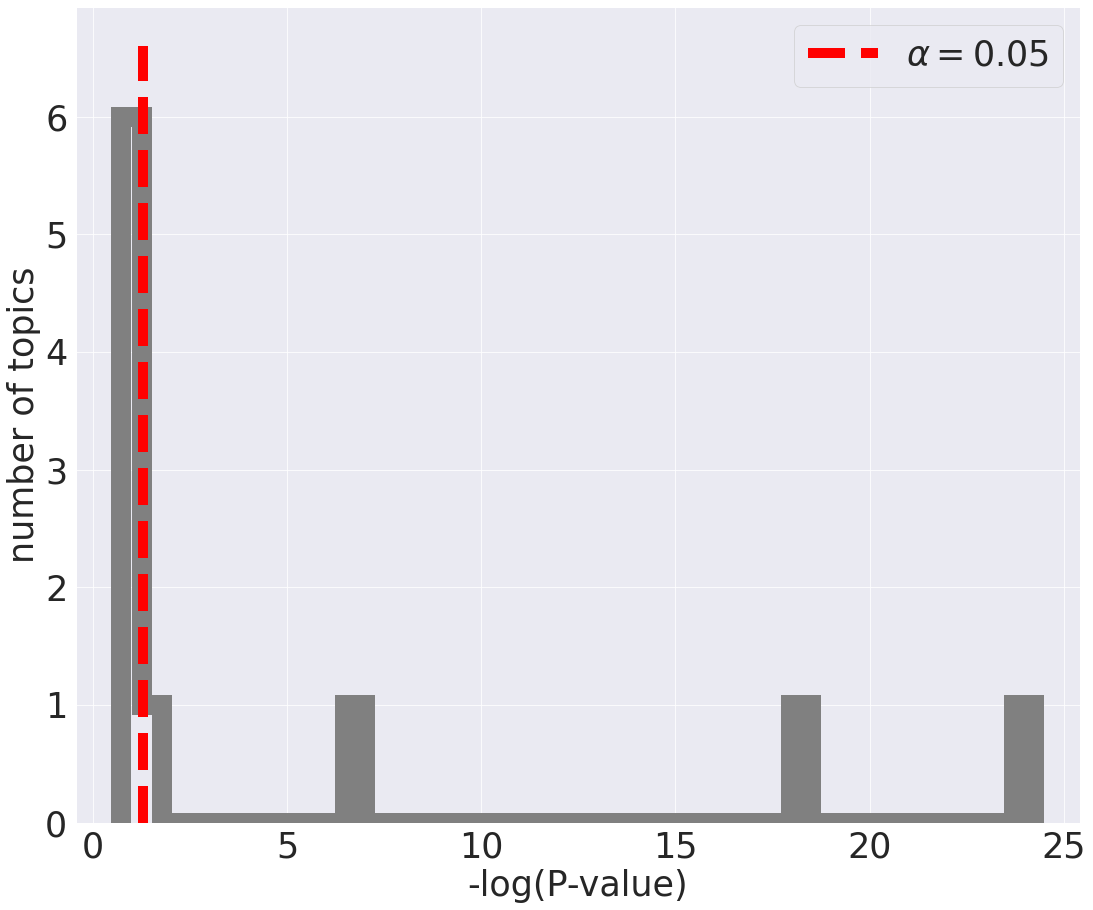

In [46]:
fig = plt.figure(figsize=(18,15))
x = np.arange(1,1+len(topic_pvalues))
c, _, _ = plt.hist(topic_pvalues, histtype='step', lw=20, bins=45, color="gray")
plt.vlines(-np.log10(0.05),0,np.max(c)*1.1, color="red", ls='--', lw=10, label="$\\alpha=0.05$")
plt.xlabel('-log(P-value)', fontsize=35)
plt.ylabel("number of topics", fontsize=35)
#plt.ylim(0,0.055)
#plt.yscale('log')
plt.legend(fontsize=35)
plt.tick_params(which="both",labelsize=35)
fig.savefig("%s/pvaluescrosstopic(%d).pdf"%(directory,l))

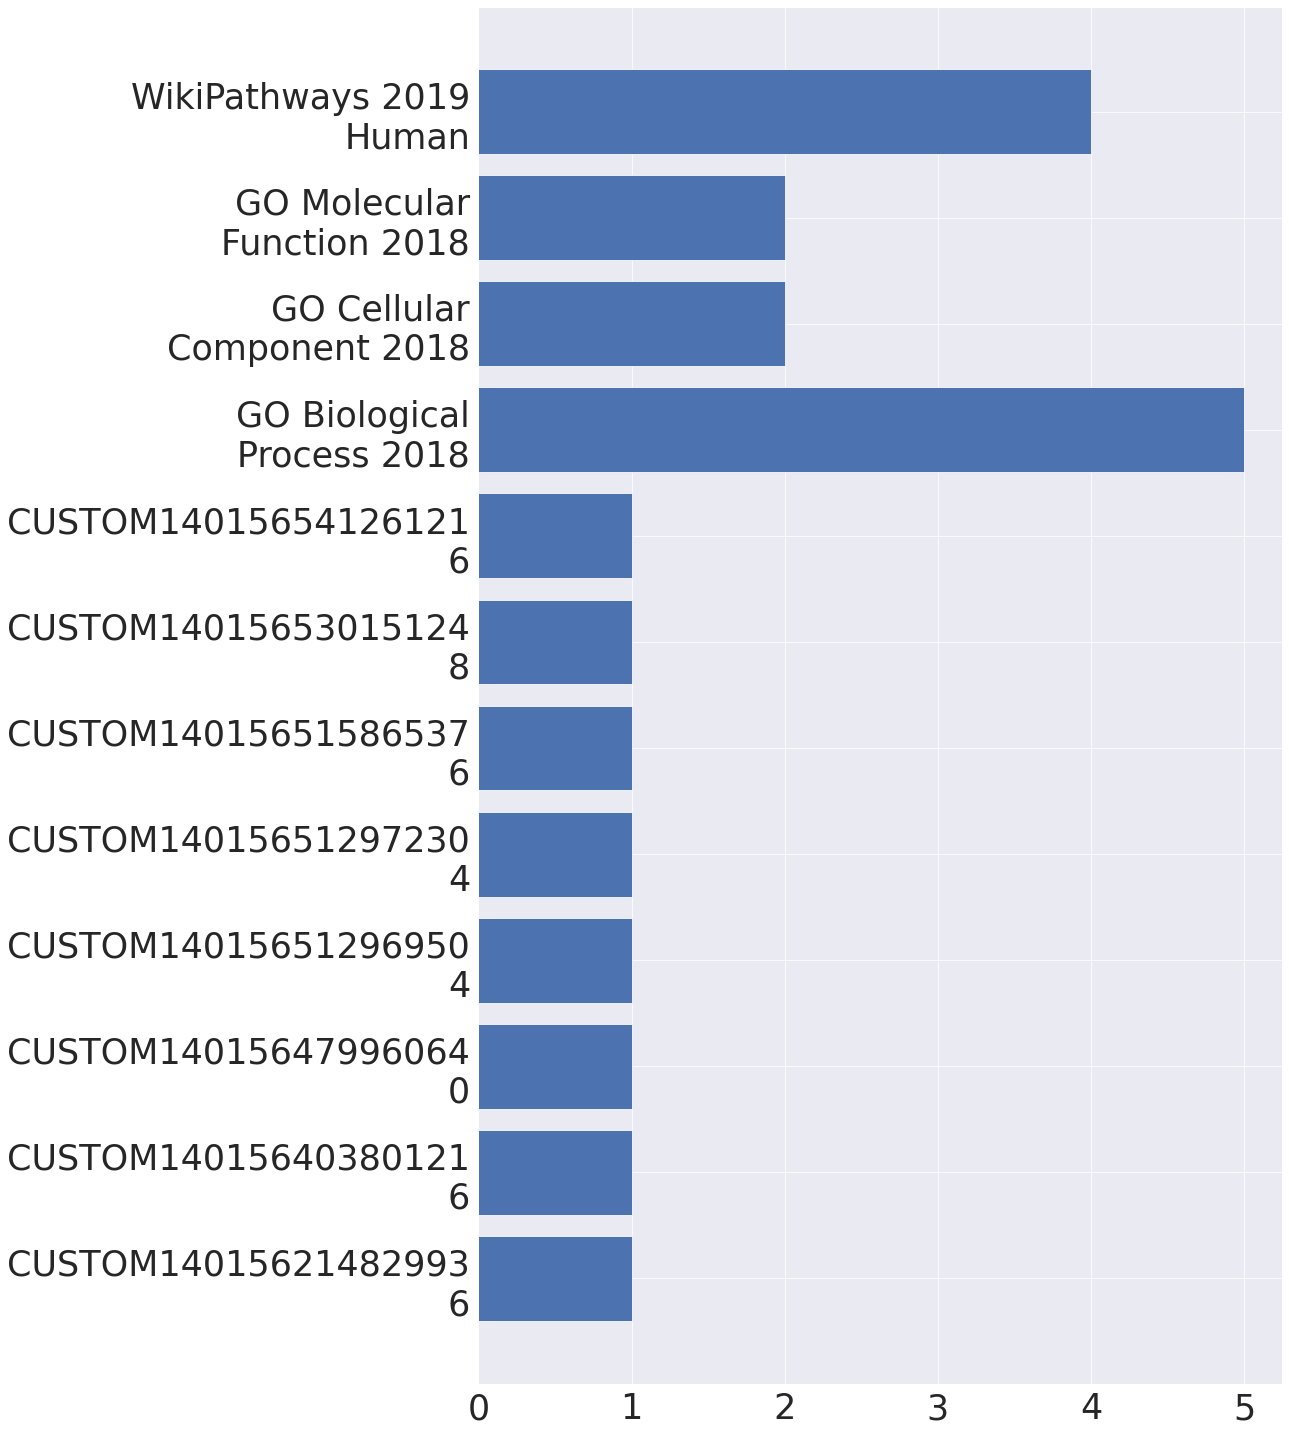

In [47]:
fig = plt.figure(figsize=(18,20))
gos, goscounts = np.unique(topic_gos, return_counts=True)
plt.barh(["\n".join(wrap(str(l).replace('_',' '),20)) for l in gos], goscounts)
plt.yticks(fontsize=15)
plt.tick_params(which="both",labelsize=35)
plt.tight_layout()
plt.show()
fig.savefig("%s/pvaluecategories(%d).pdf"%(directory,l))

# hypergeometric operlaps

In [80]:
from scipy.stats import hypergeom
from sklearn.metrics import v_measure_score
import seaborn as sns
sns.set_context('paper')

In [113]:
hsbm_list_topics = pd.read_csv("topsbm/topsbm_level_3_topics.csv")
gene_list = hsbm_list_topics.values.ravel().astype(str)
gene_list = list(map(lambda g: g[:15],filter(lambda g: g!="nan", gene_list)))
hsbm_list=pd.Series(index=[g[:15] for g in gene_list], dtype=str)
for topic in hsbm_list_topics.columns:
    hsbm_list[[g[:15] for g in hsbm_list_topics[topic].dropna()]]=topic

In [112]:
hsbm_list_topics = pd.read_csv("topsbm-log/topsbm-log_level_3_topics.csv")
gene_list = hsbm_list_topics.values.ravel().astype(str)
gene_list = list(map(lambda g: g[:15],filter(lambda g: g!="nan", gene_list)))
hsbm_log_list=pd.Series(index=[g[:15] for g in gene_list], dtype=str)
for topic in hsbm_list_topics.columns:
    hsbm_log_list[[g[:15] for g in hsbm_list_topics[topic].dropna()]]=topic

FileNotFoundError: [Errno 2] File topsbm-log/topsbm-log_level_3_topics.csv does not exist: 'topsbm-log/topsbm-log_level_3_topics.csv'

In [ ]:
wgcna_list = pd.read_csv("wgcna/wgcna_level_0_word-dist.csv", index_col=0).apply(pd.Series.idxmax,axis=1)
wgcna_list.index = [g[:15] for g in wgcna_list.index]

In [82]:
tm_list = pd.read_csv("tm/tm_level_0_word-dist.csv", index_col=0).apply(pd.Series.idxmax,axis=1)

In [114]:
lda_list_topics = pd.read_csv("lda/lda_level_1_topics.csv")
gene_list = lda_list_topics.values.ravel().astype(str)
gene_list = list(map(lambda g: g[:15],filter(lambda g: g!="nan", gene_list)))
lda_list=pd.Series(index=[g[:15] for g in gene_list], dtype=str)
for topic in lda_list_topics.columns:
    lda_list[lda_list.index.isin([g[:15] for g in lda_list_topics[topic].dropna()])]=topic
lda_list=lda_list.reset_index().drop_duplicates("index").set_index("index")
lda_list=pd.Series(index=lda_list.index, data=lda_list.values.ravel())

In [115]:
list_1 = hsbm_list
list_2 = lda_list

first_name = "hsbm"
last_name = "lda"

#to uniform
list_1 = list_1[list_1.index.isin(list_2.index)]
list_2 = list_2[list_2.index.isin(list_1.index)]

In [116]:
hyper_params = parameters_for_hypergeometric(list_1, list_2)
df_cmap = build_map(*hyper_params)

(5, 14)


In [117]:
df_cmap[df_cmap<2]=0
df_cmap = df_cmap.sort_values(by=[t for t in df_cmap.columns], ascending=False)

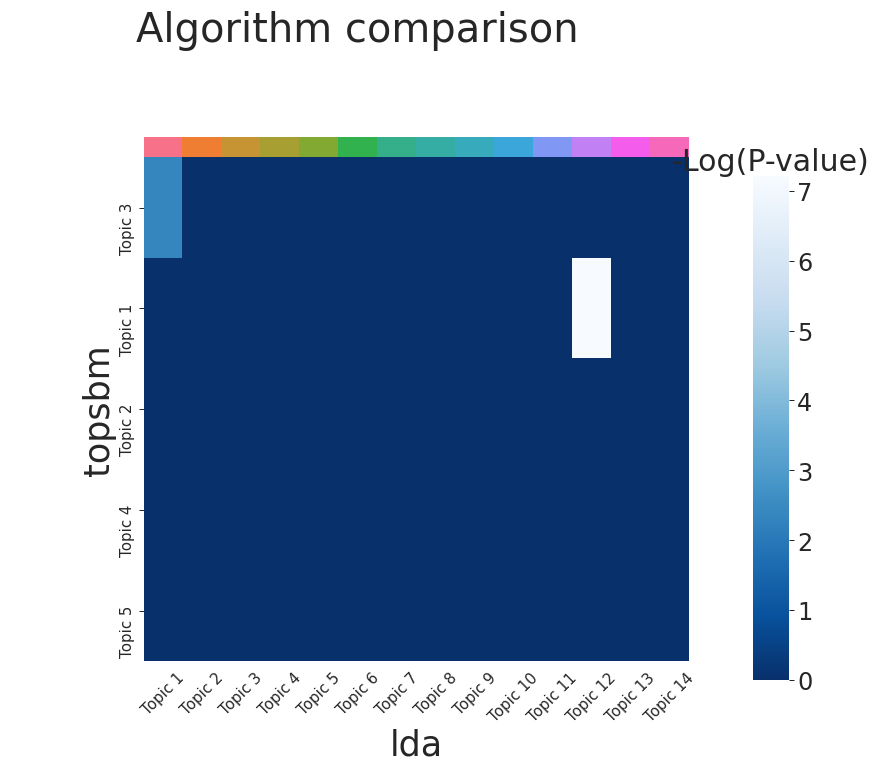

In [118]:
plot_map(df_cmap)

In [119]:
print("hsbm - lda %.3f"%v_measure_score(list_1, list_2))

hsbm - lda 0.048


In [ ]:
list(map(print,list_1[list_1=="Topic 39"].index))

In [ ]:
print("hsbm - wgcna %.3f"%v_measure_score(hsbm_list, wgcna_list))
print("hsbm - tm %.3f"%v_measure_score(hsbm_list.reindex_like(tm_list), tm_list))
print("tm - wgcna %.3f"%v_measure_score(tm_list, wgcna_list.reindex_like(tm_list)))
print("hsbm - lda %.3f"%v_measure_score(hsbm_list, lda_list.reindex_like(hsbm_list)))

In [122]:
for g in hsbm_list[hsbm_list=="Topic 1"].index:
    print(g)

ENSG00000160213
ENSG00000130203
ENSG00000131095
ENSG00000173432
ENSG00000121552
ENSG00000160180
ENSG00000161634
ENSG00000099194
ENSG00000239839
ENSG00000135916
ENSG00000167676
ENSG00000136717
ENSG00000197971
ENSG00000172005
ENSG00000154146
ENSG00000137077
ENSG00000124102
ENSG00000096696
ENSG00000129170
ENSG00000188404
ENSG00000086967
ENSG00000125780
ENSG00000171476
ENSG00000081277
ENSG00000163359
ENSG00000125144
ENSG00000176788
ENSG00000132639
ENSG00000166819
ENSG00000135218
ENSG00000137309
ENSG00000143753
ENSG00000136689
ENSG00000183091
ENSG00000175130
ENSG00000175445
ENSG00000118785
ENSG00000120053
ENSG00000167588
ENSG00000087250
ENSG00000159173
ENSG00000112303
ENSG00000064205
ENSG00000163563
ENSG00000154330
ENSG00000162747
ENSG00000133710
ENSG00000105374
ENSG00000139433
ENSG00000148346
ENSG00000186832
ENSG00000138207
ENSG00000215861
ENSG00000187116
ENSG00000115590
ENSG00000171346
ENSG00000163464
ENSG00000175315
ENSG00000183036
ENSG00000166831
ENSG00000196754
ENSG00000077157
ENSG0000